In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import equinox as eqx
import pandas as pd
import numpy as np
import jax.random as jr
from models import RNN, AutoregressiveCDE, SingleSolveCDE, CDEODE

from utils.train_utils import inverse_log_transform, standardize, destandardize
from utils.integrated_gradients import integrated_gradients_all_outputs
from utils.plots import plot_predictions

In [2]:
fname = 'data/clipped_data.csv'
df = pd.read_csv(fname)
raw_ys = jnp.array(df['new_cases'].values) 
averaged_ys = jnp.array(df['new_cases_7d_average'].values) 


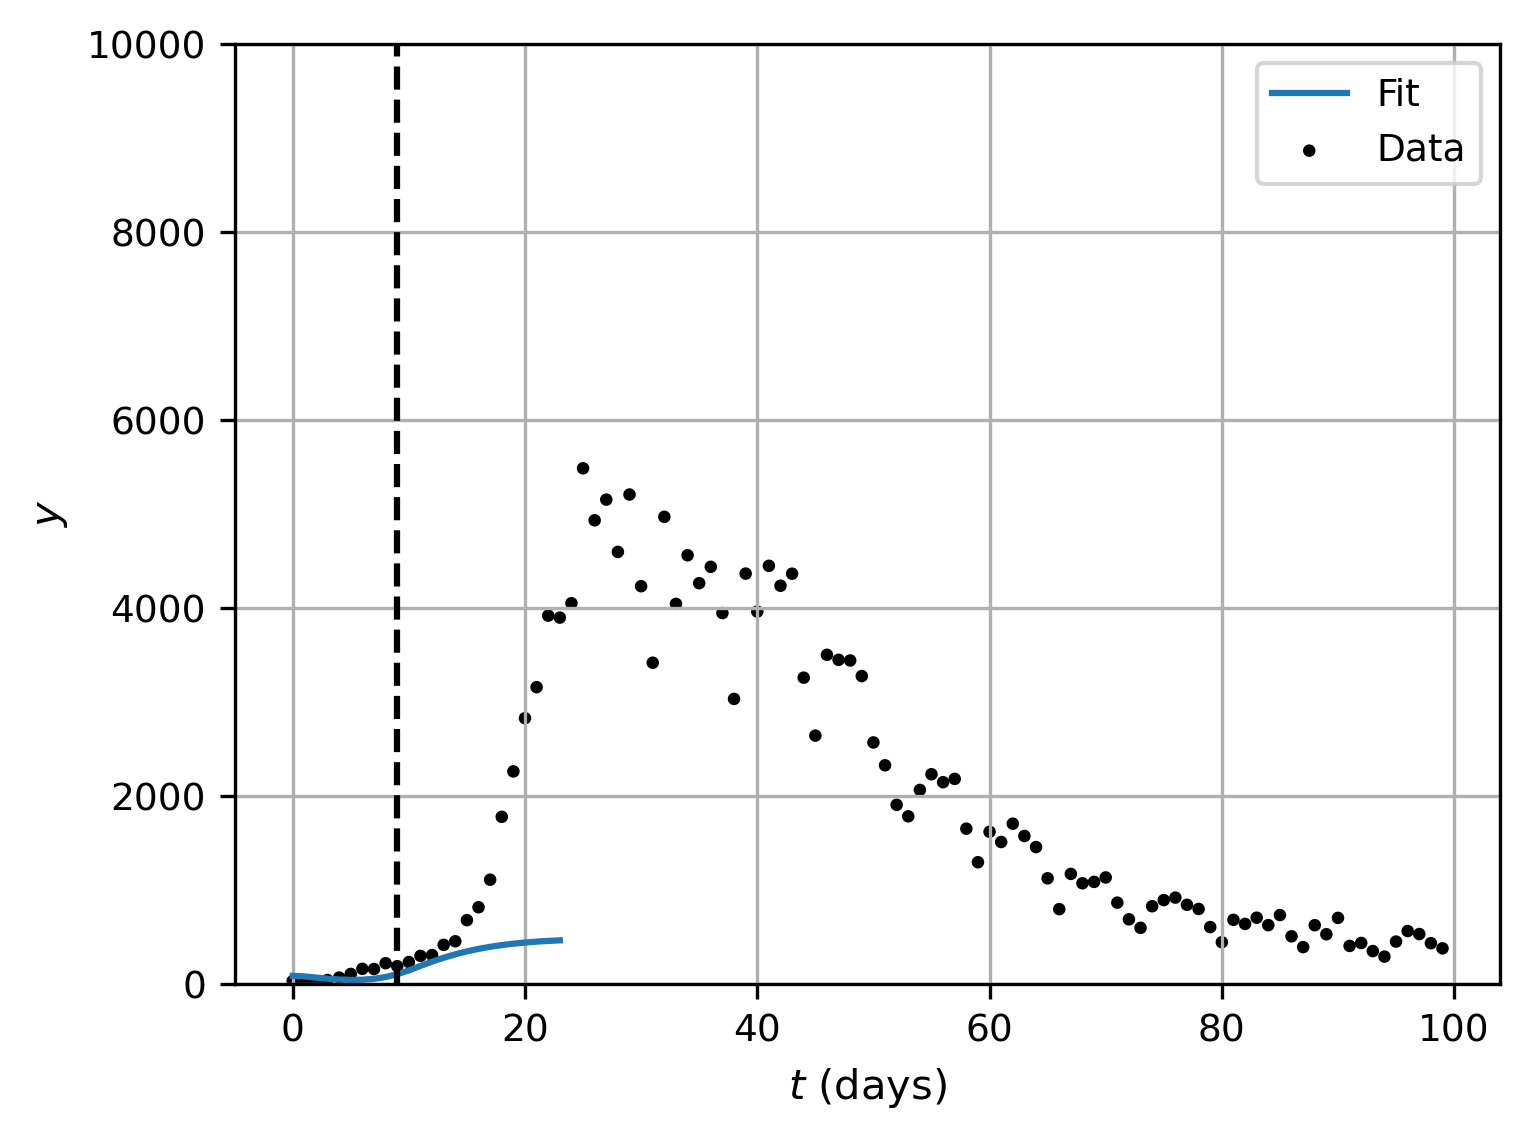

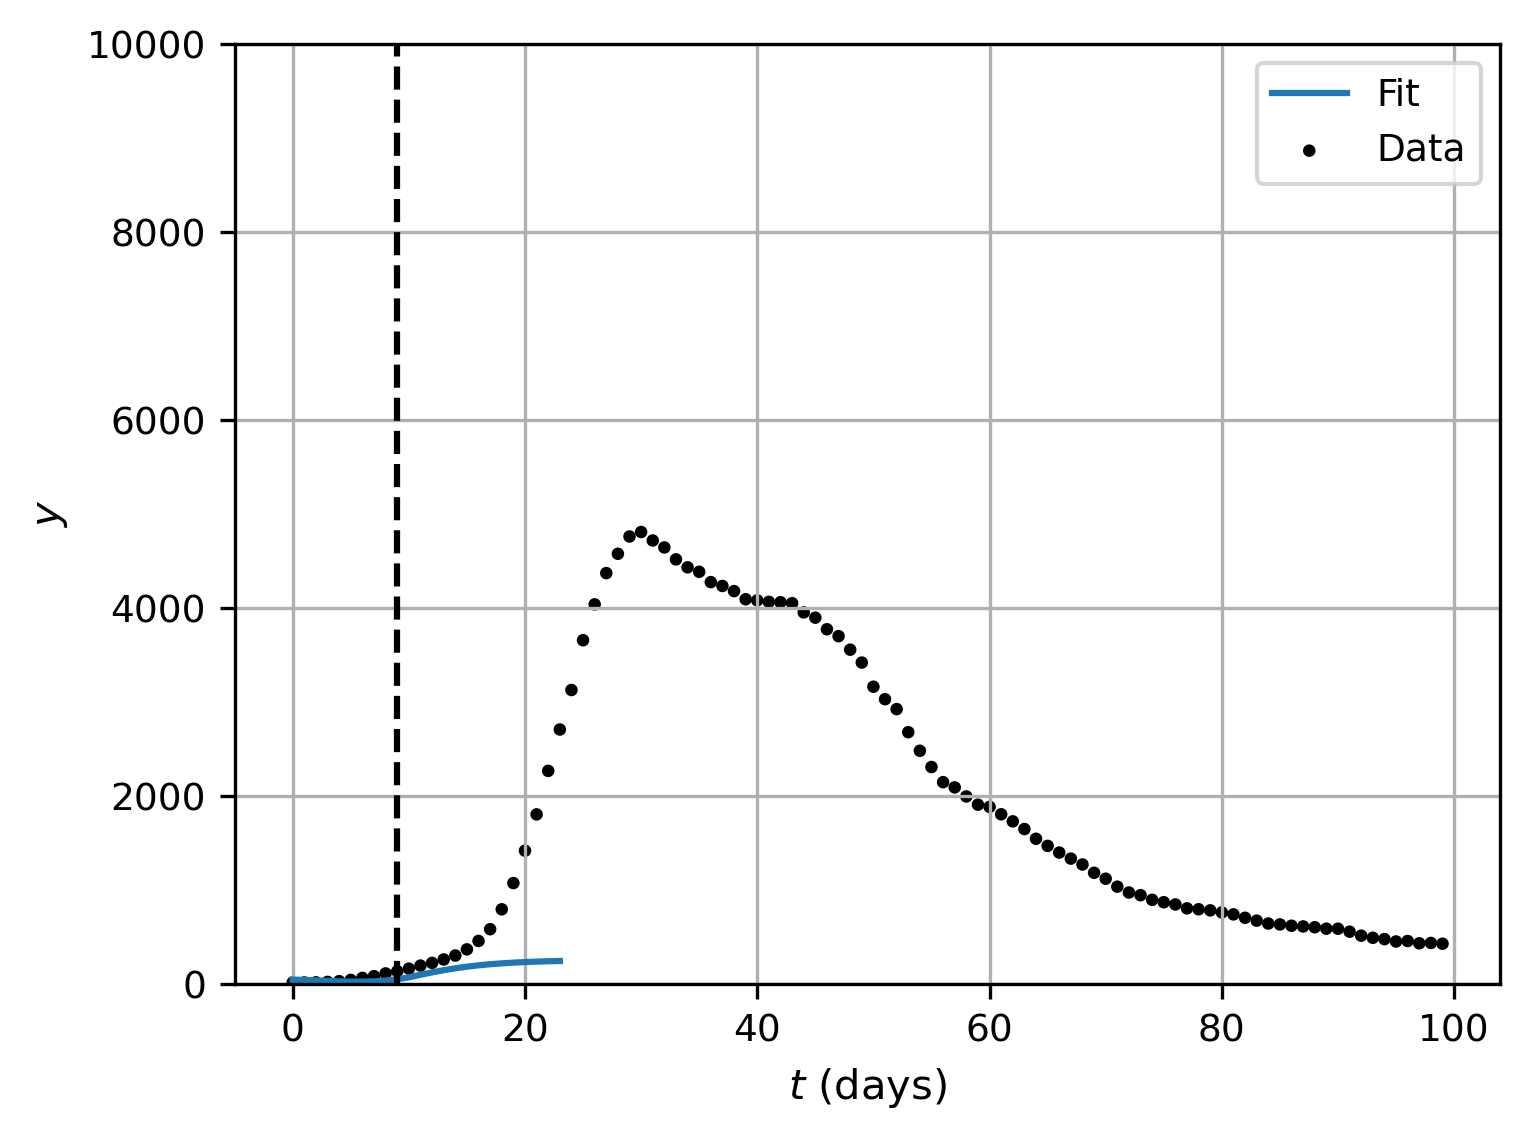

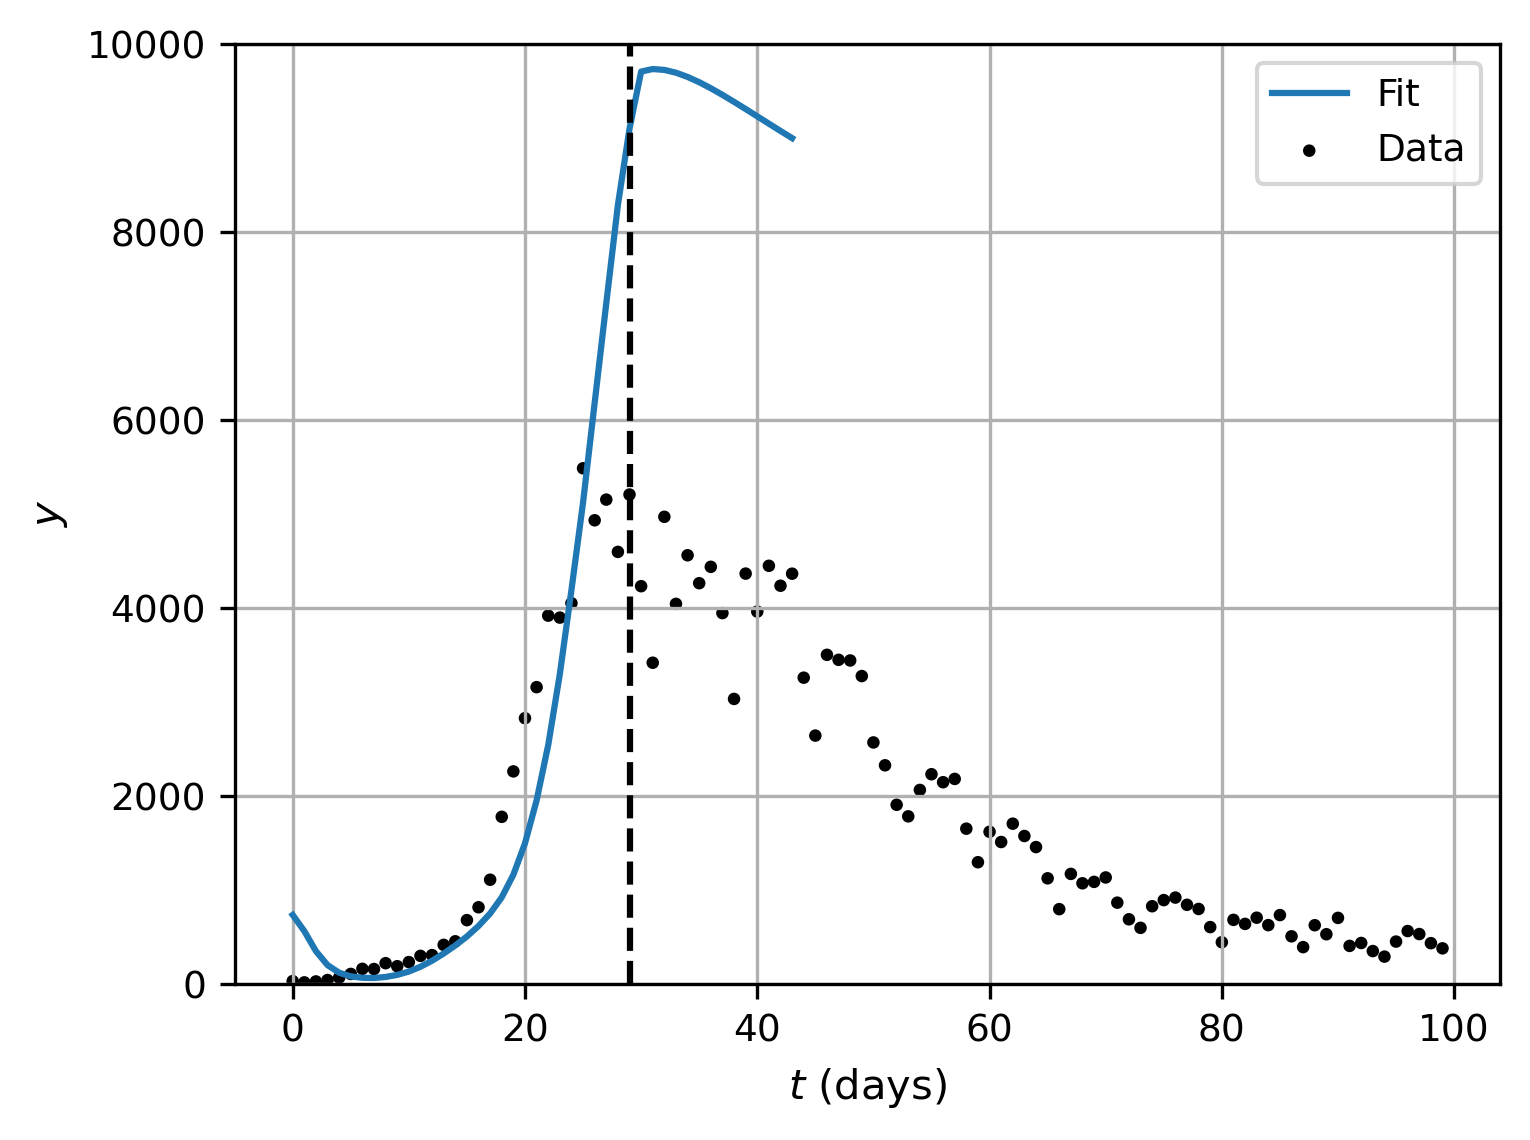

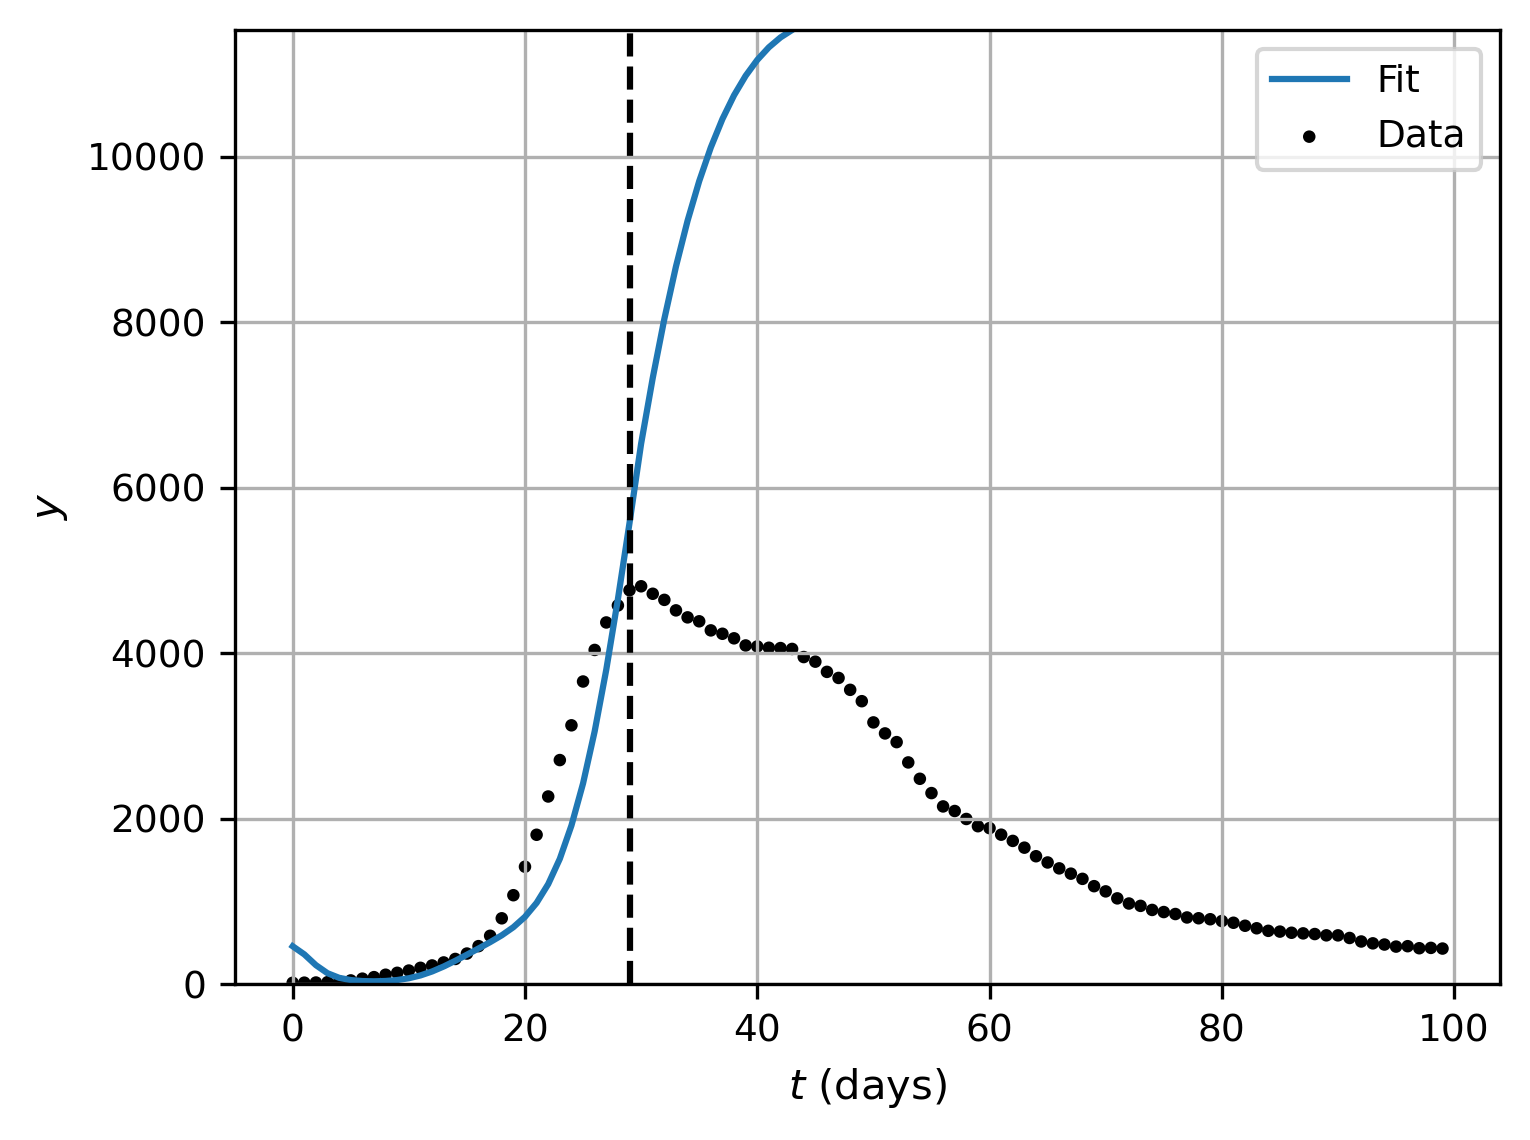

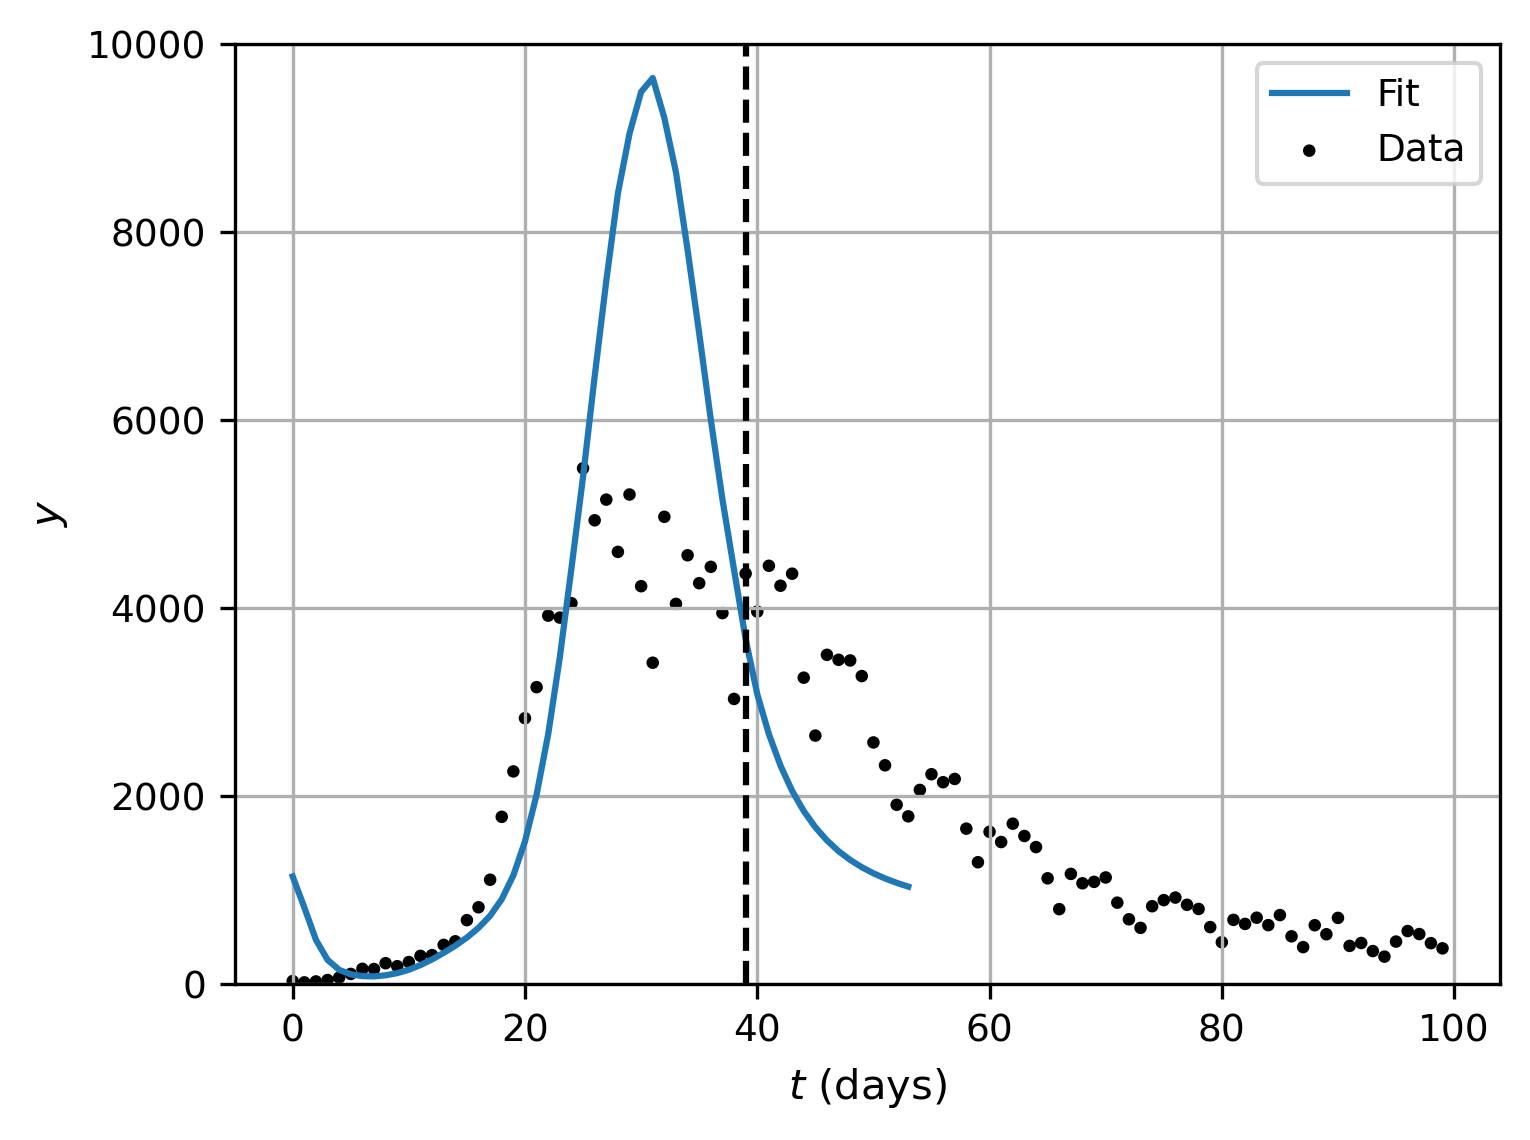

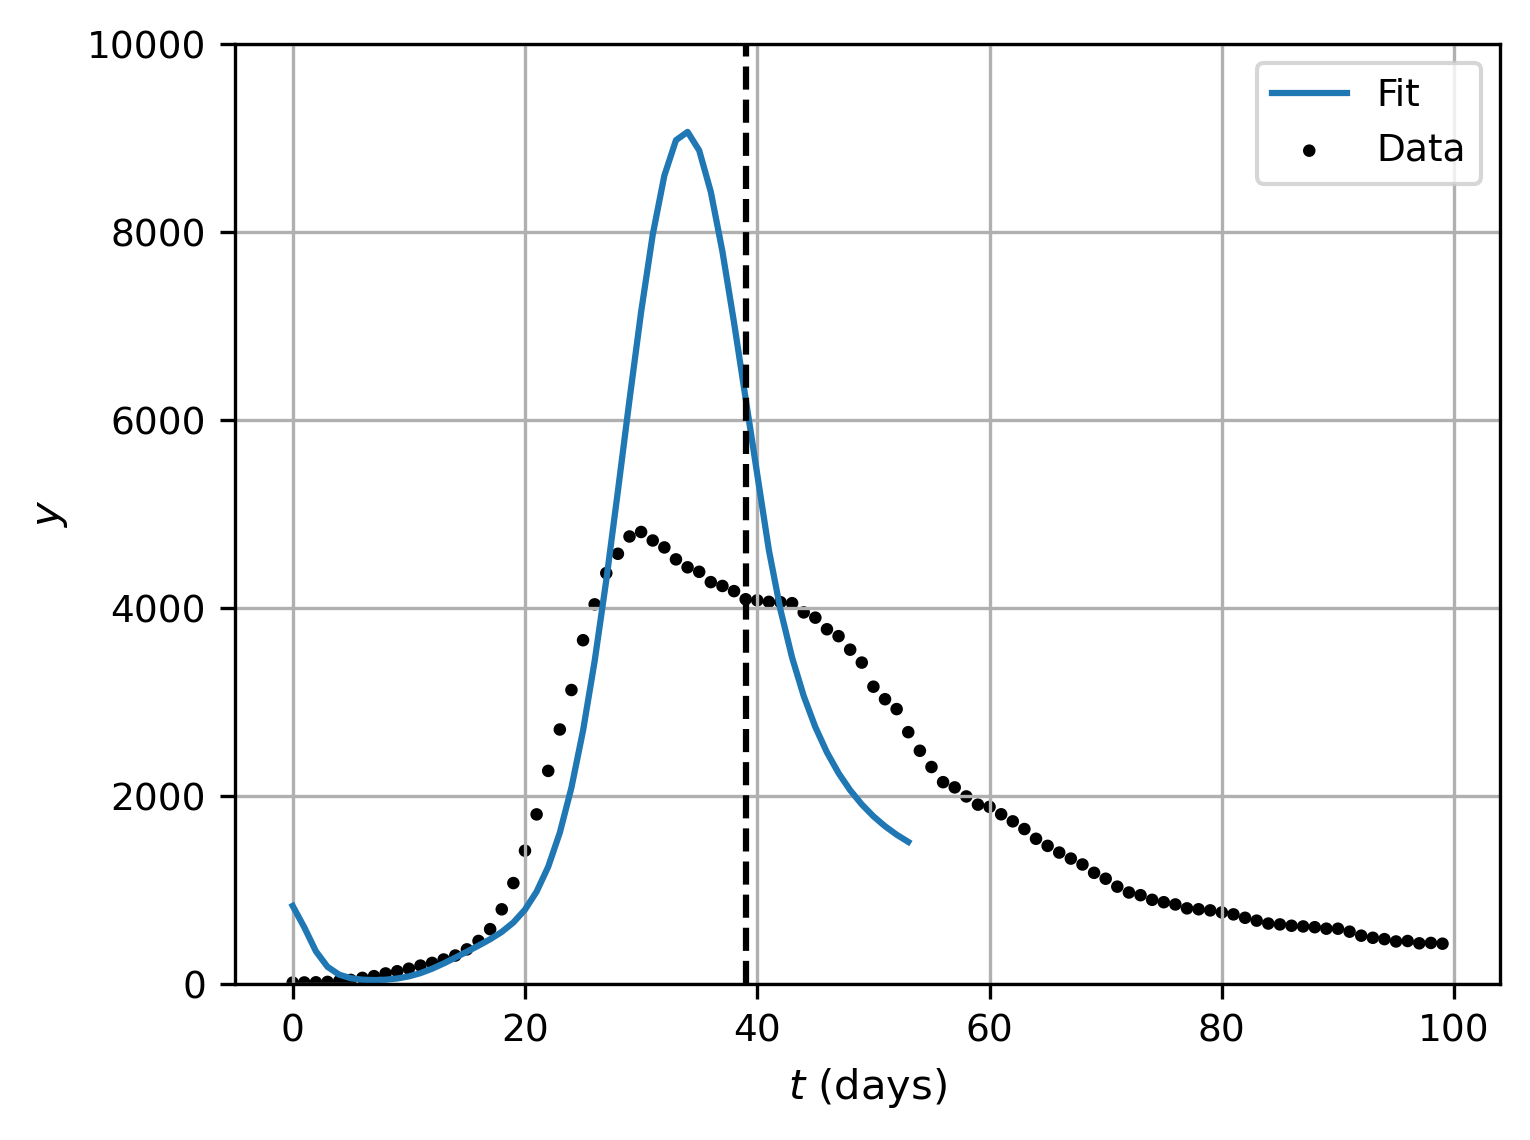

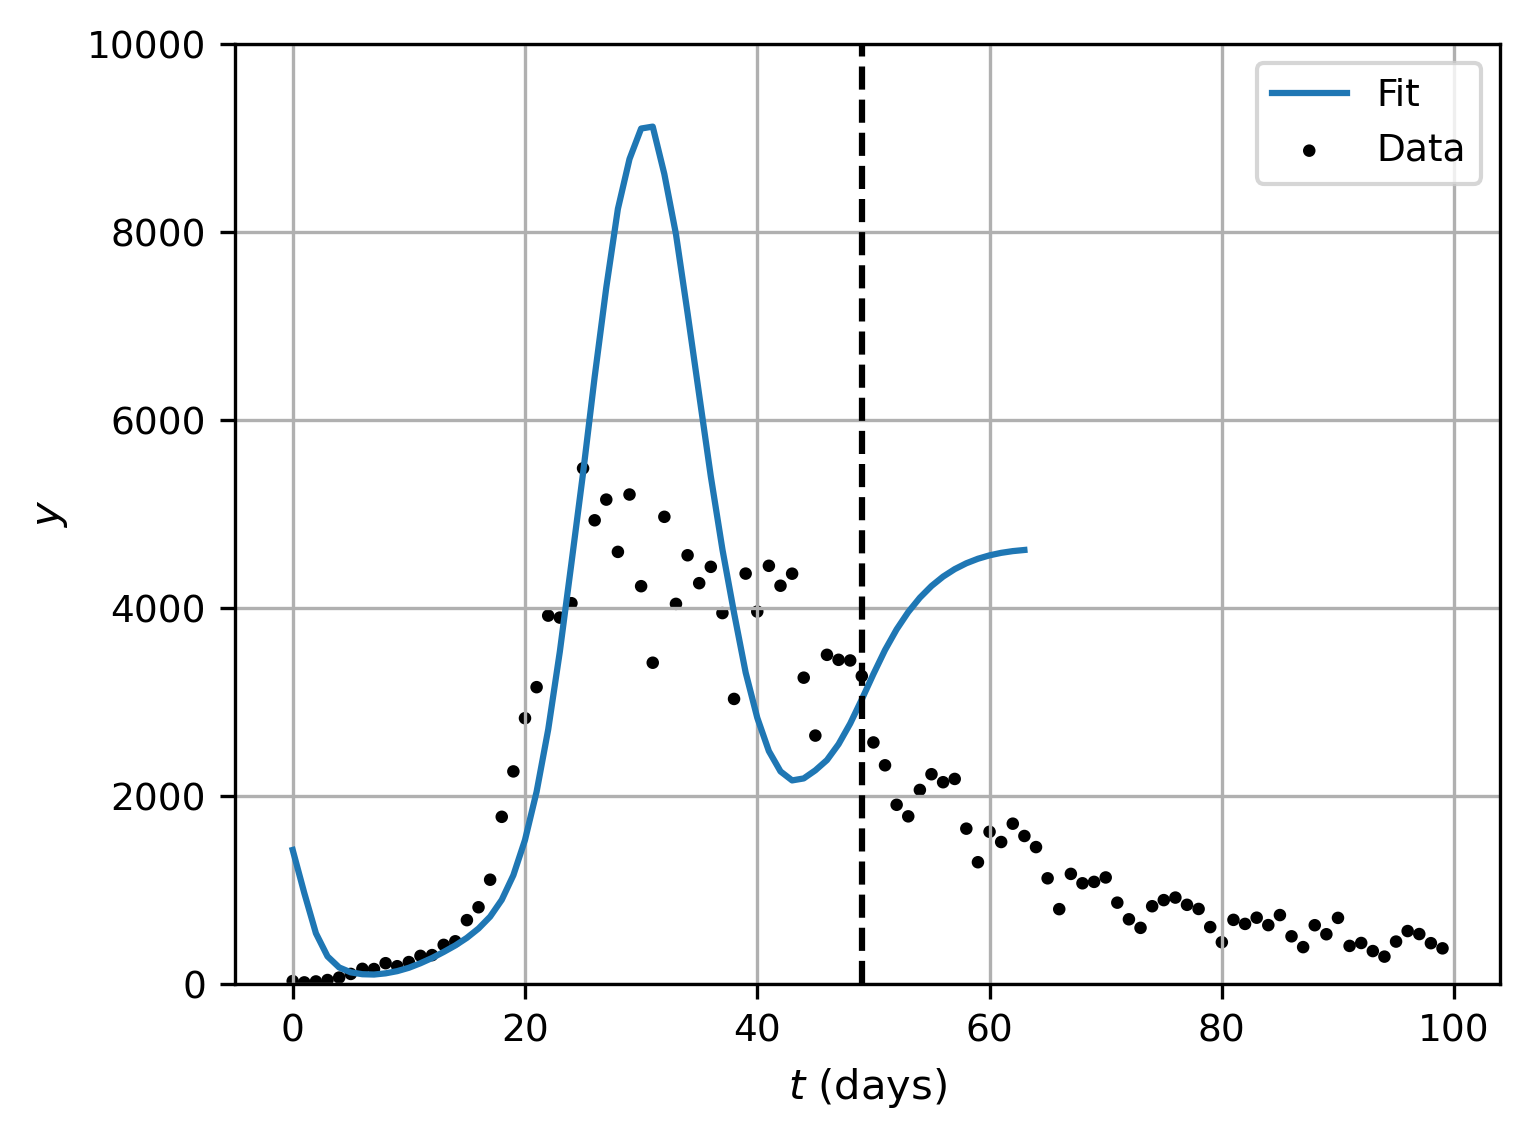

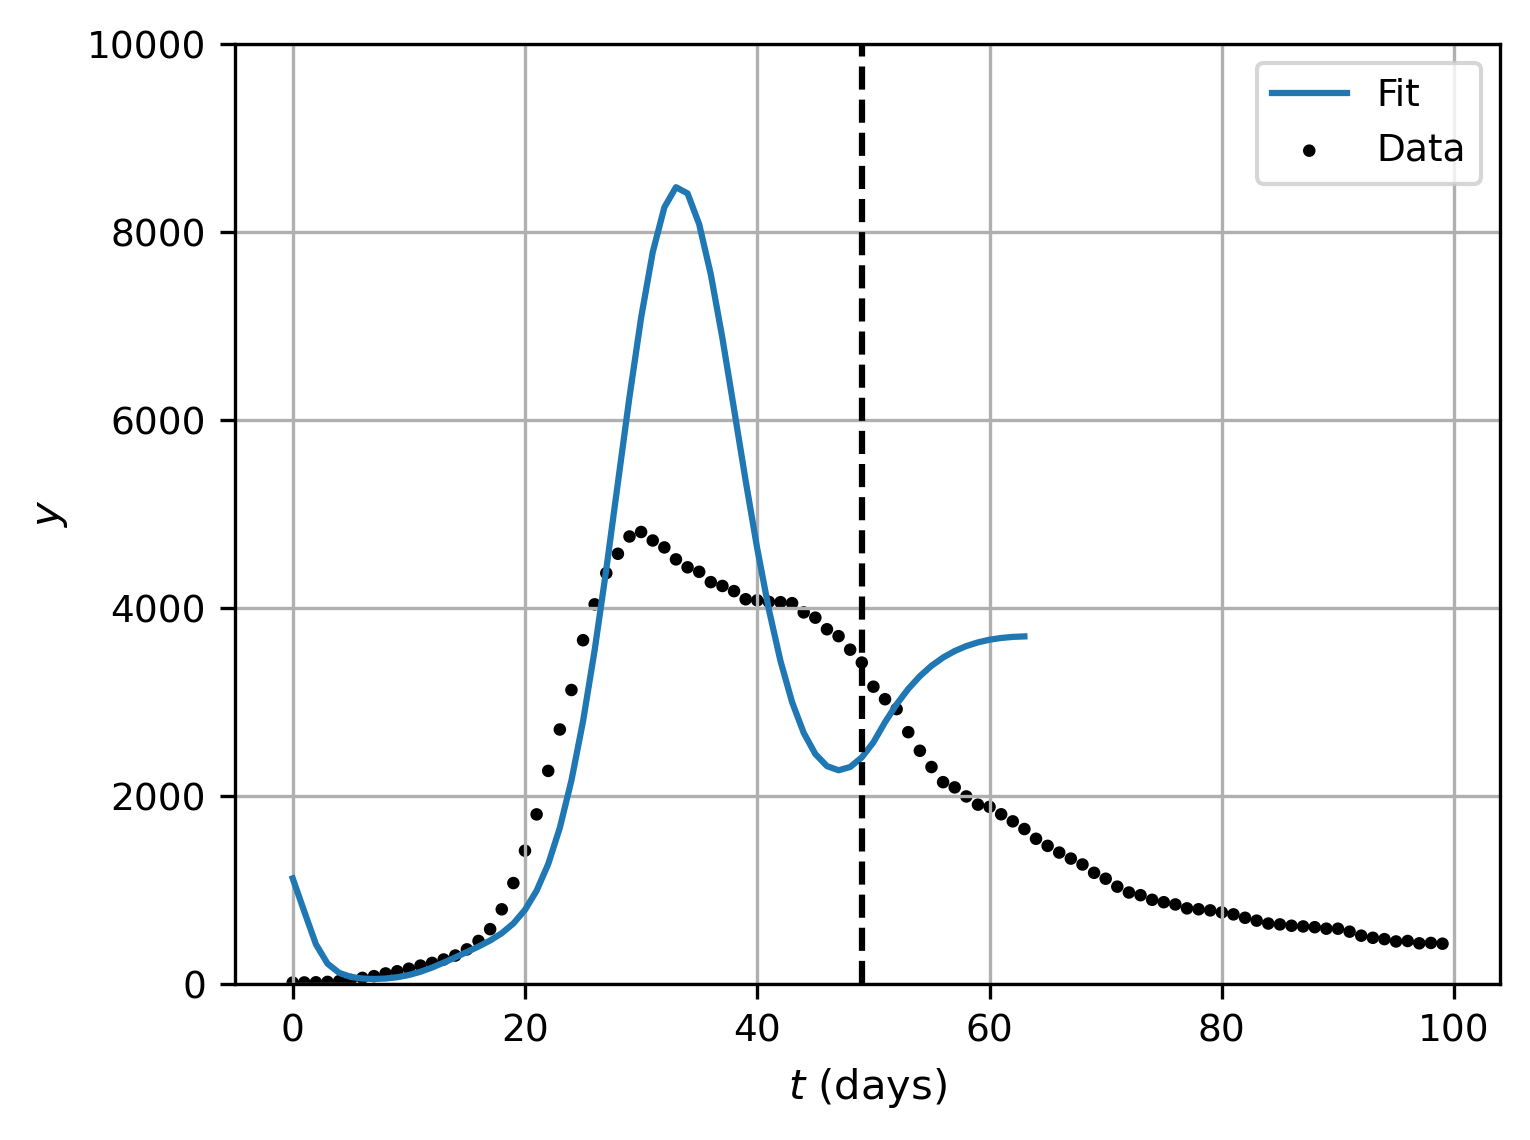

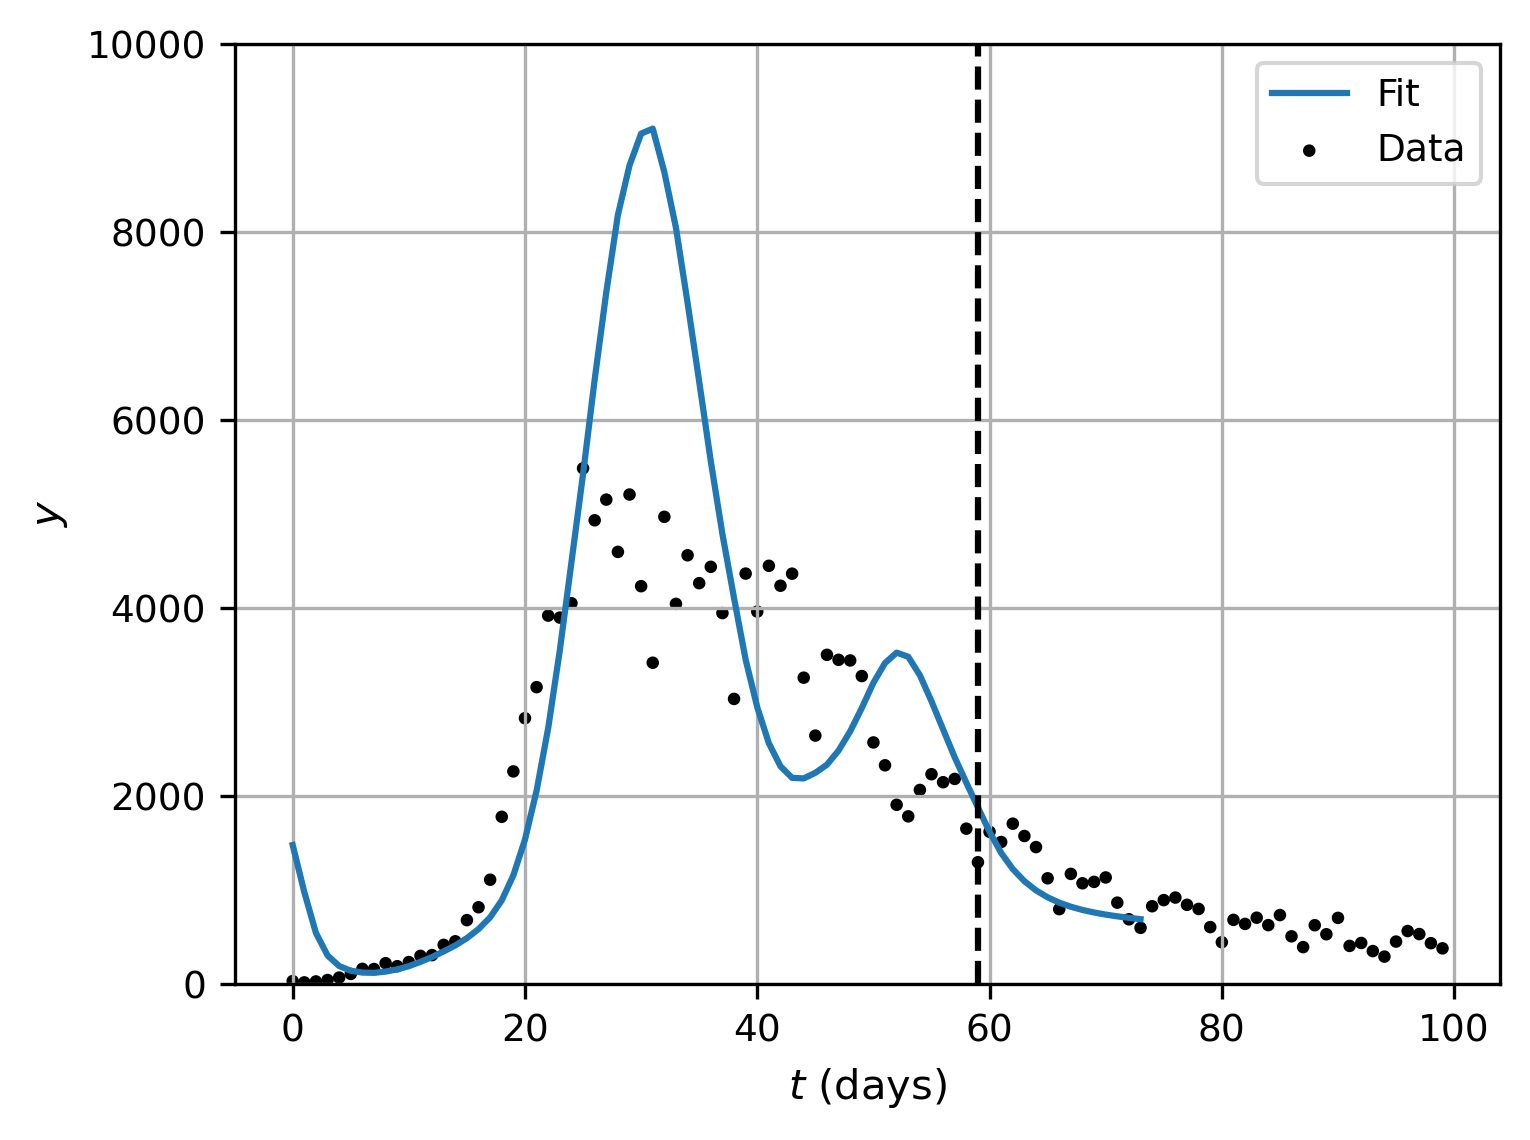

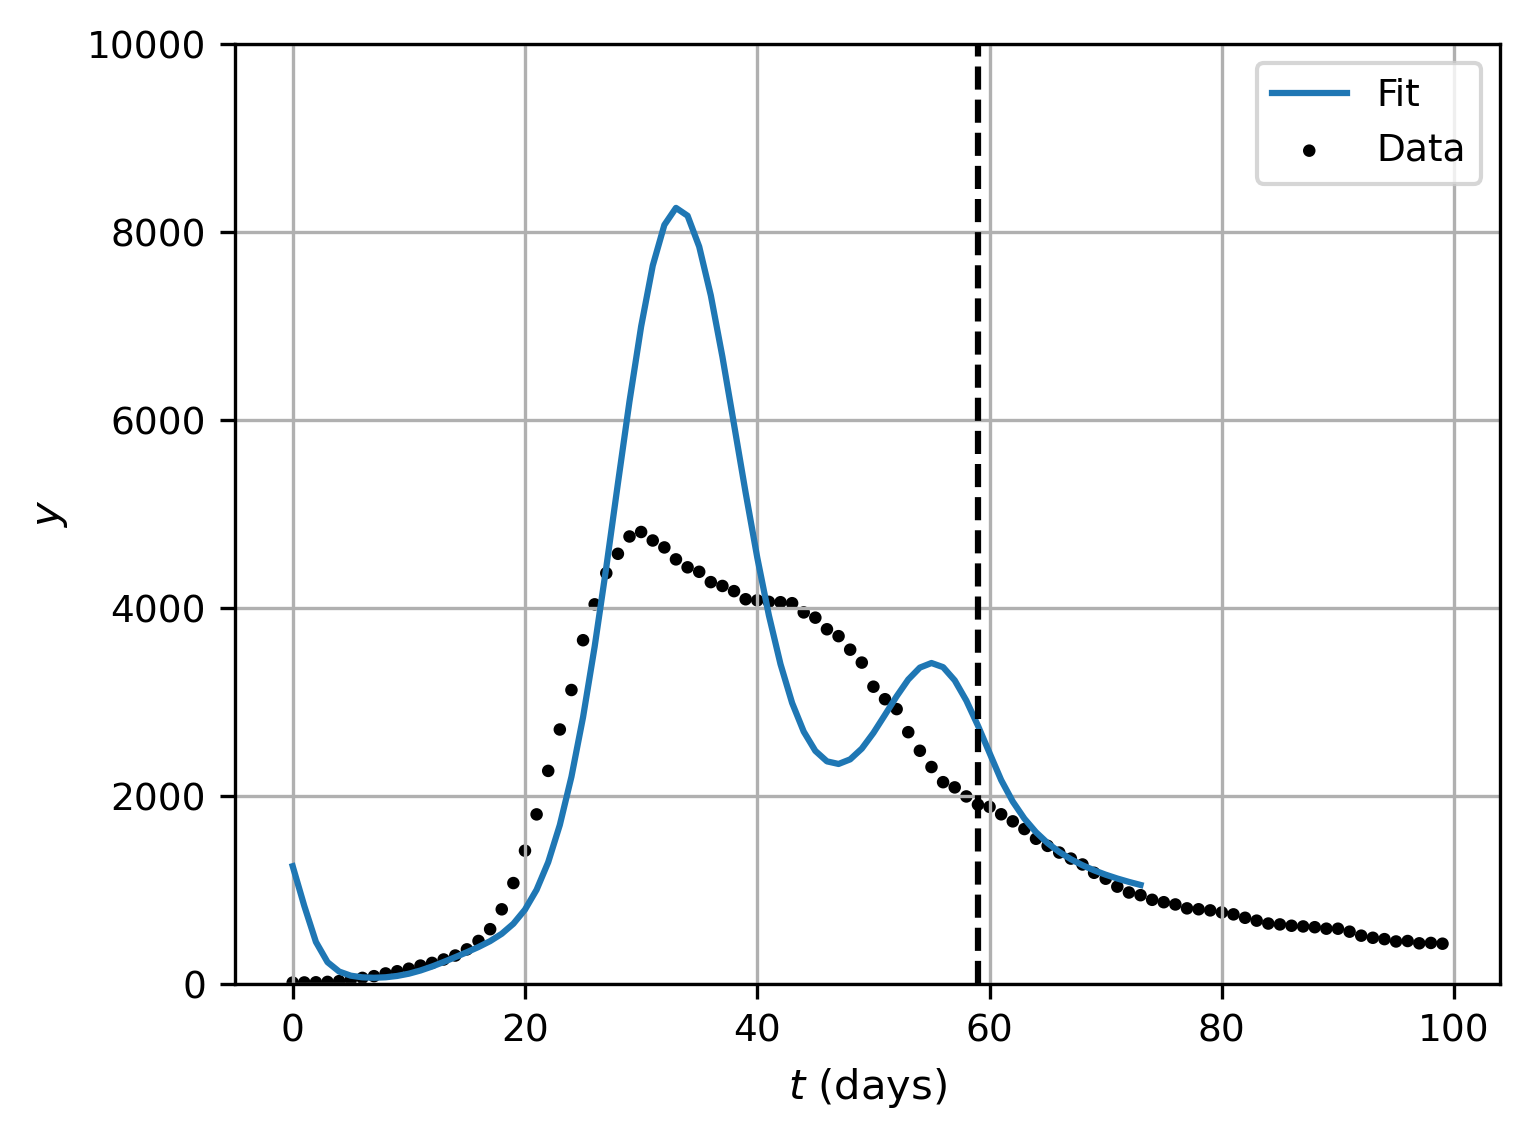

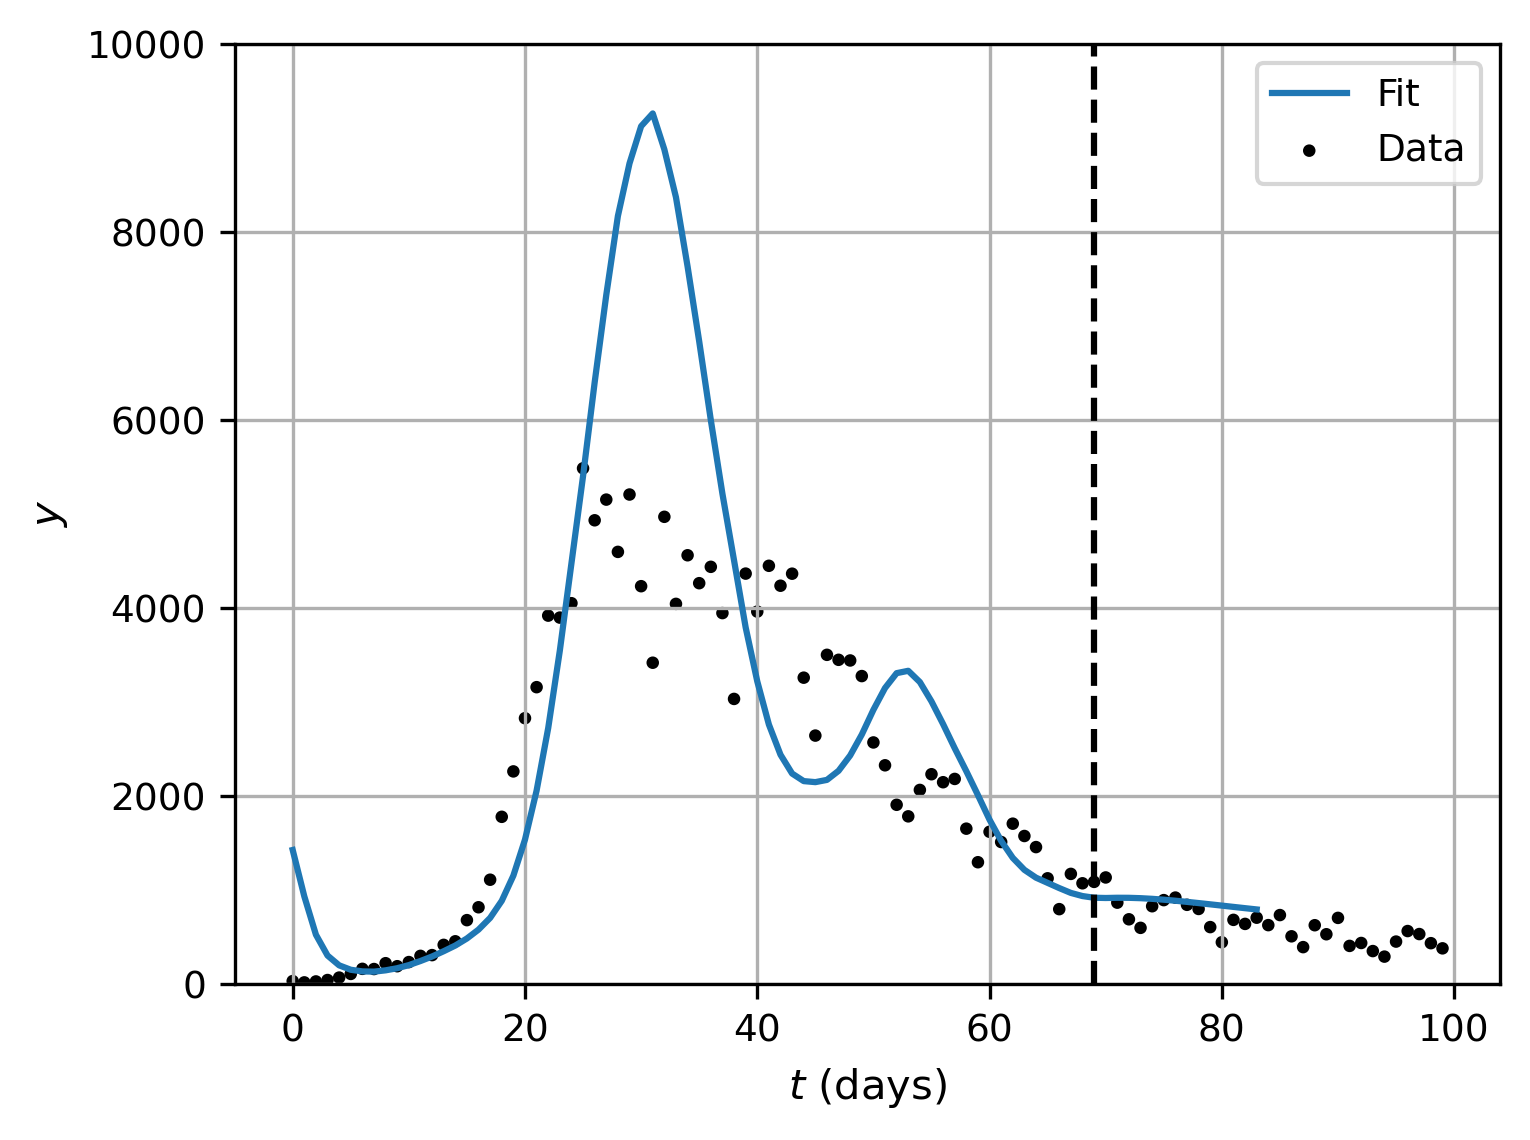

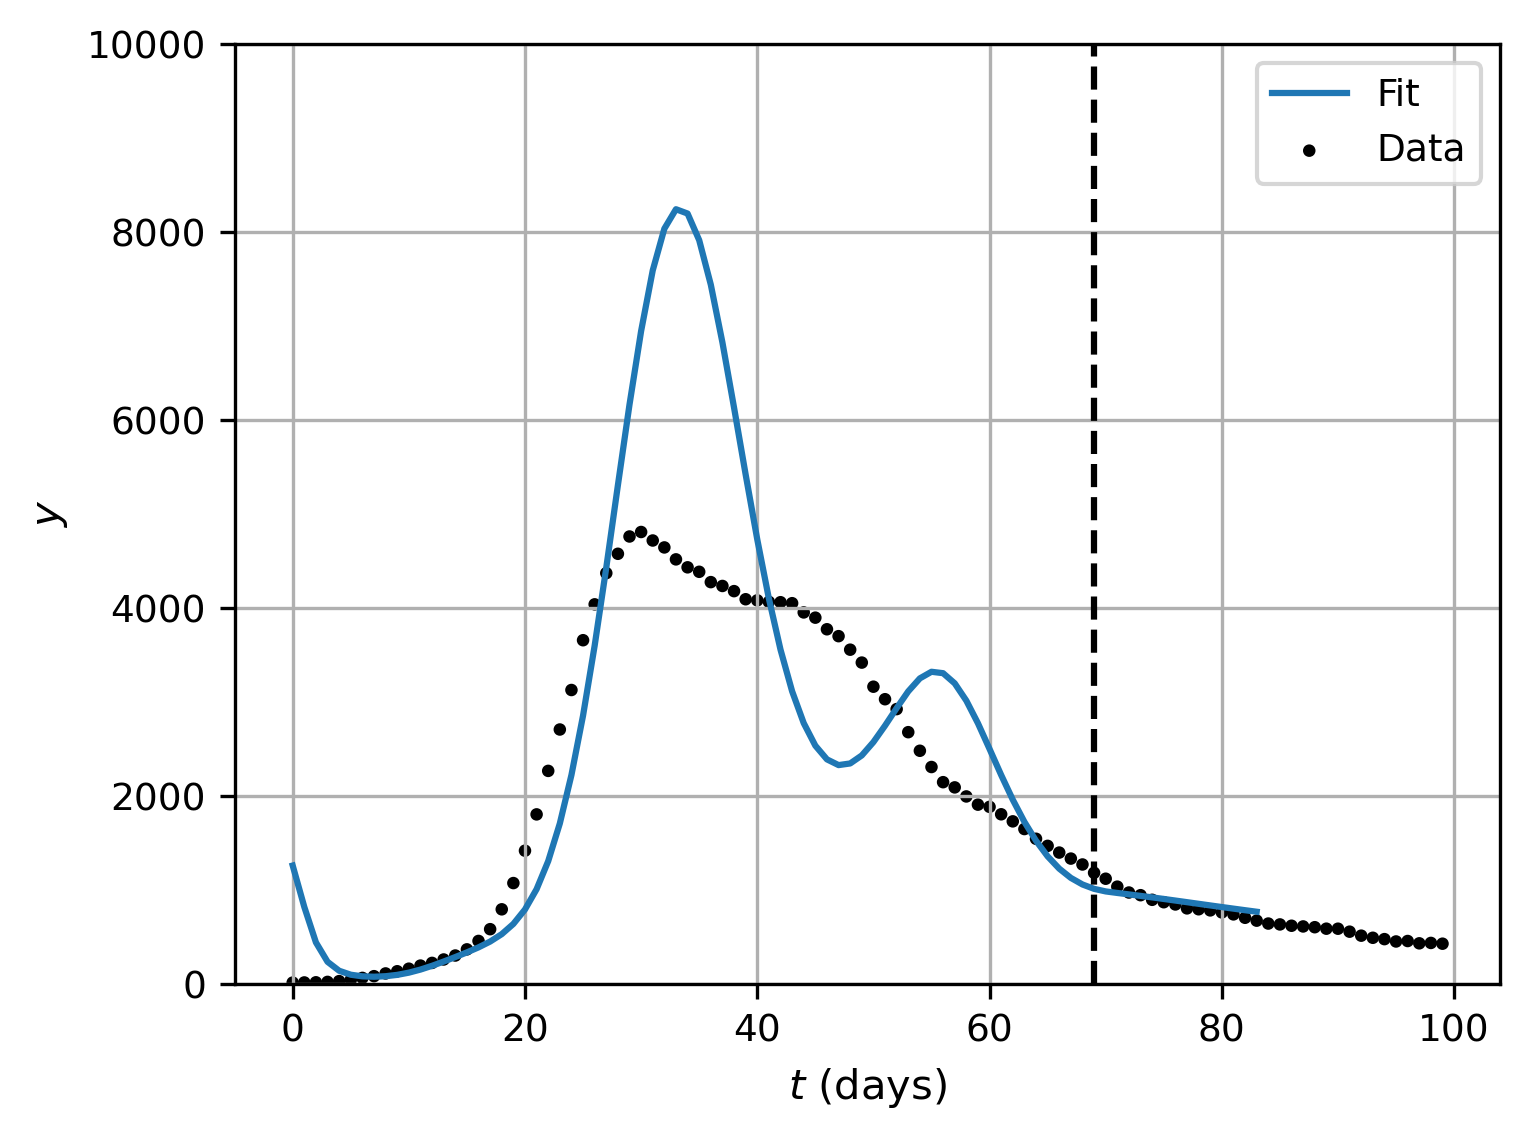

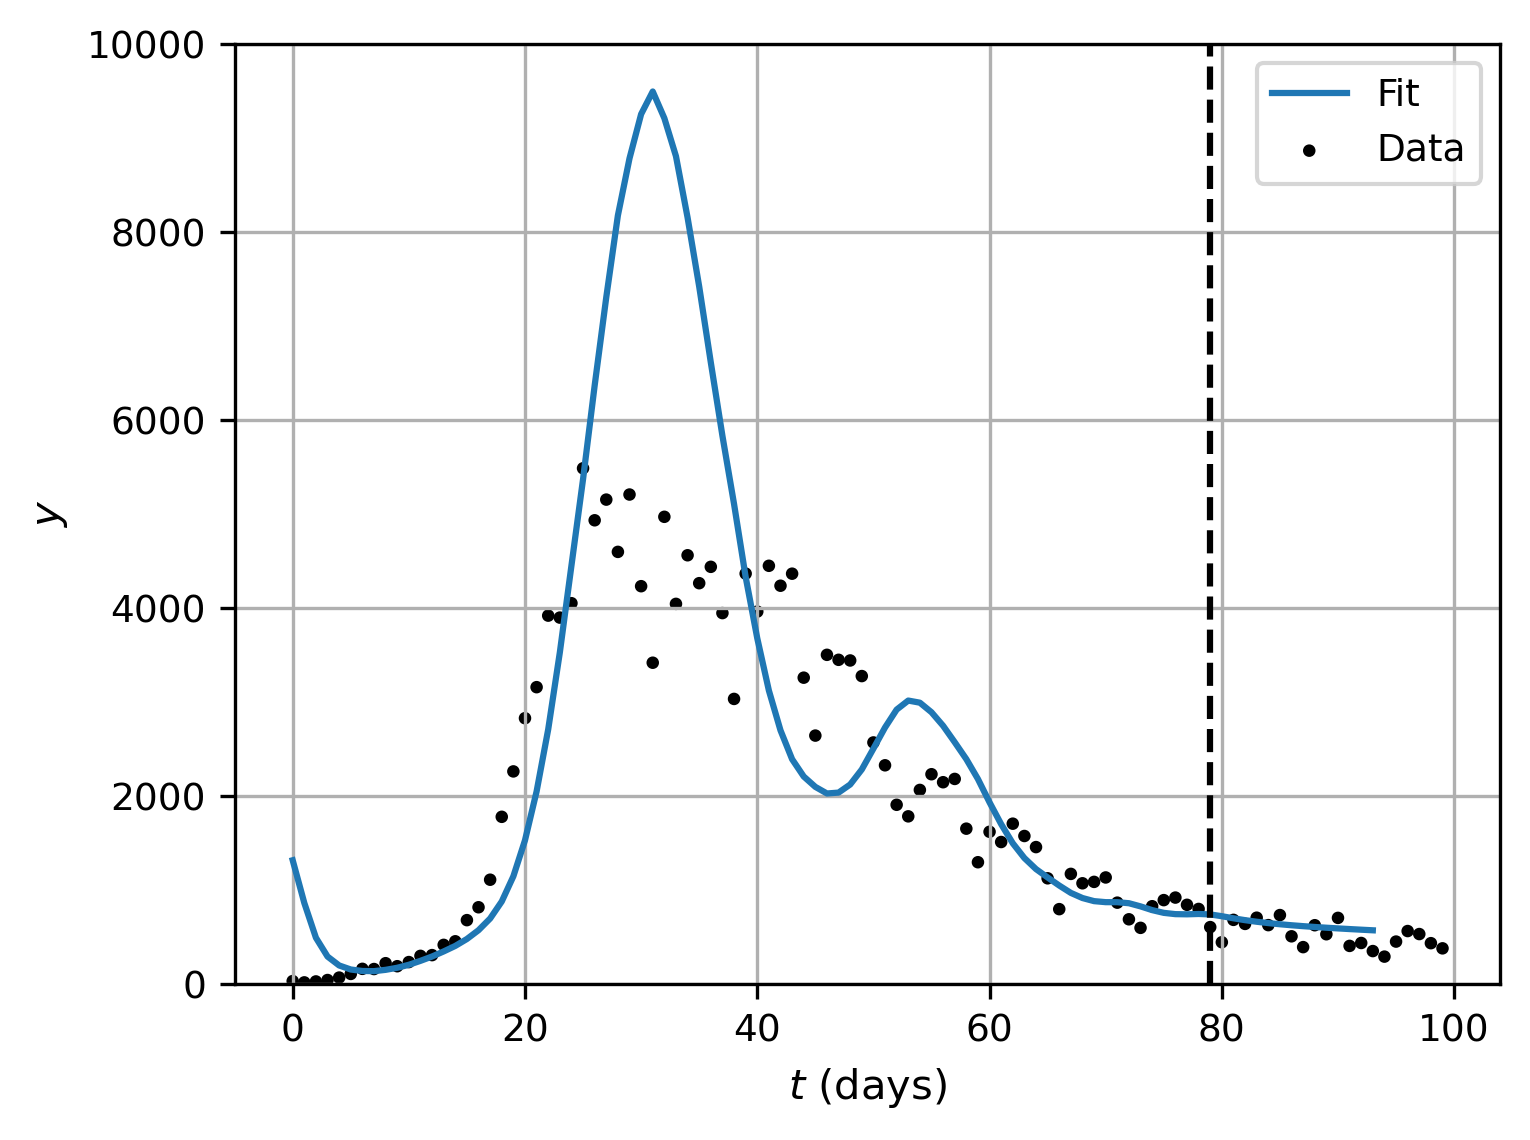

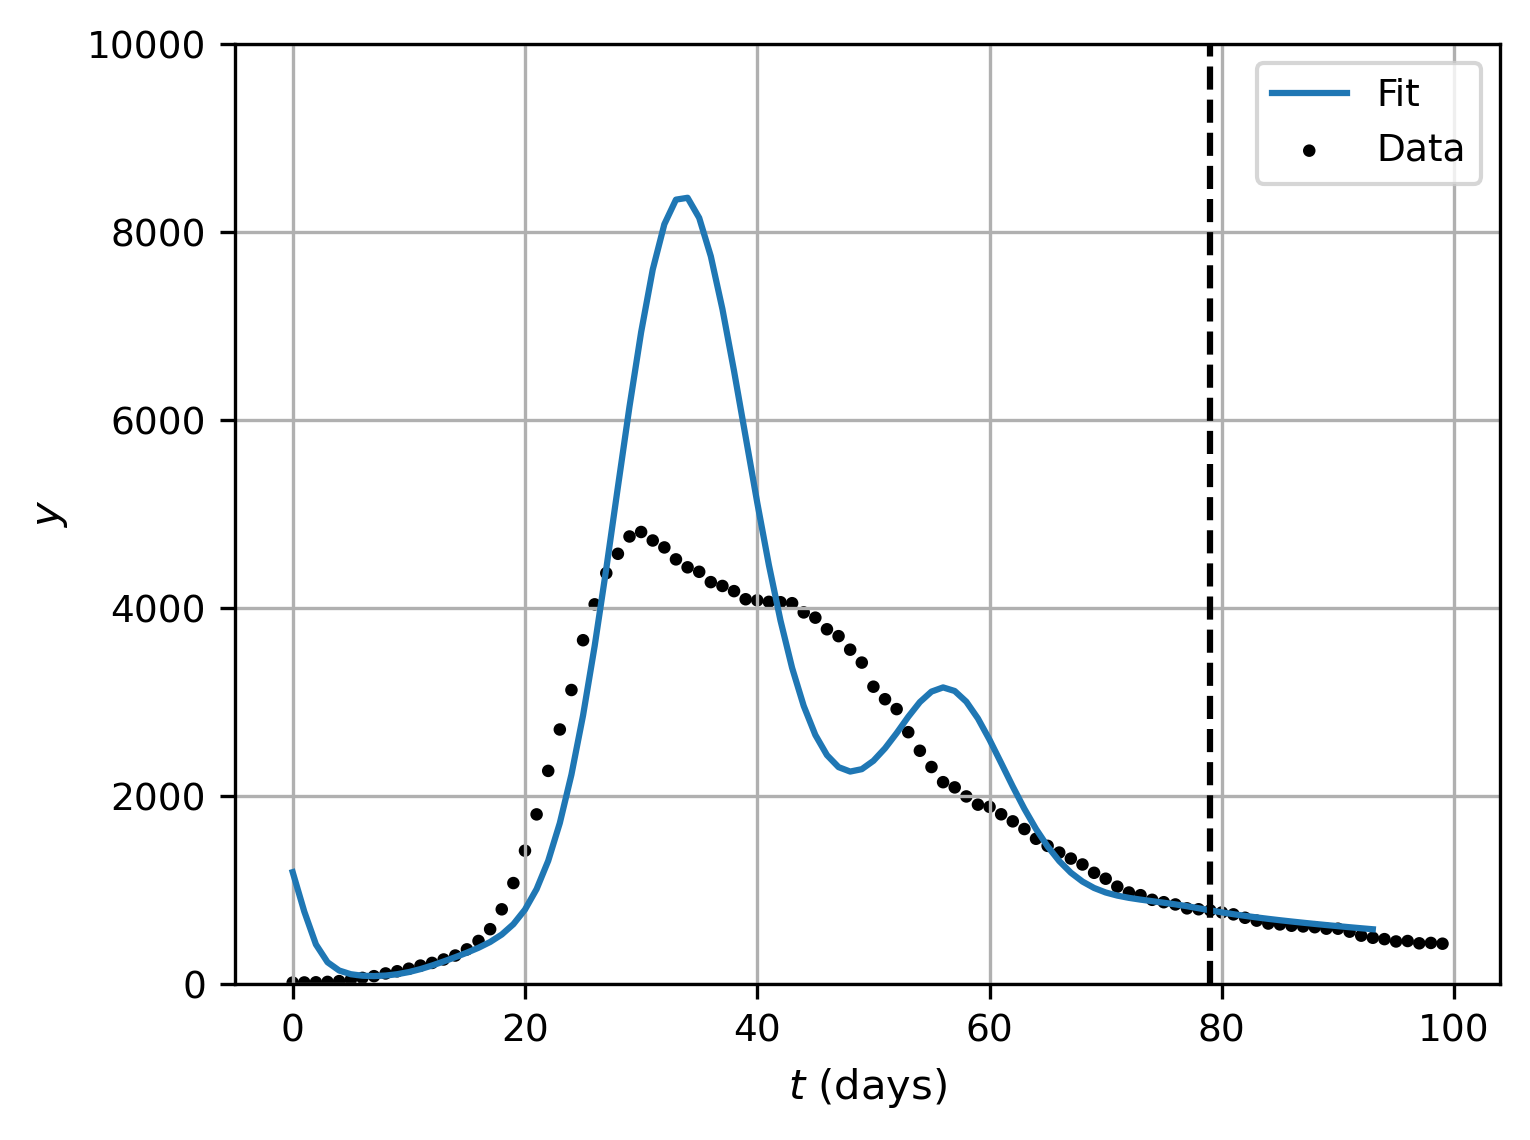

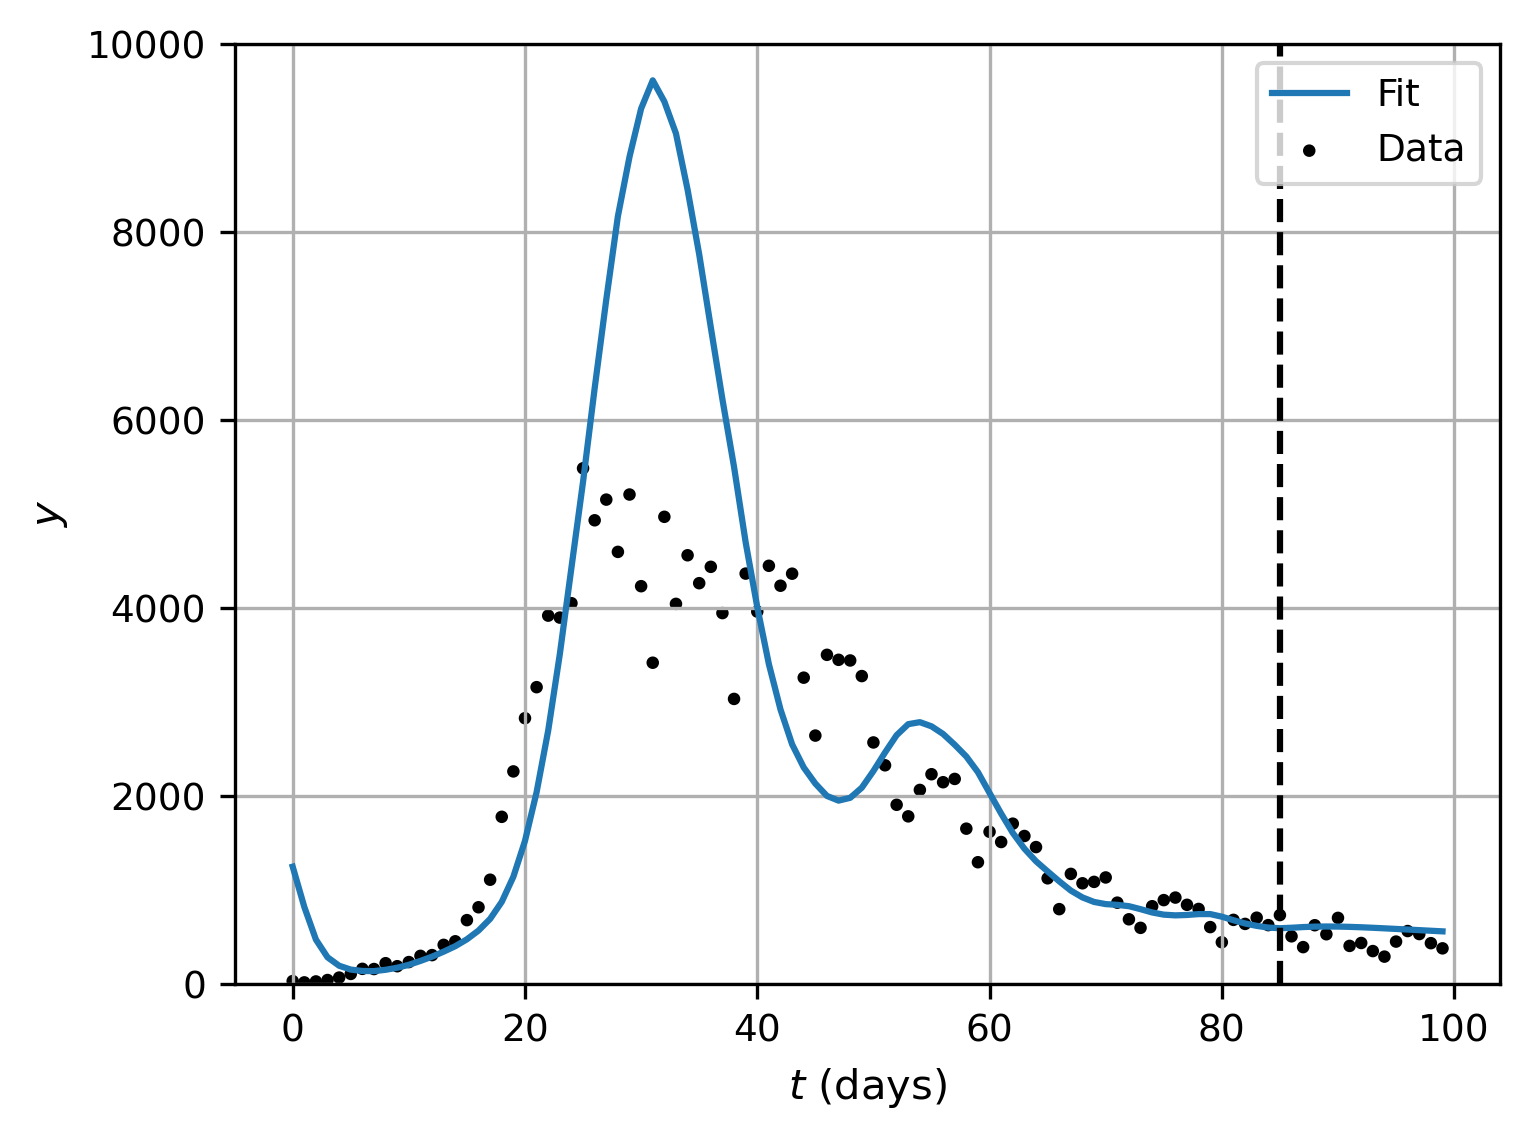

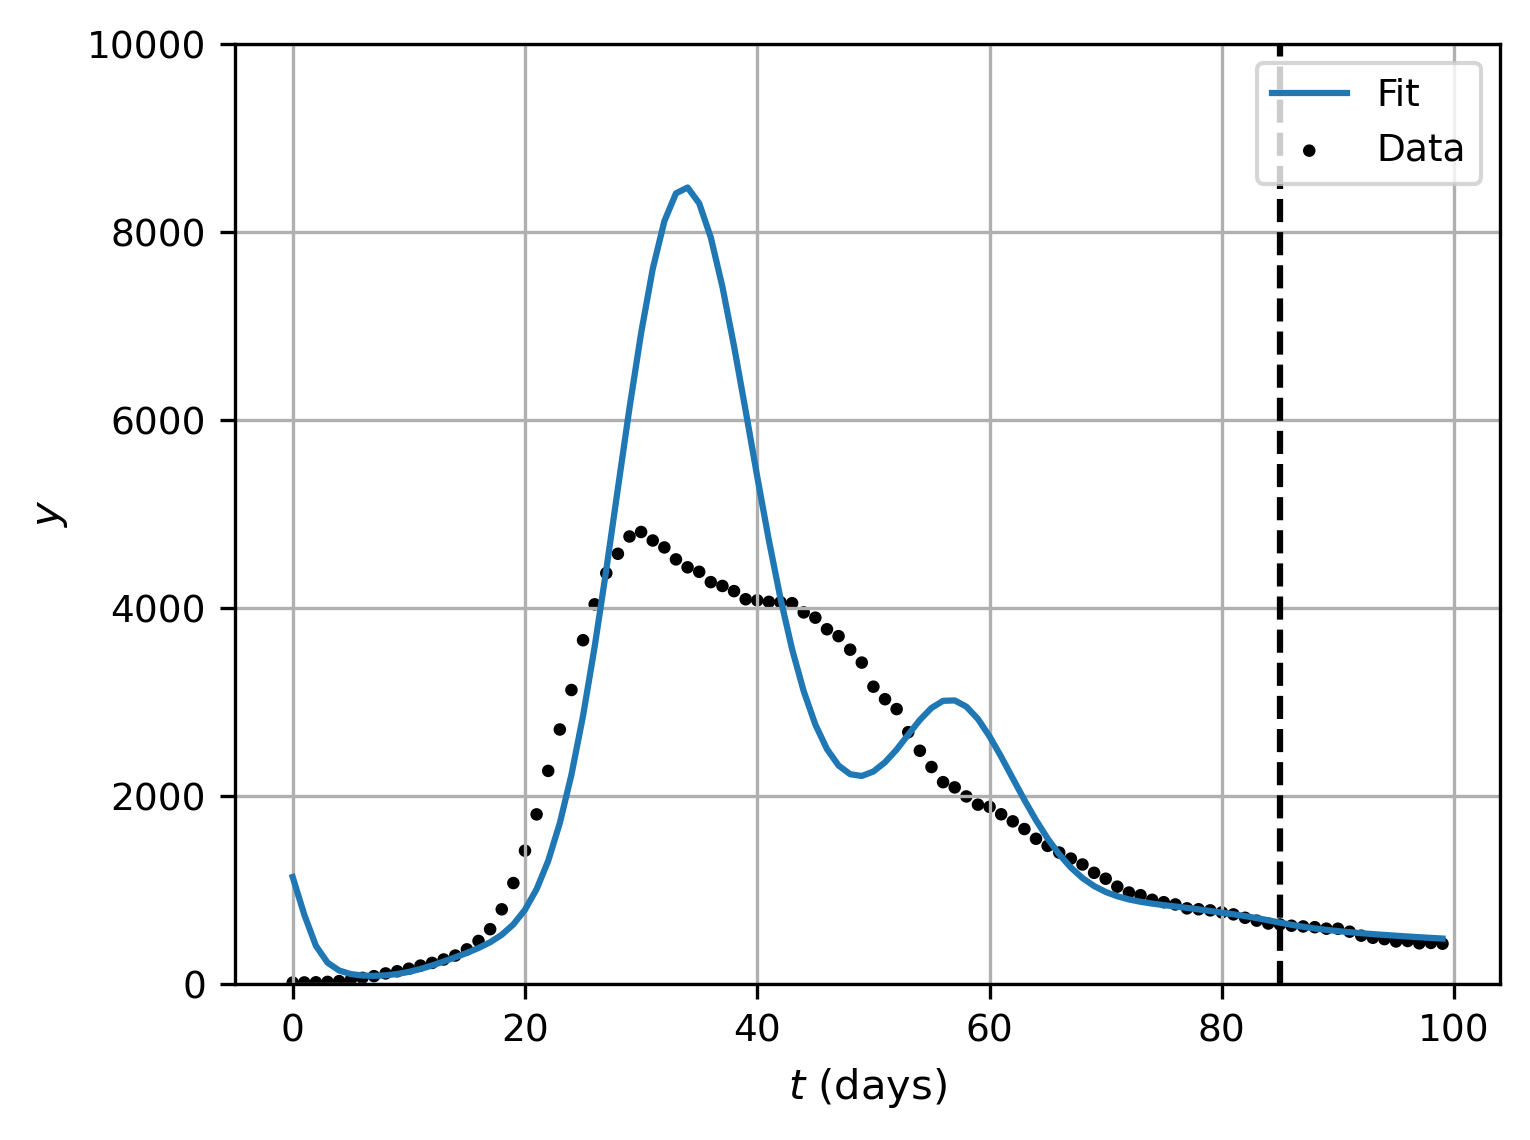

In [3]:
model = eqx.tree_deserialise_leaves("serialised_models/rnn_14_day_ahead.eqx", like=RNN.RNNForecaster(input_size=2, hidden_size=64, output_size=2, key=jr.key(0)))
for control_until in [10, 20, 30, 40, 50, 60, 70, 80, 86]:
    plot_predictions(model, raw_ys, control_until=control_until, file_name=f"plots/rnn_predictions_raw_ys_control_{control_until}")
    plot_predictions(model, averaged_ys, control_until=control_until, file_name=f"plots/rnn_predictions_averaged_ys_control_{control_until}")

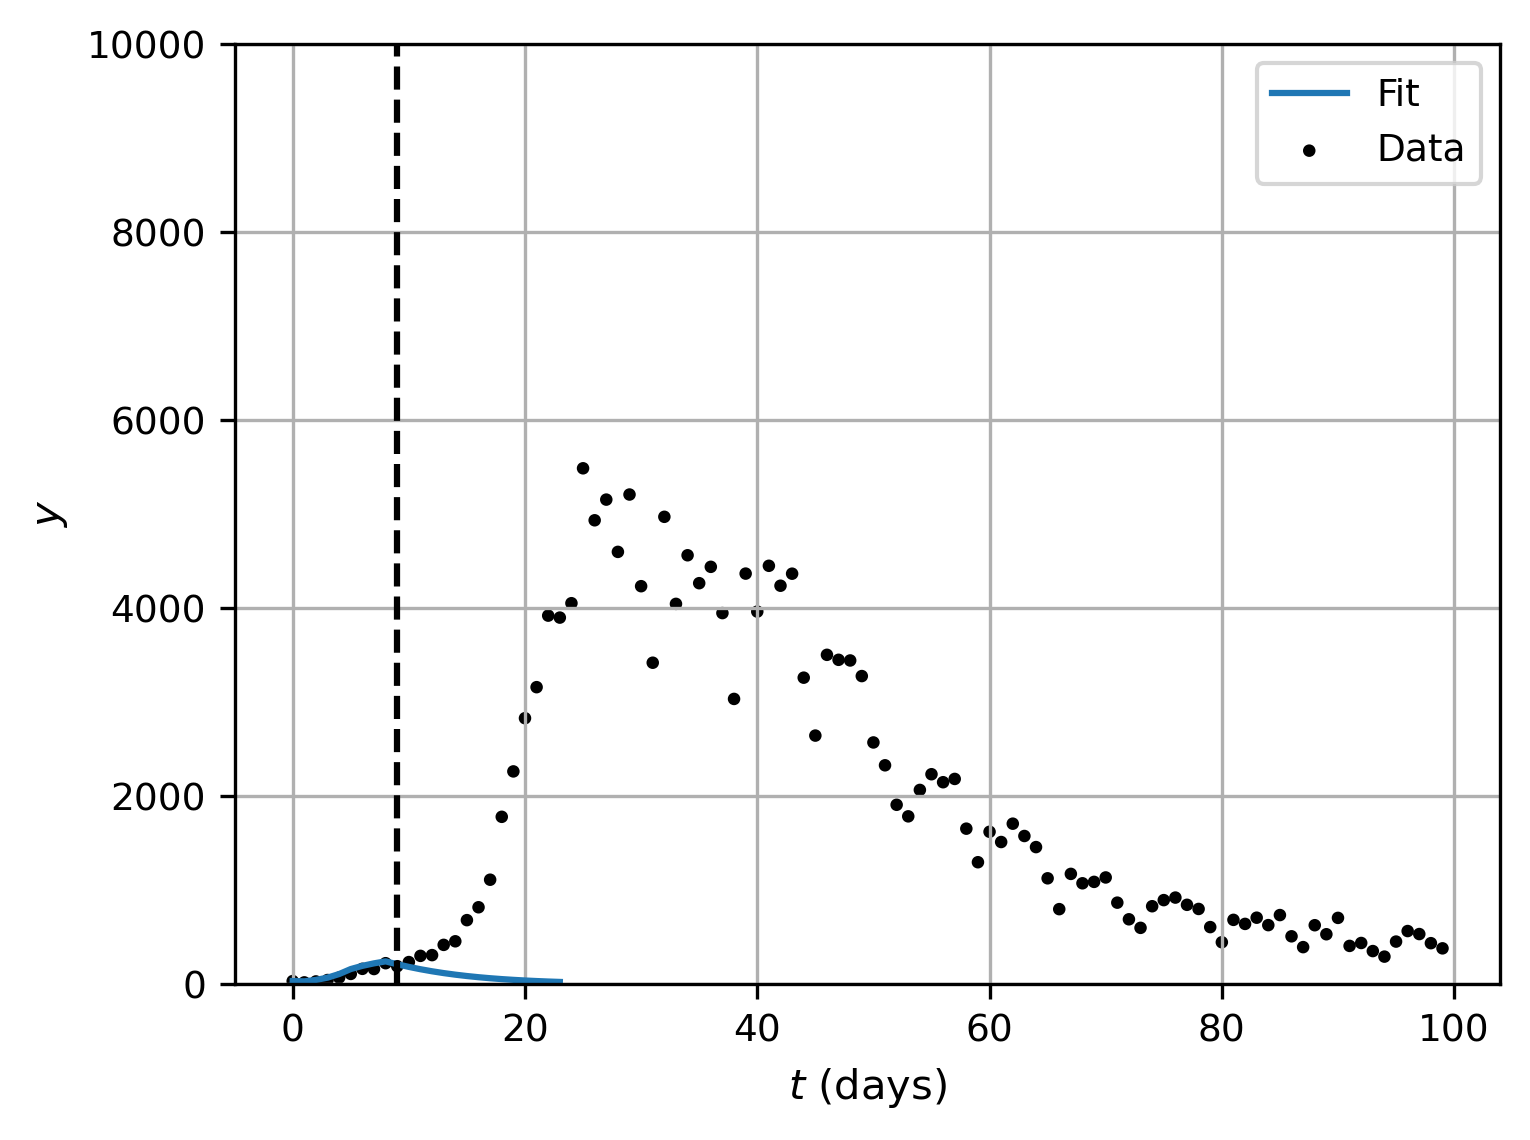

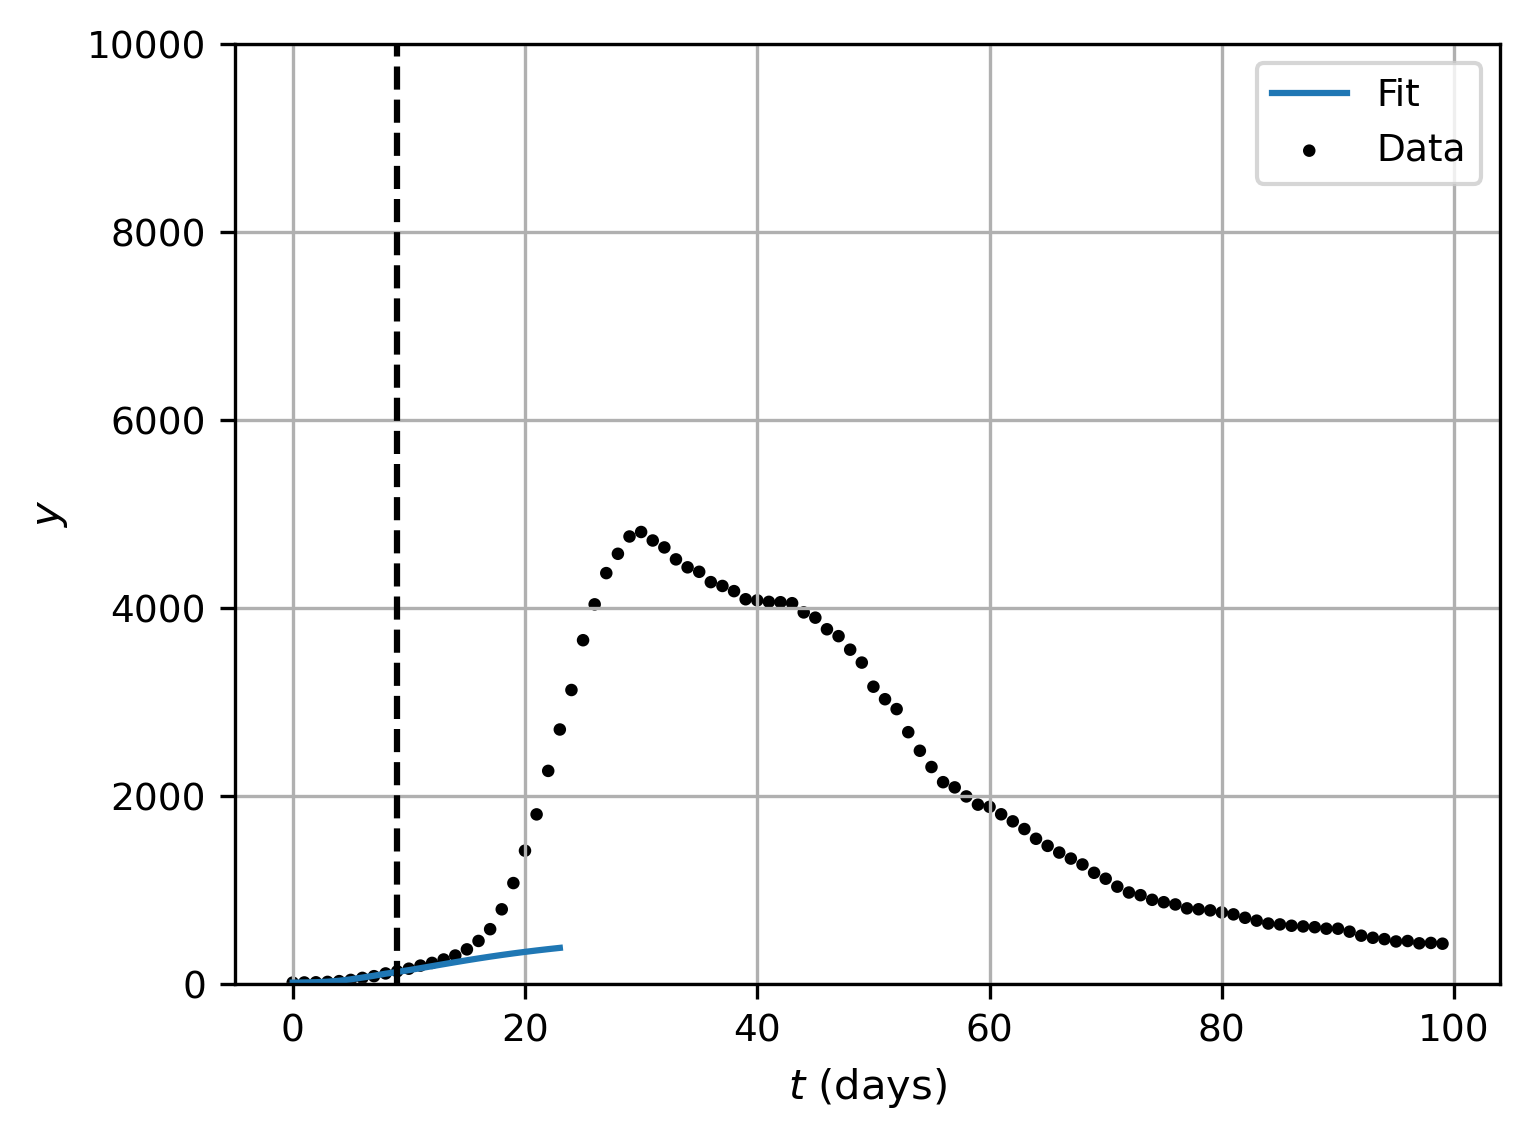

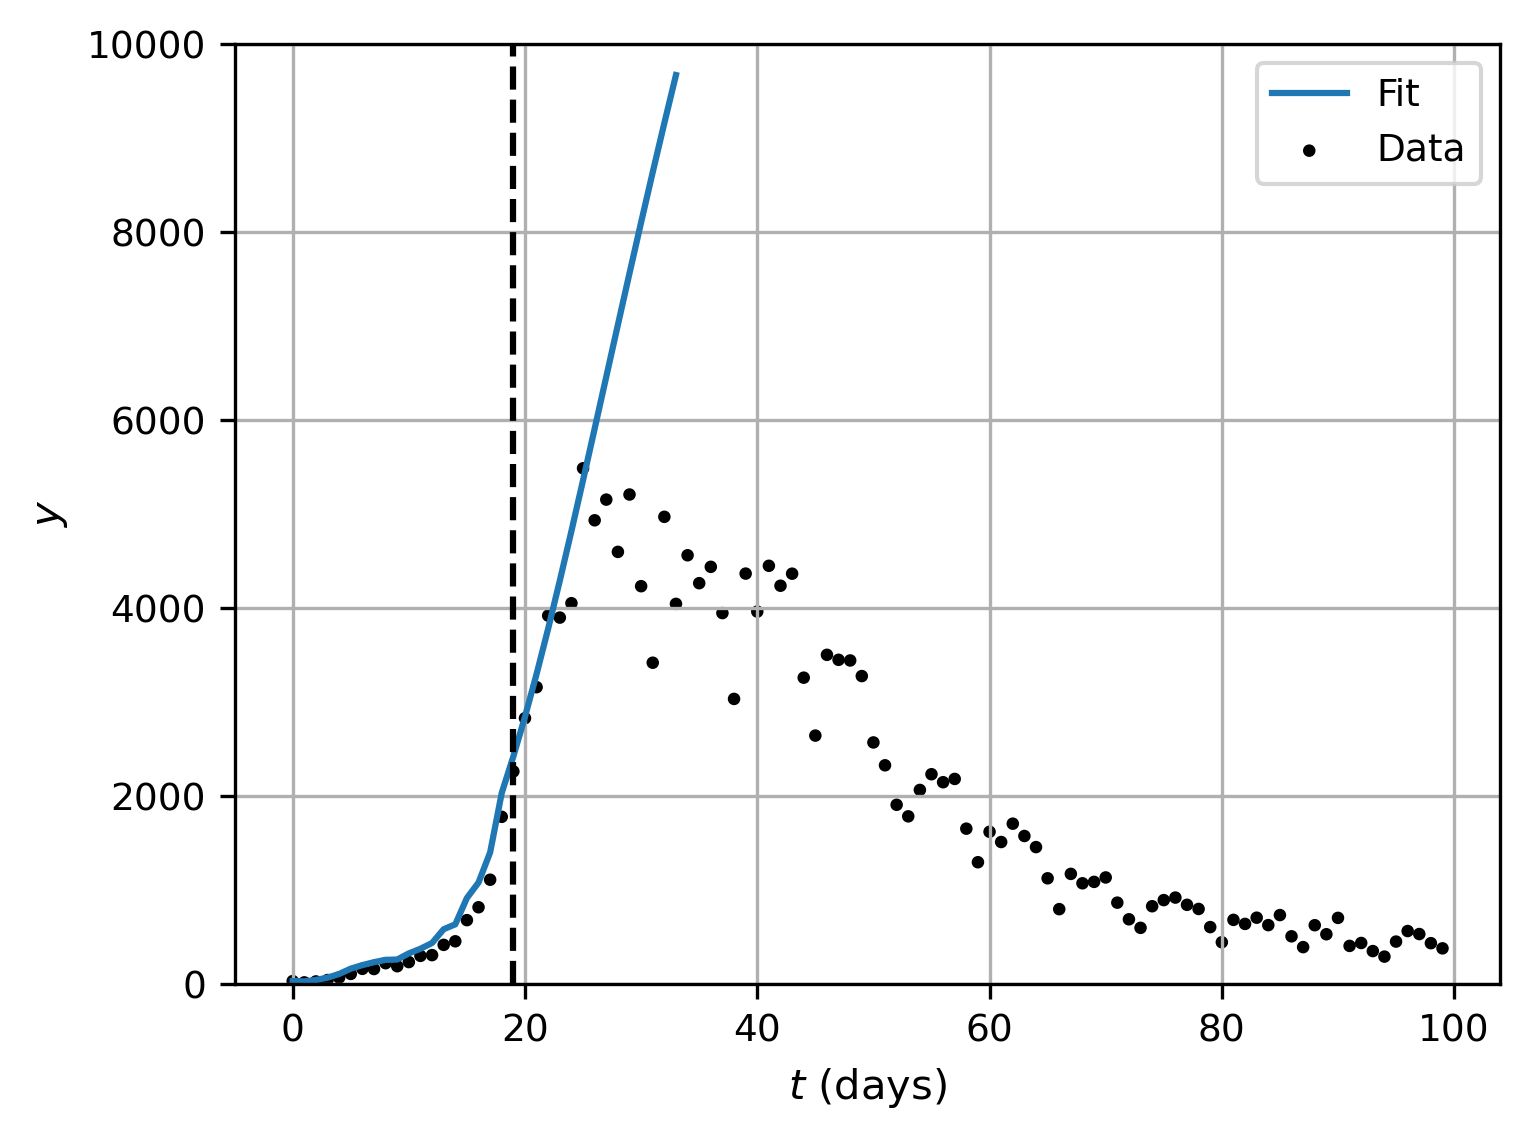

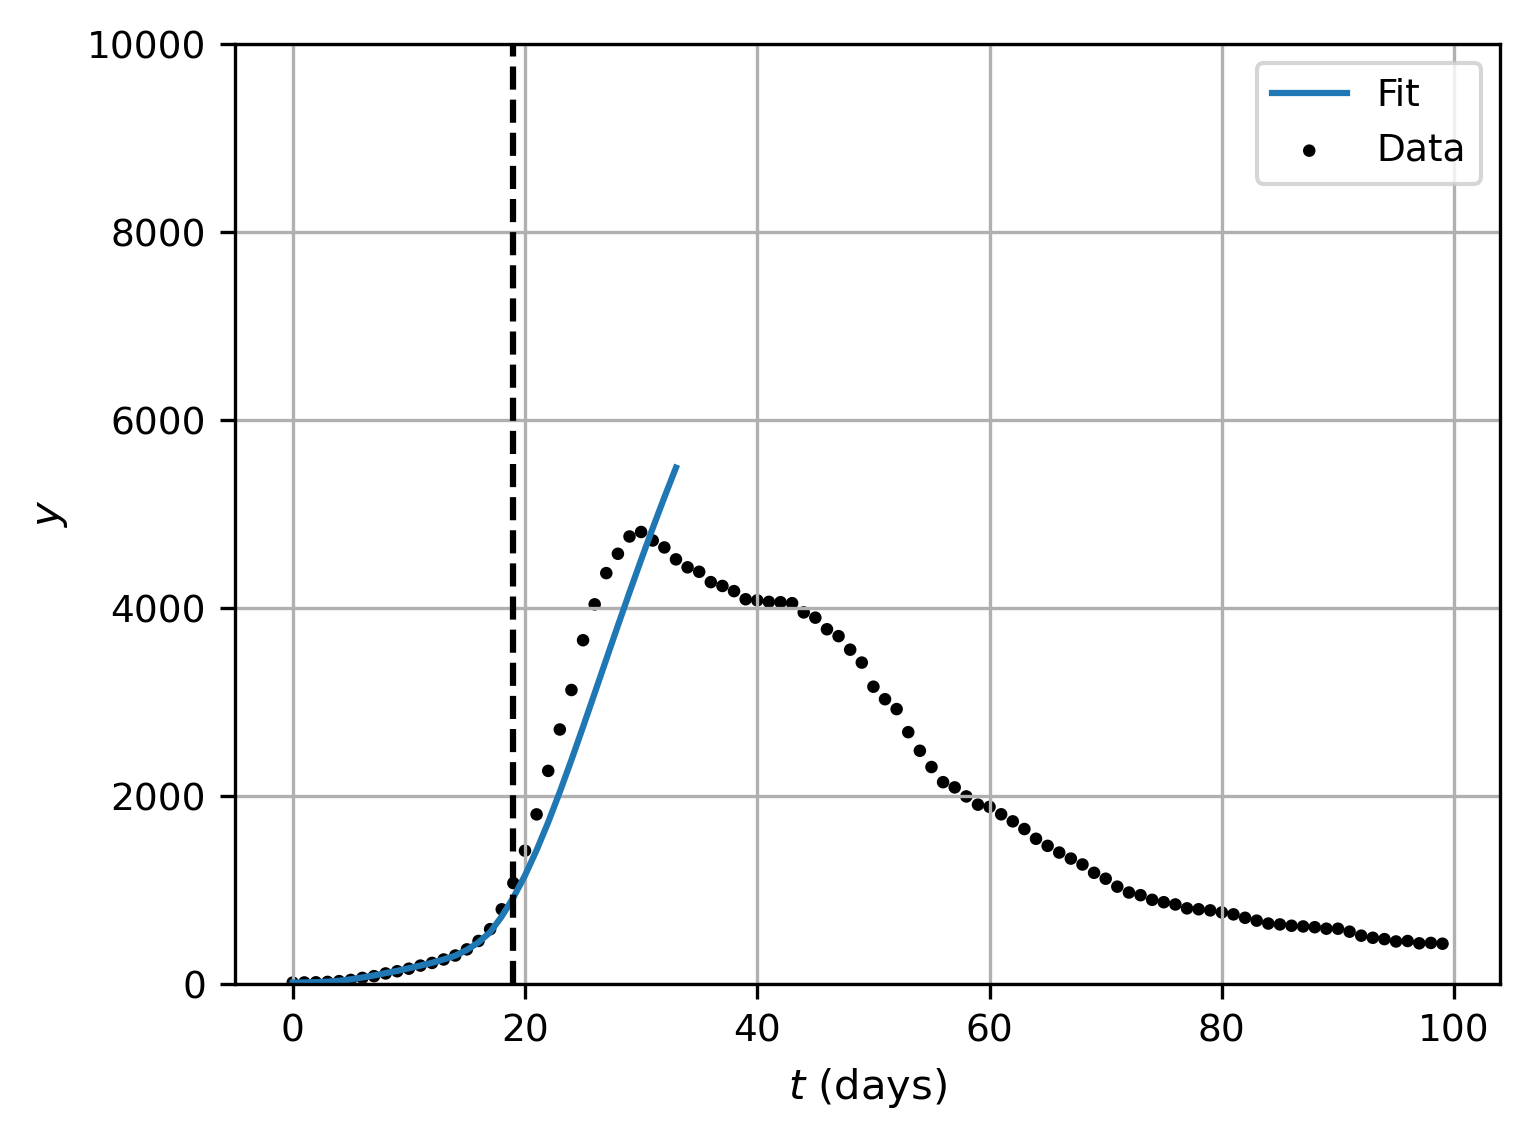

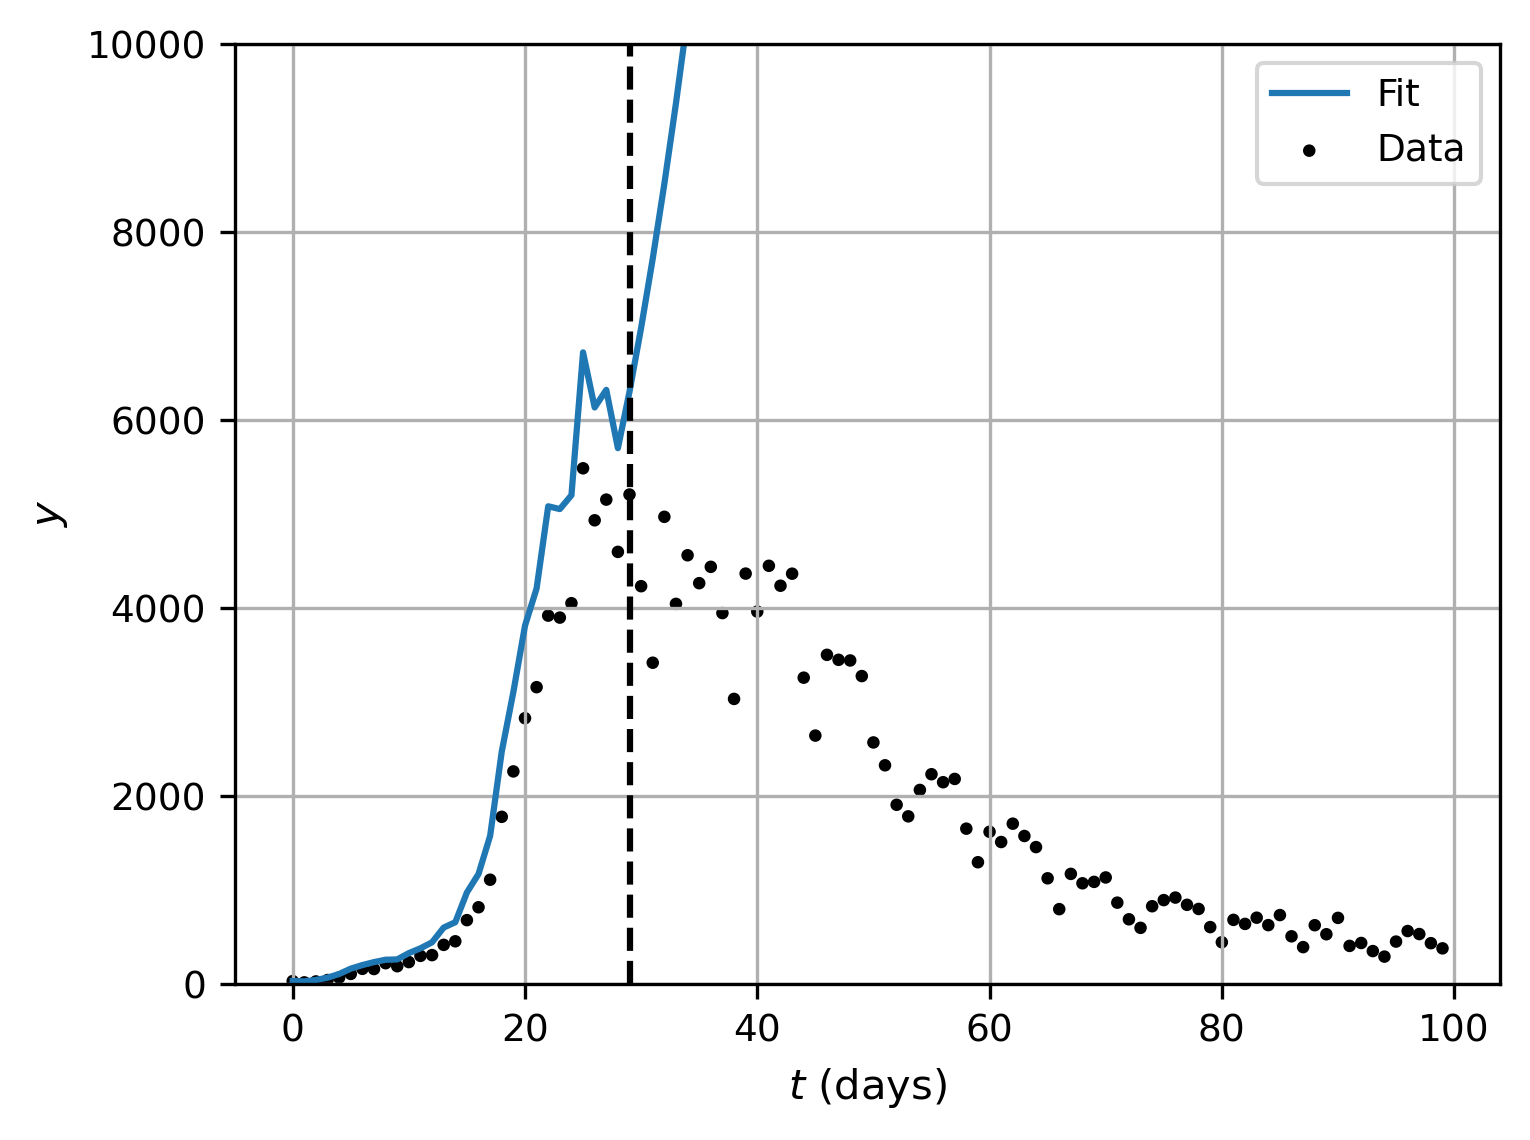

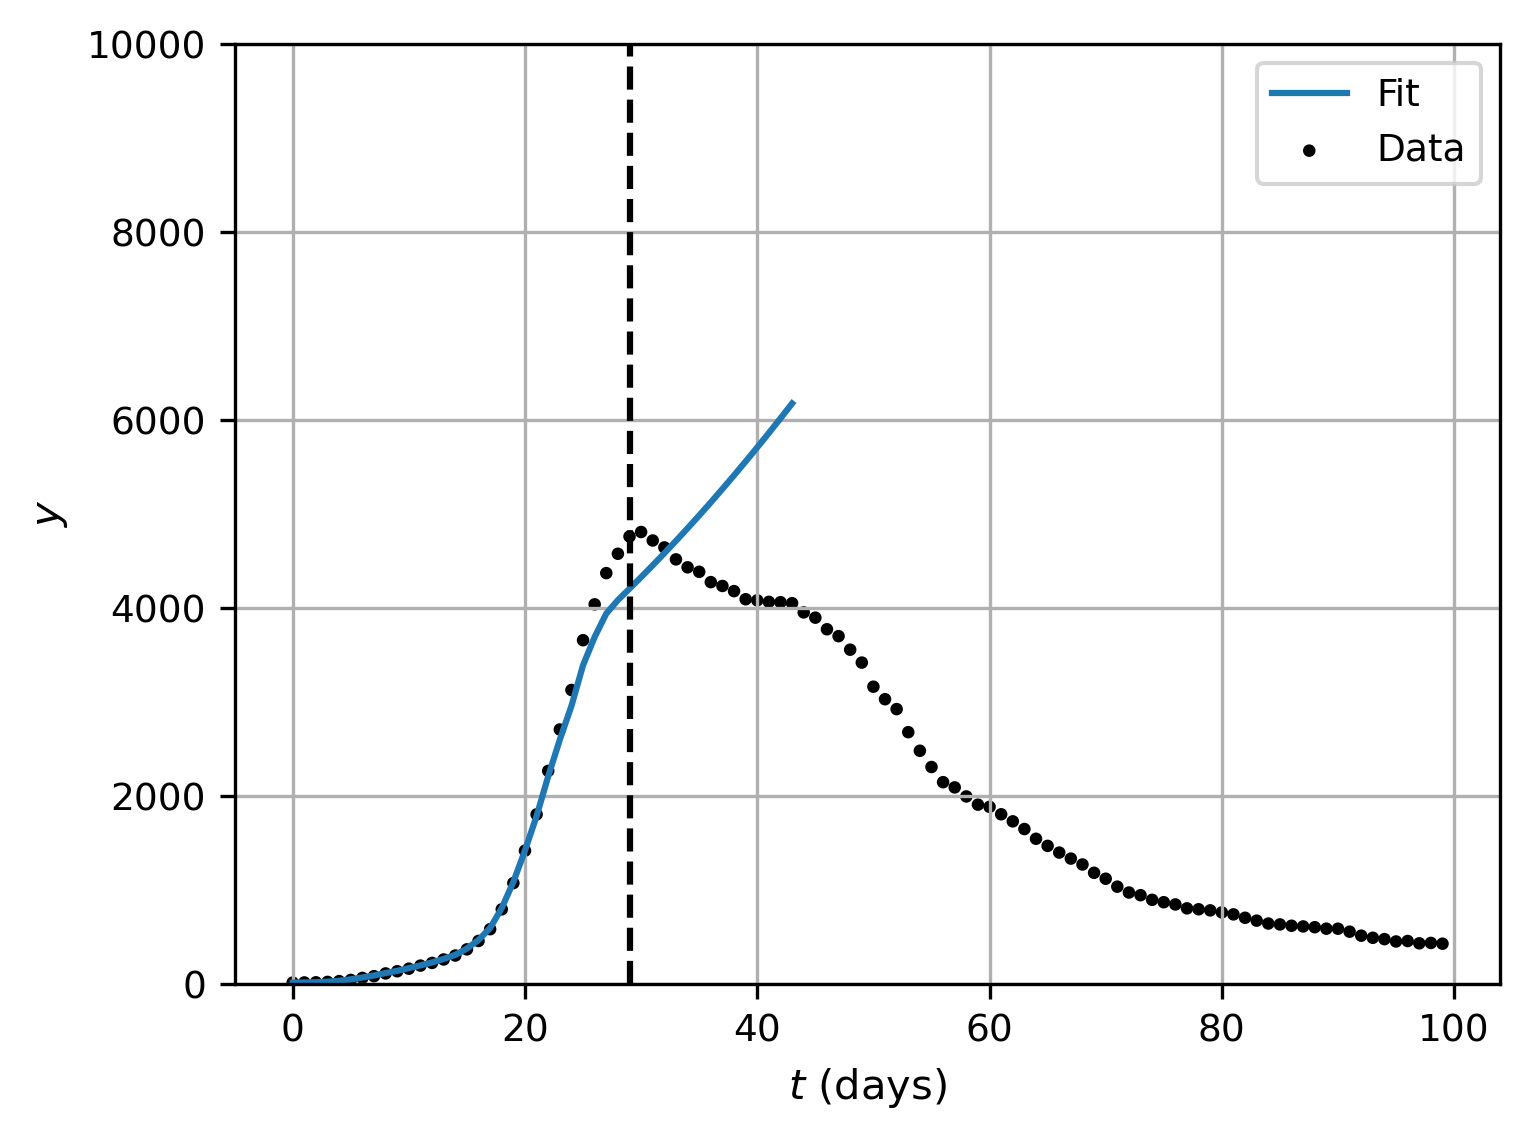

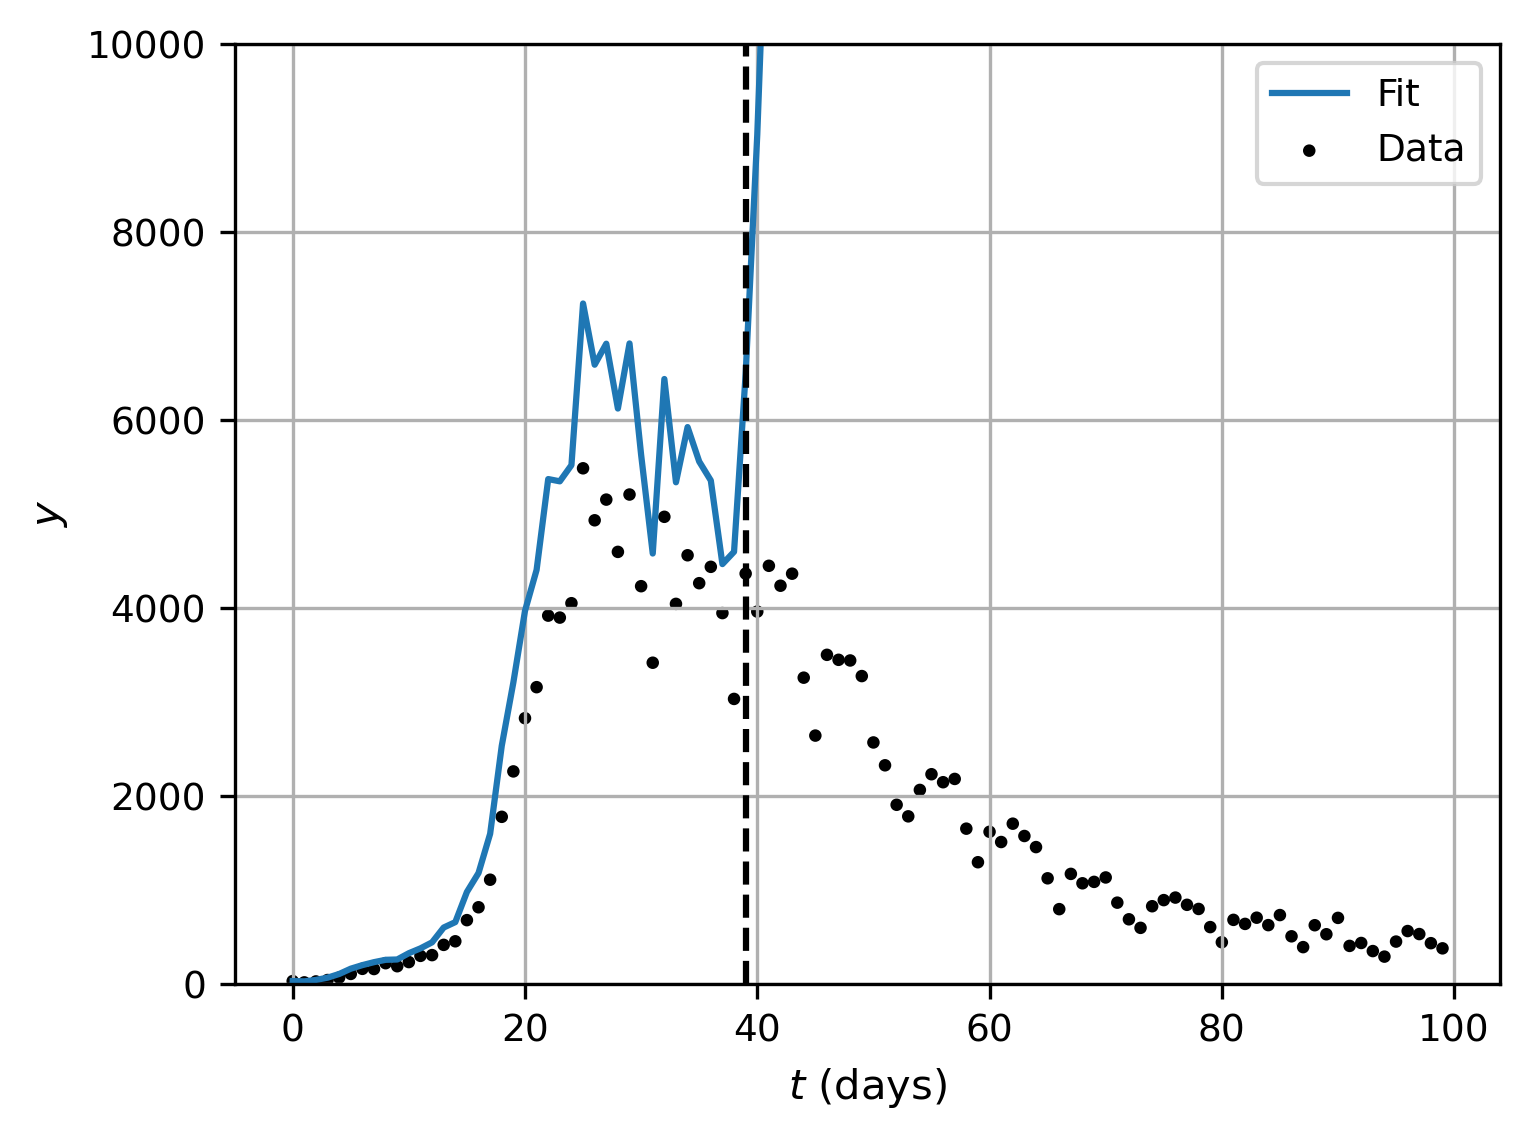

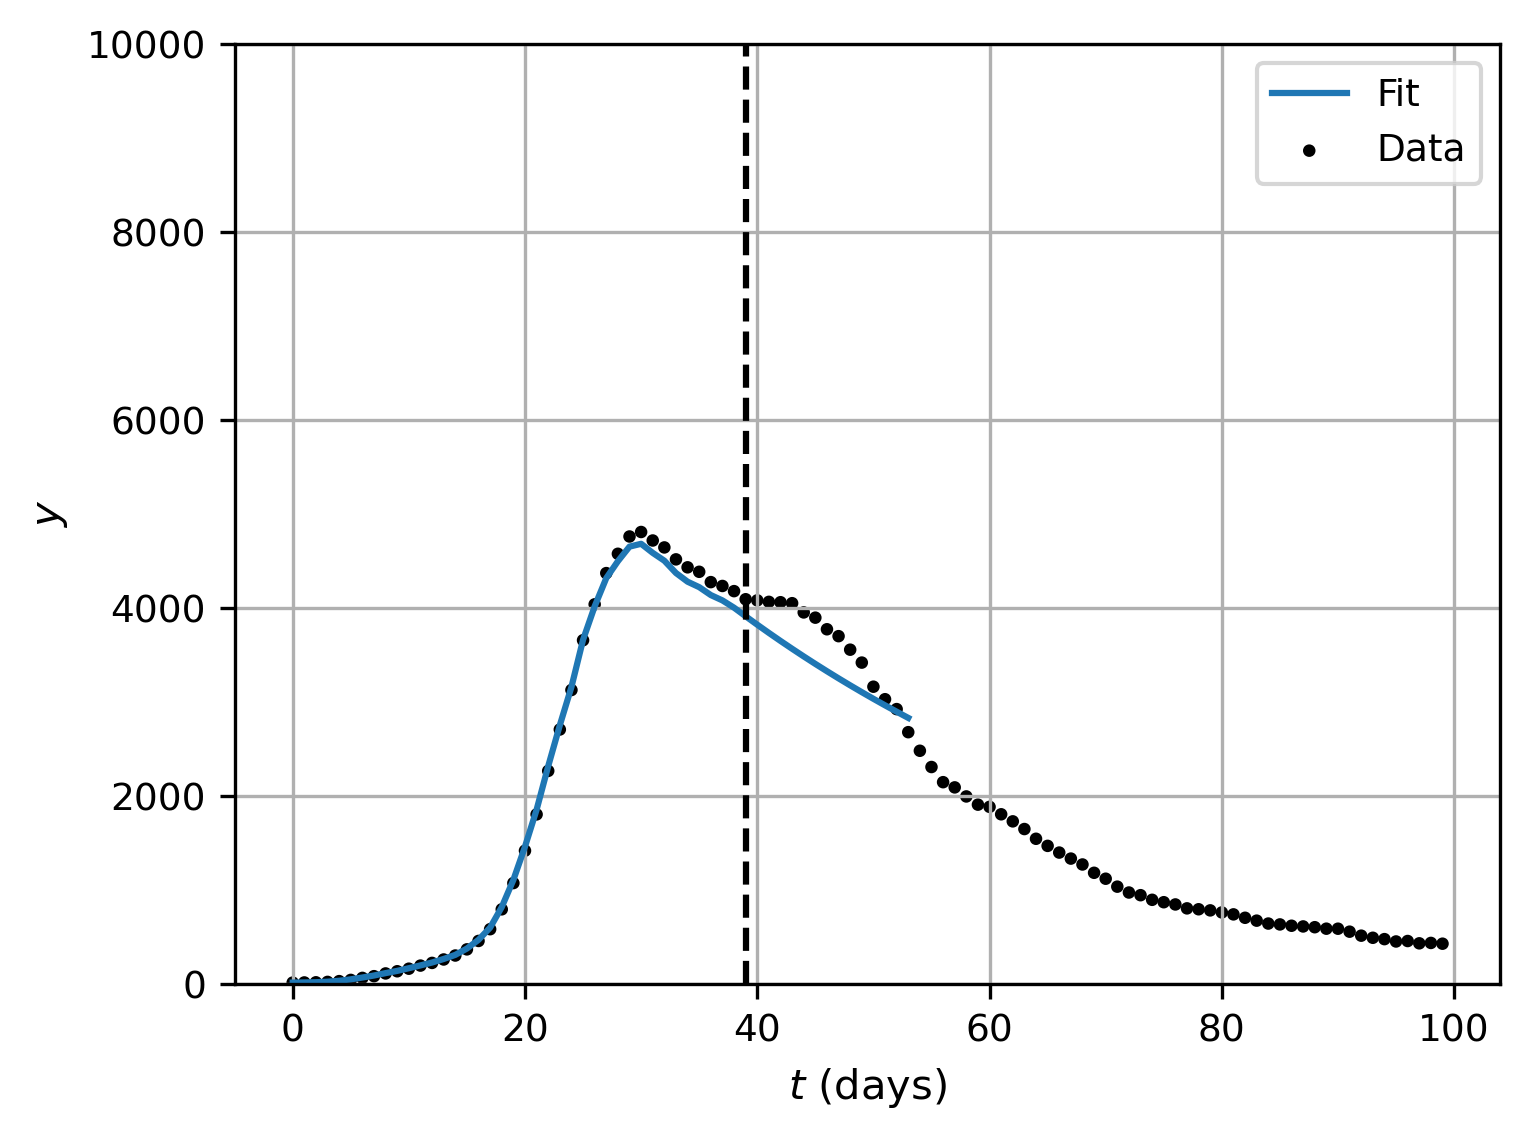

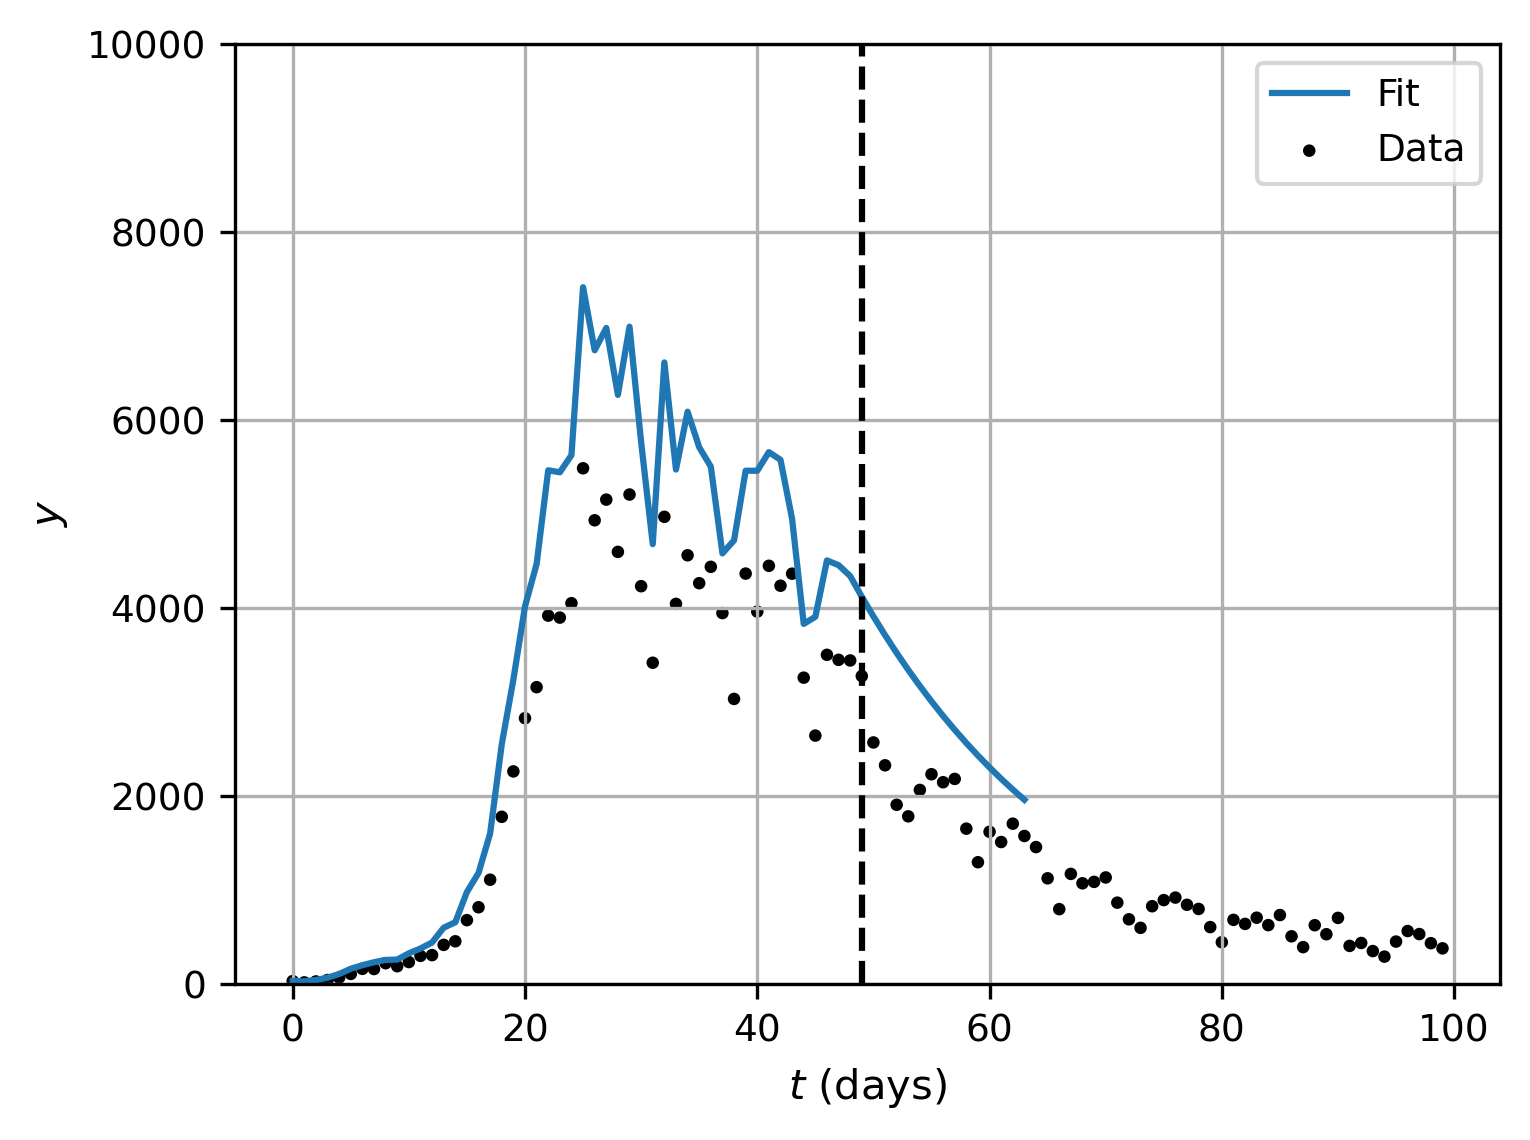

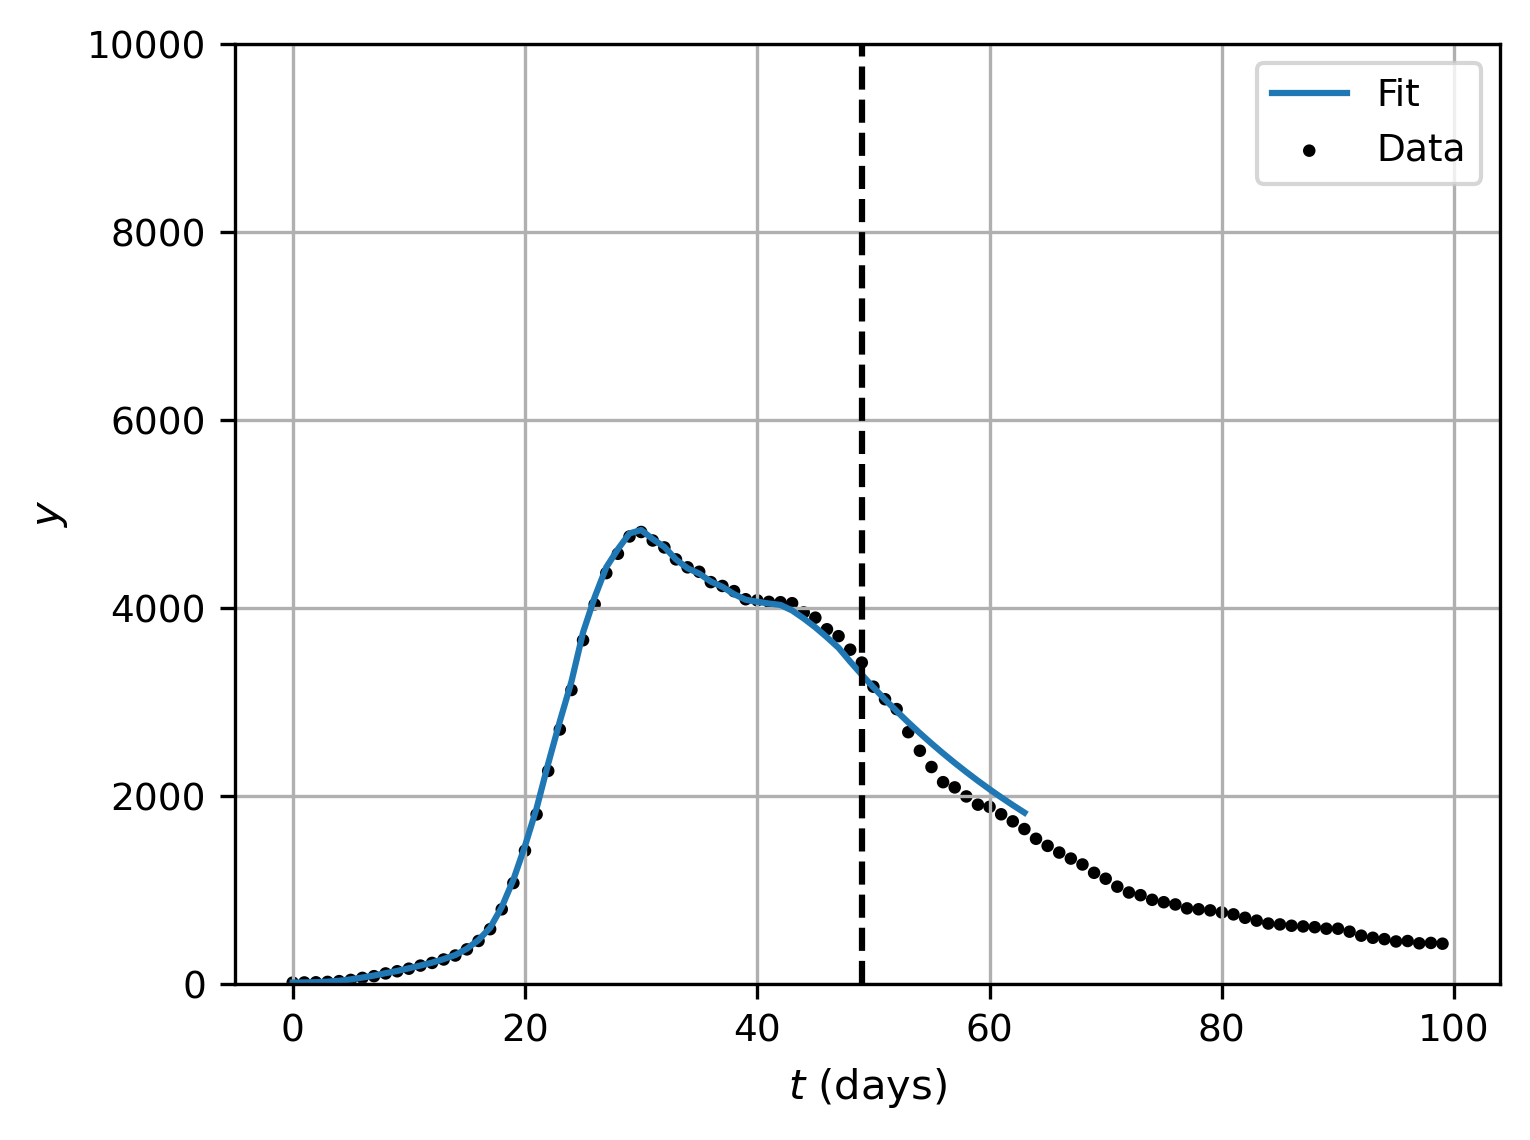

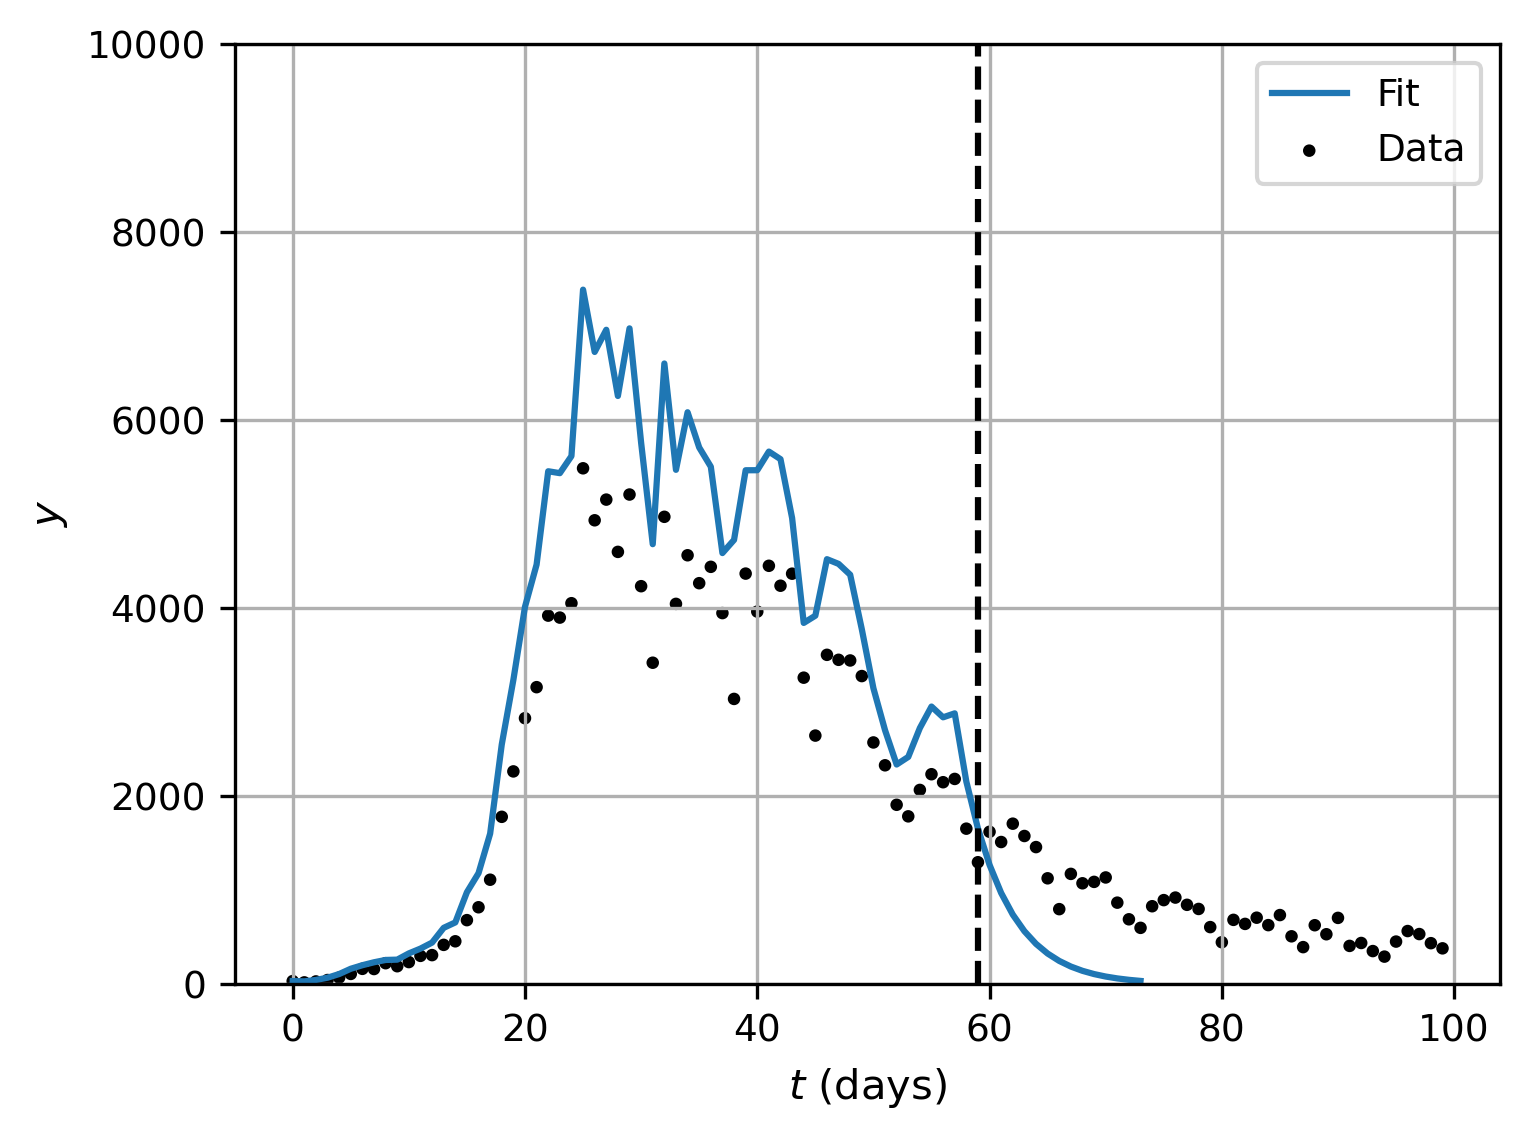

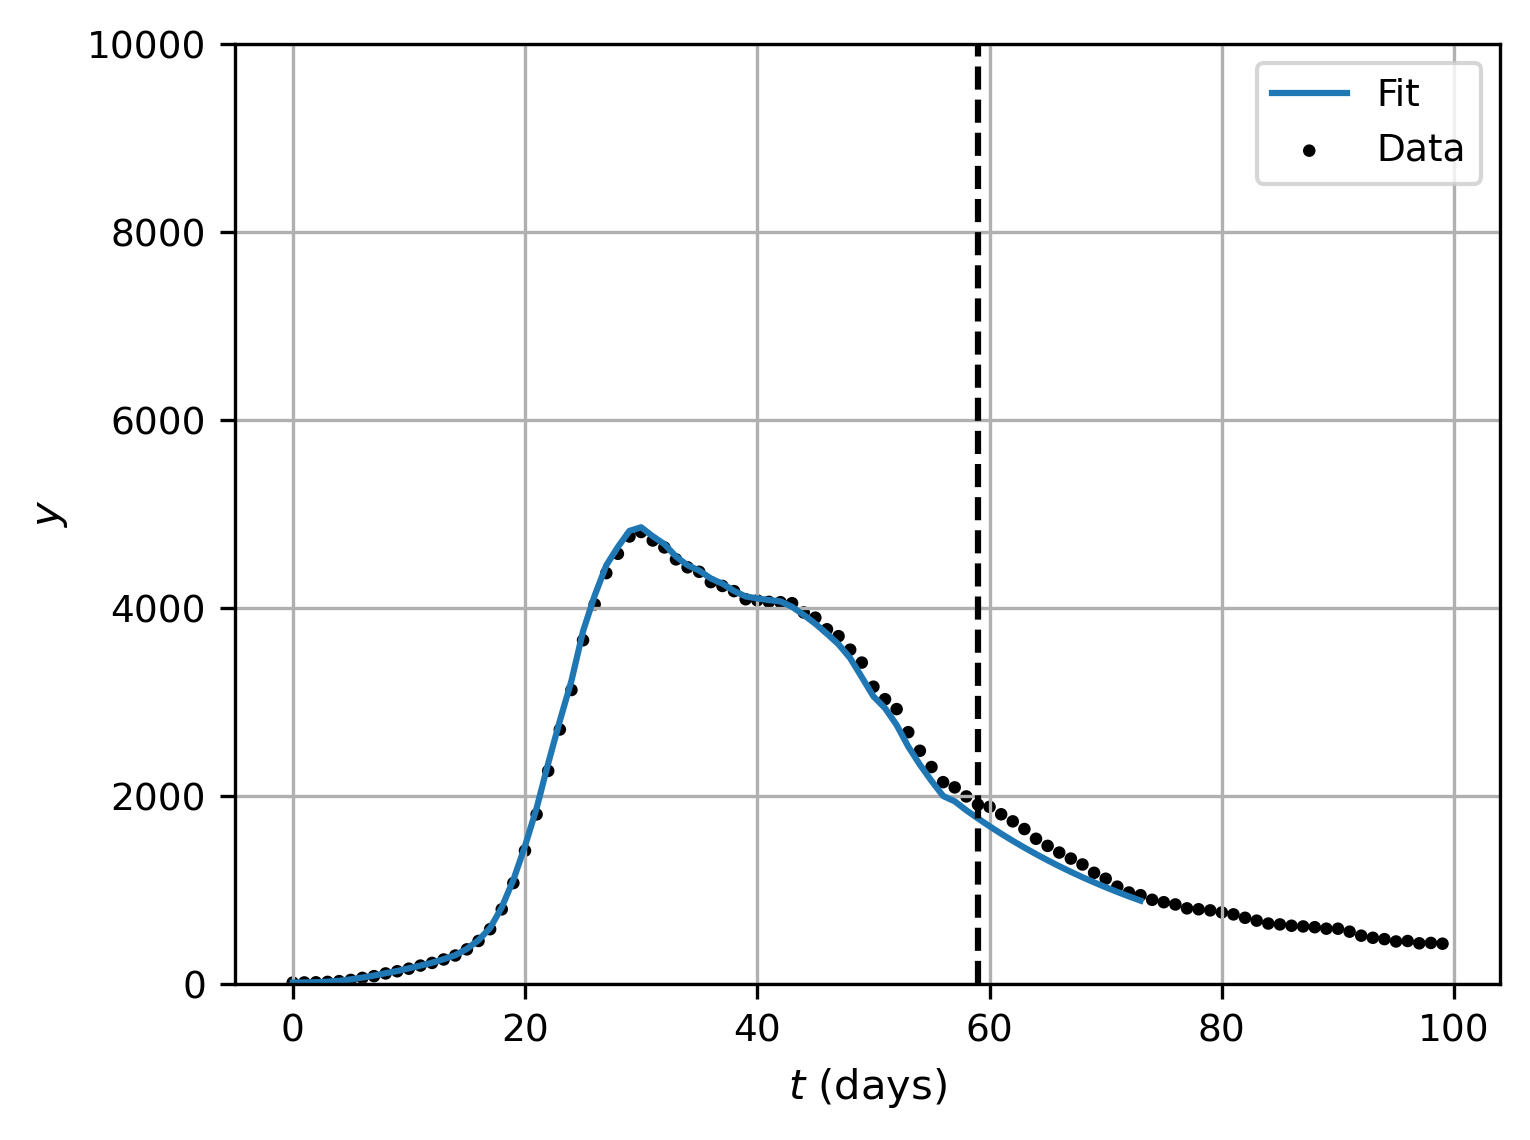

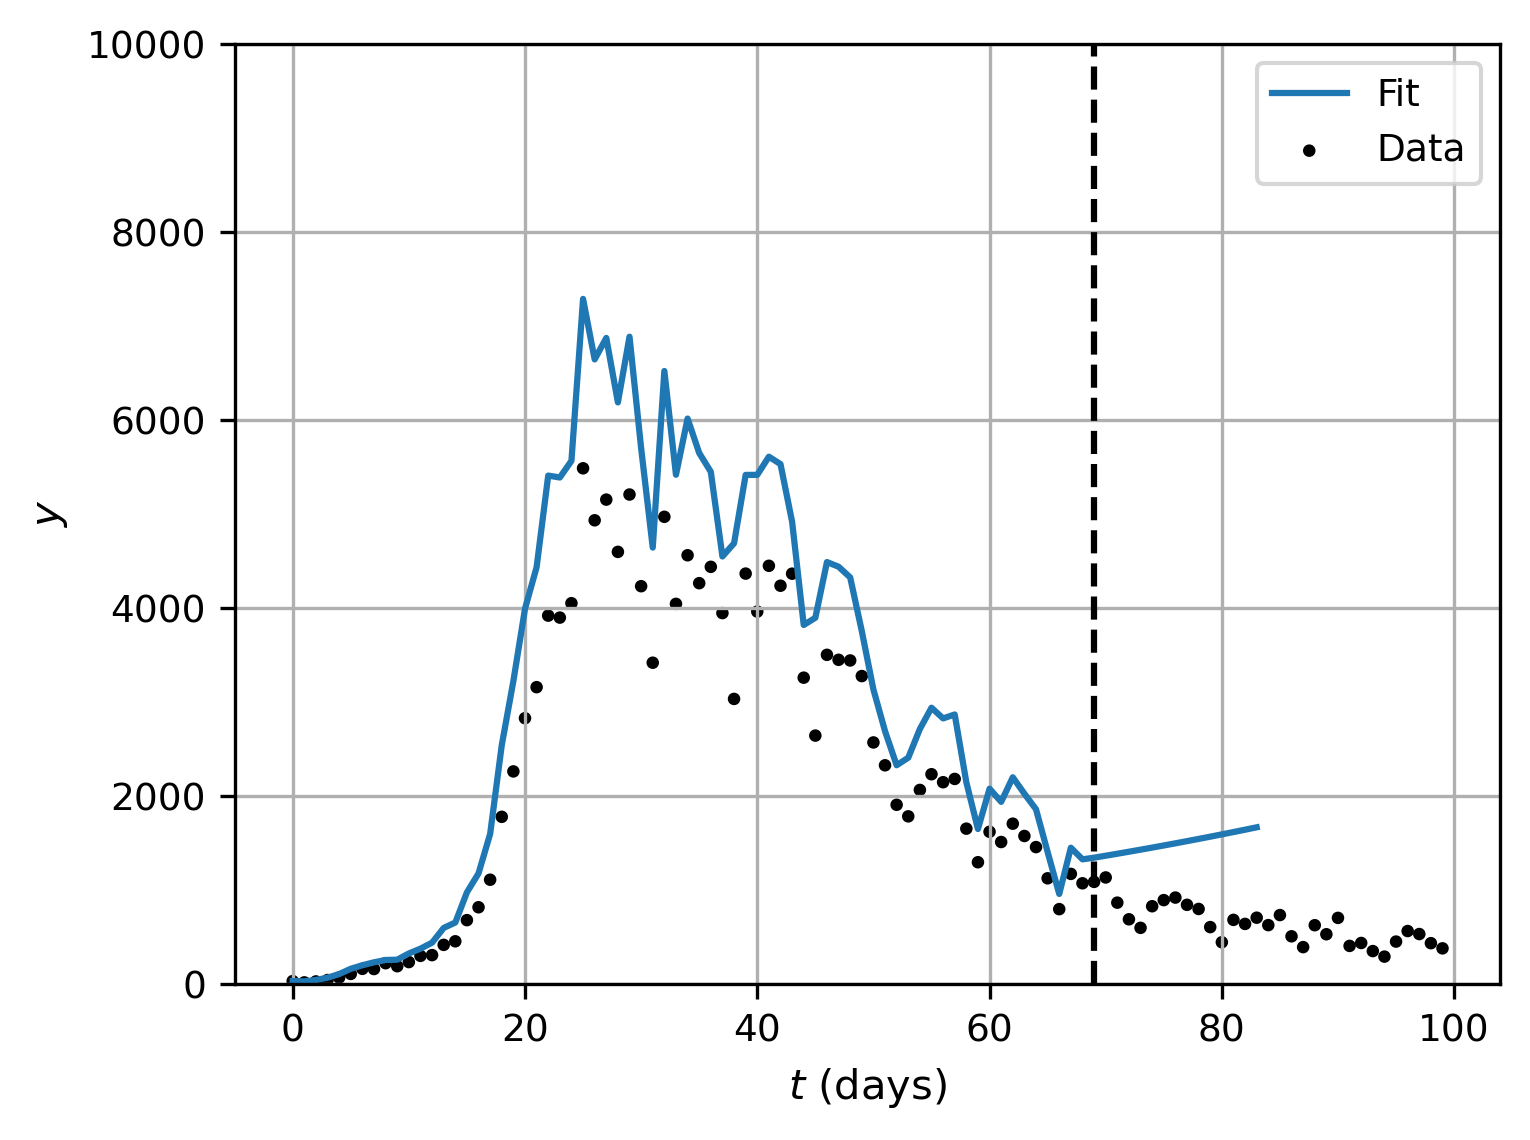

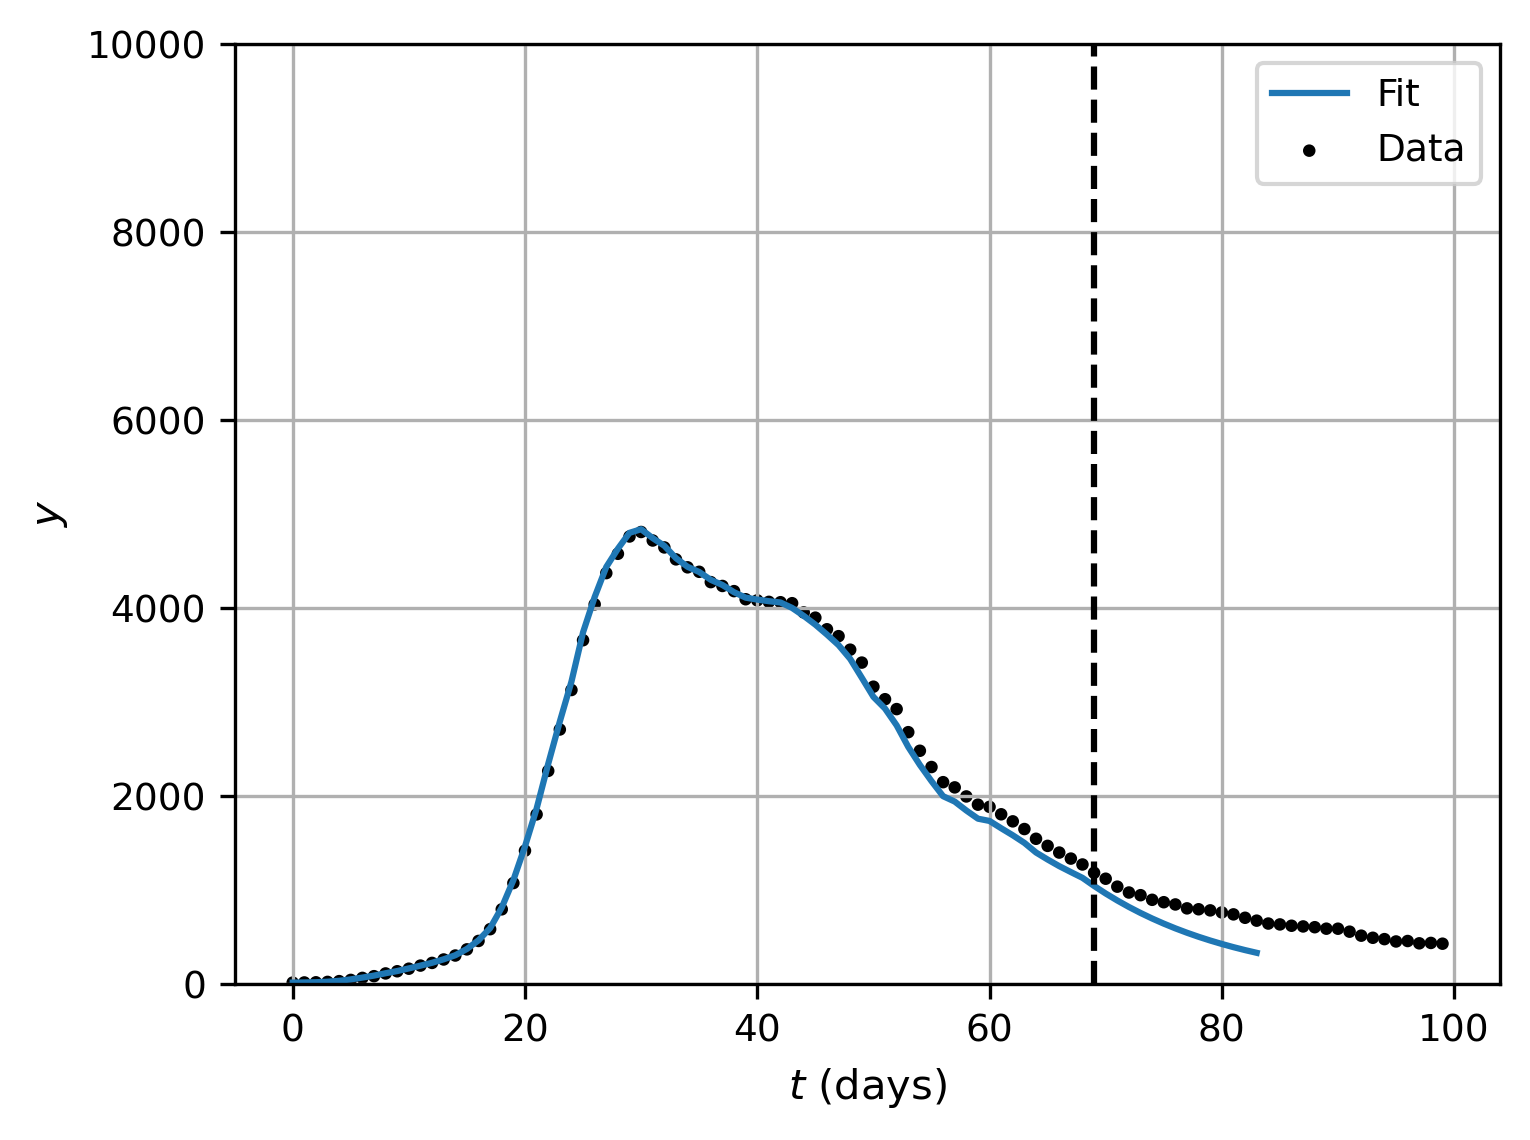

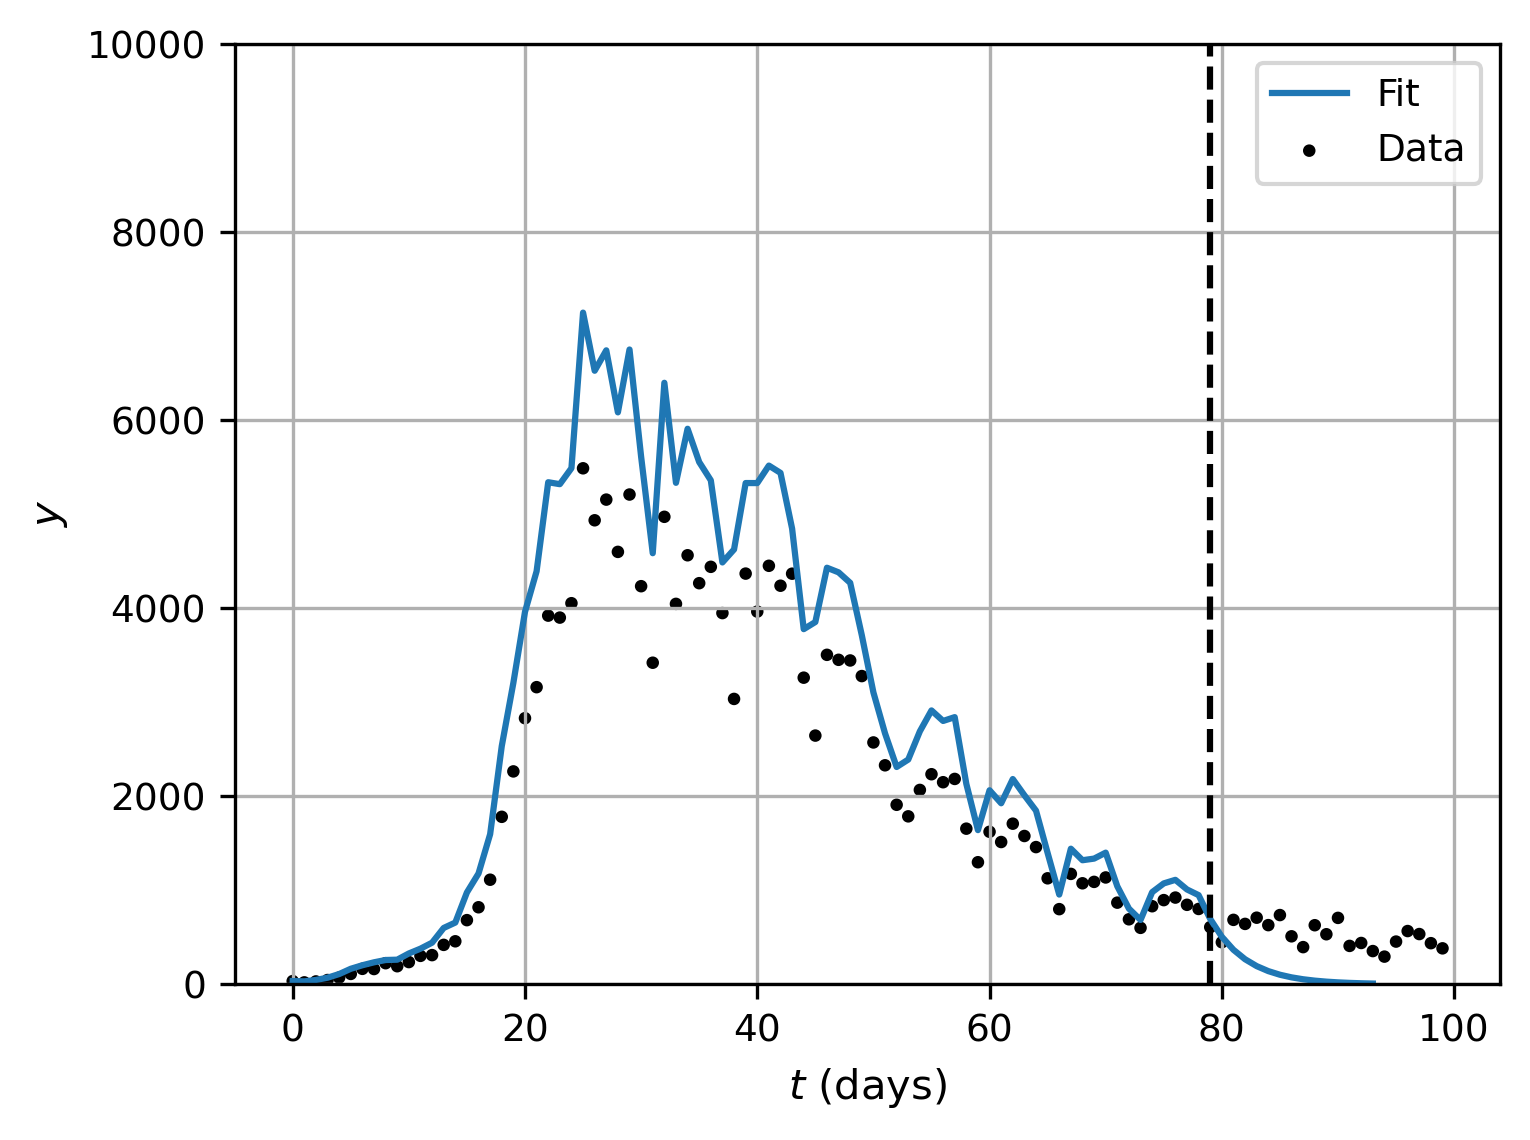

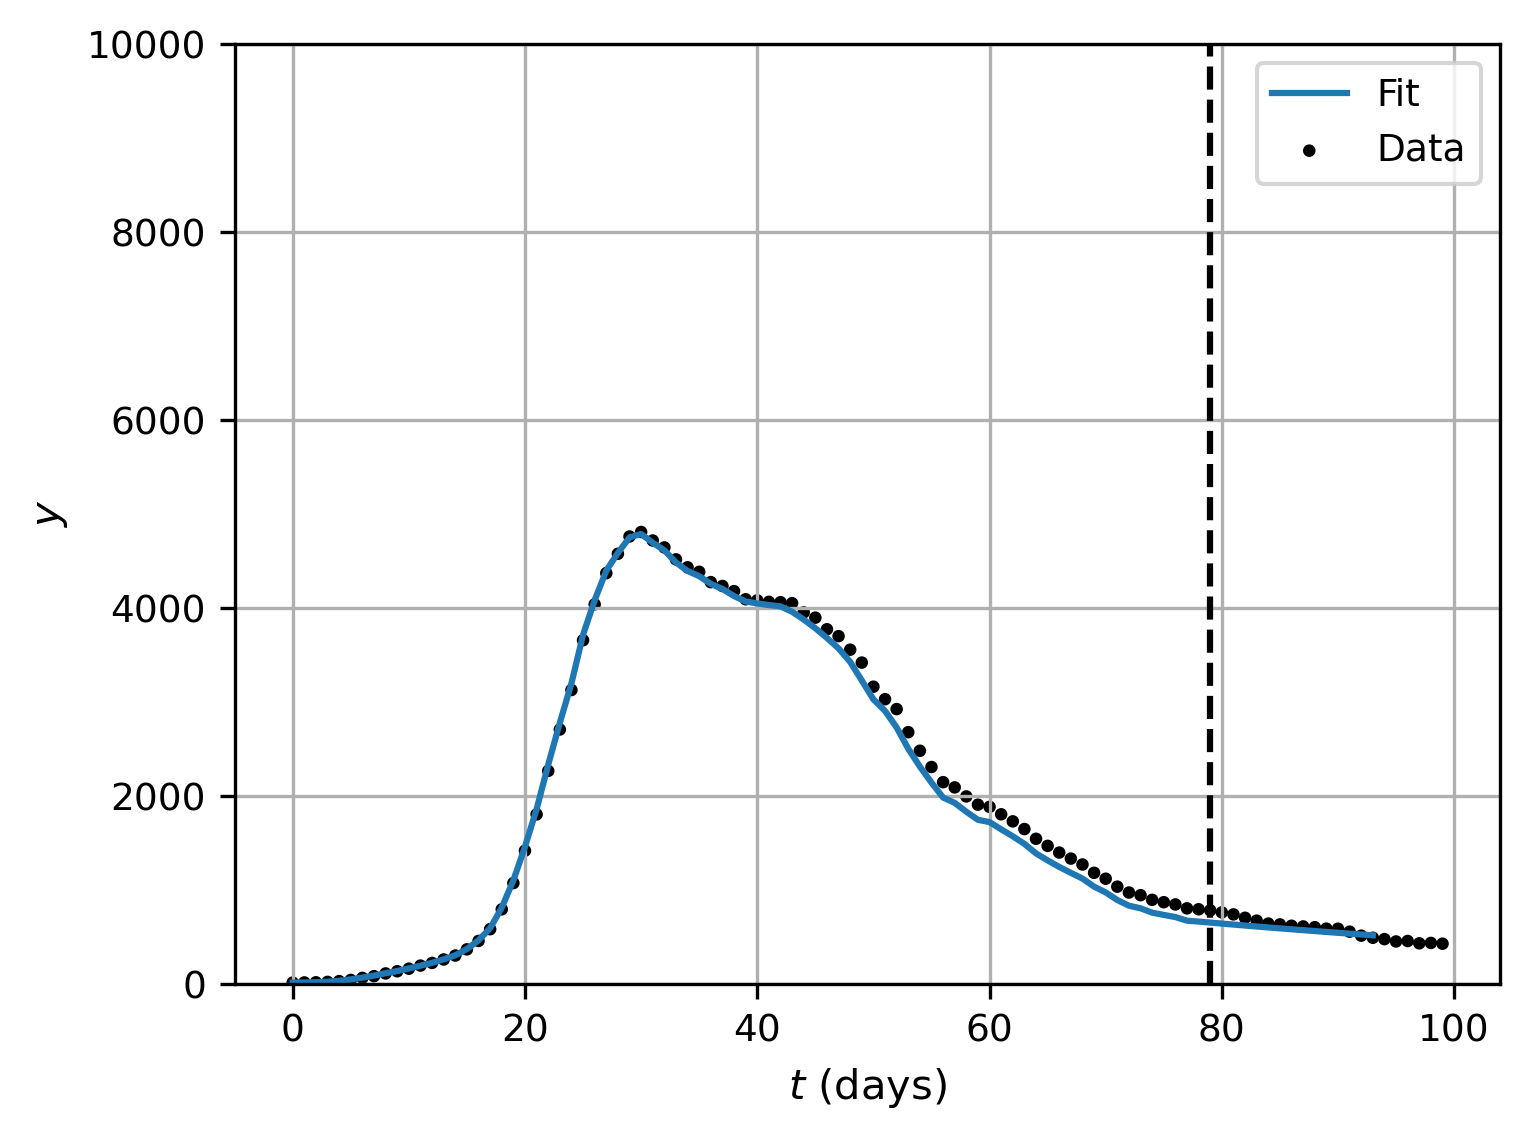

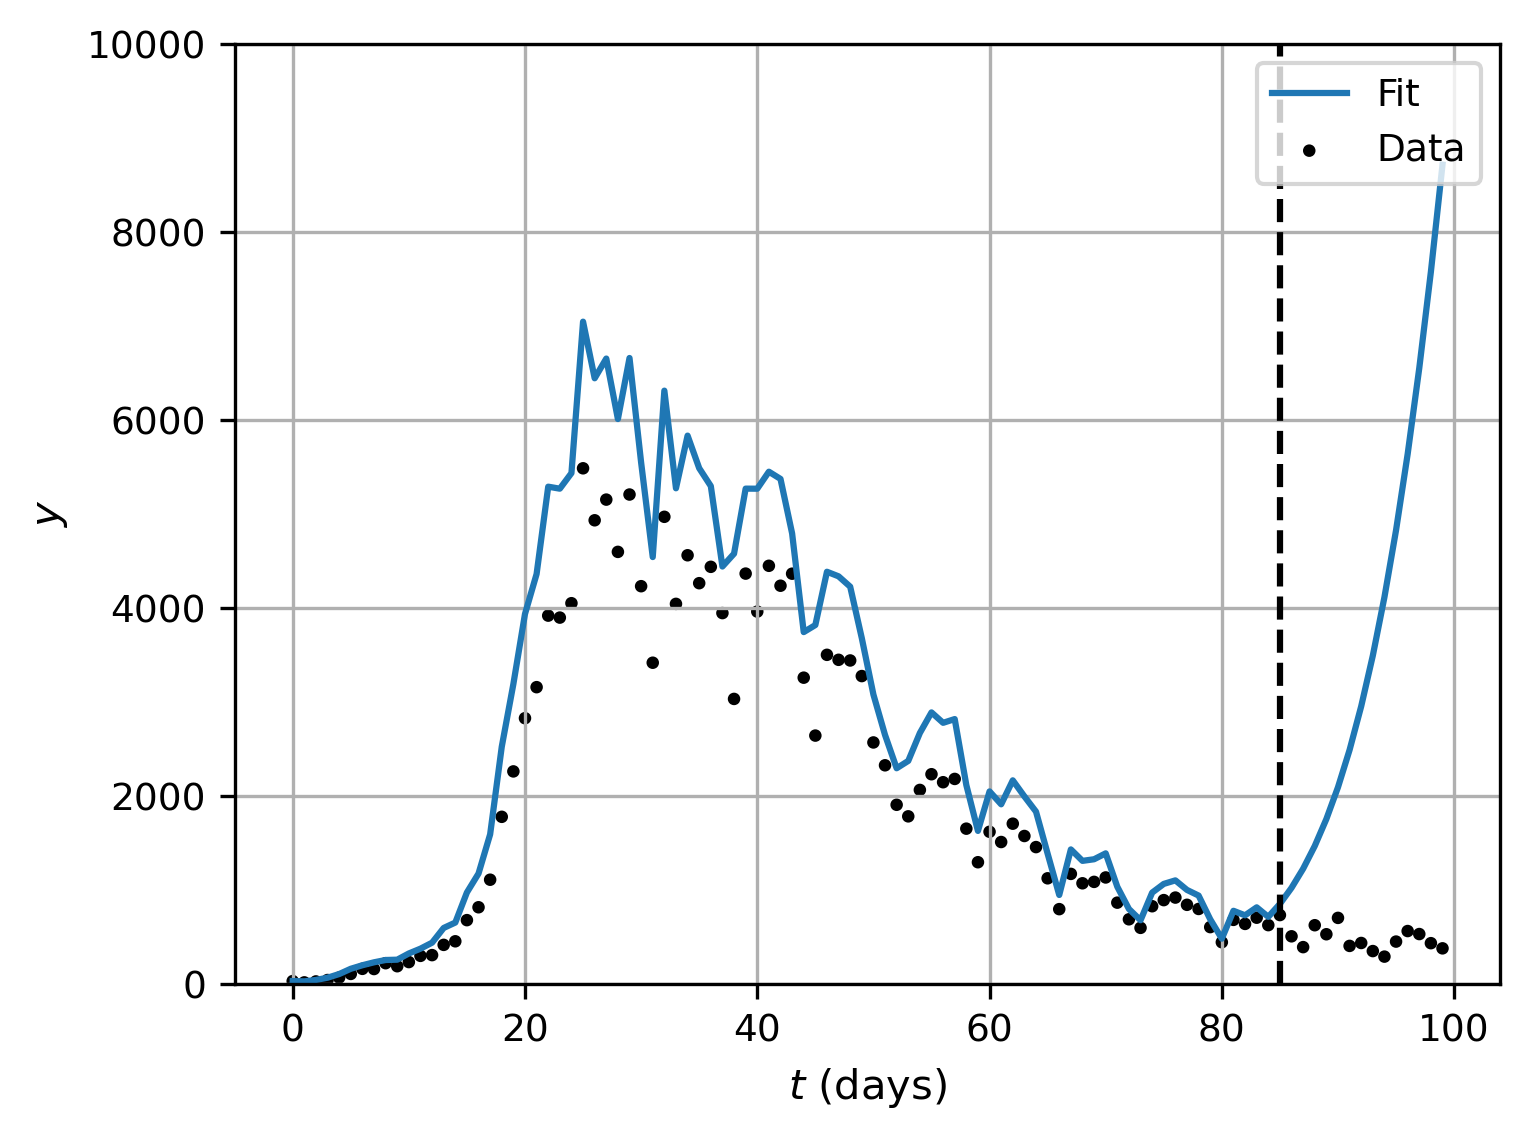

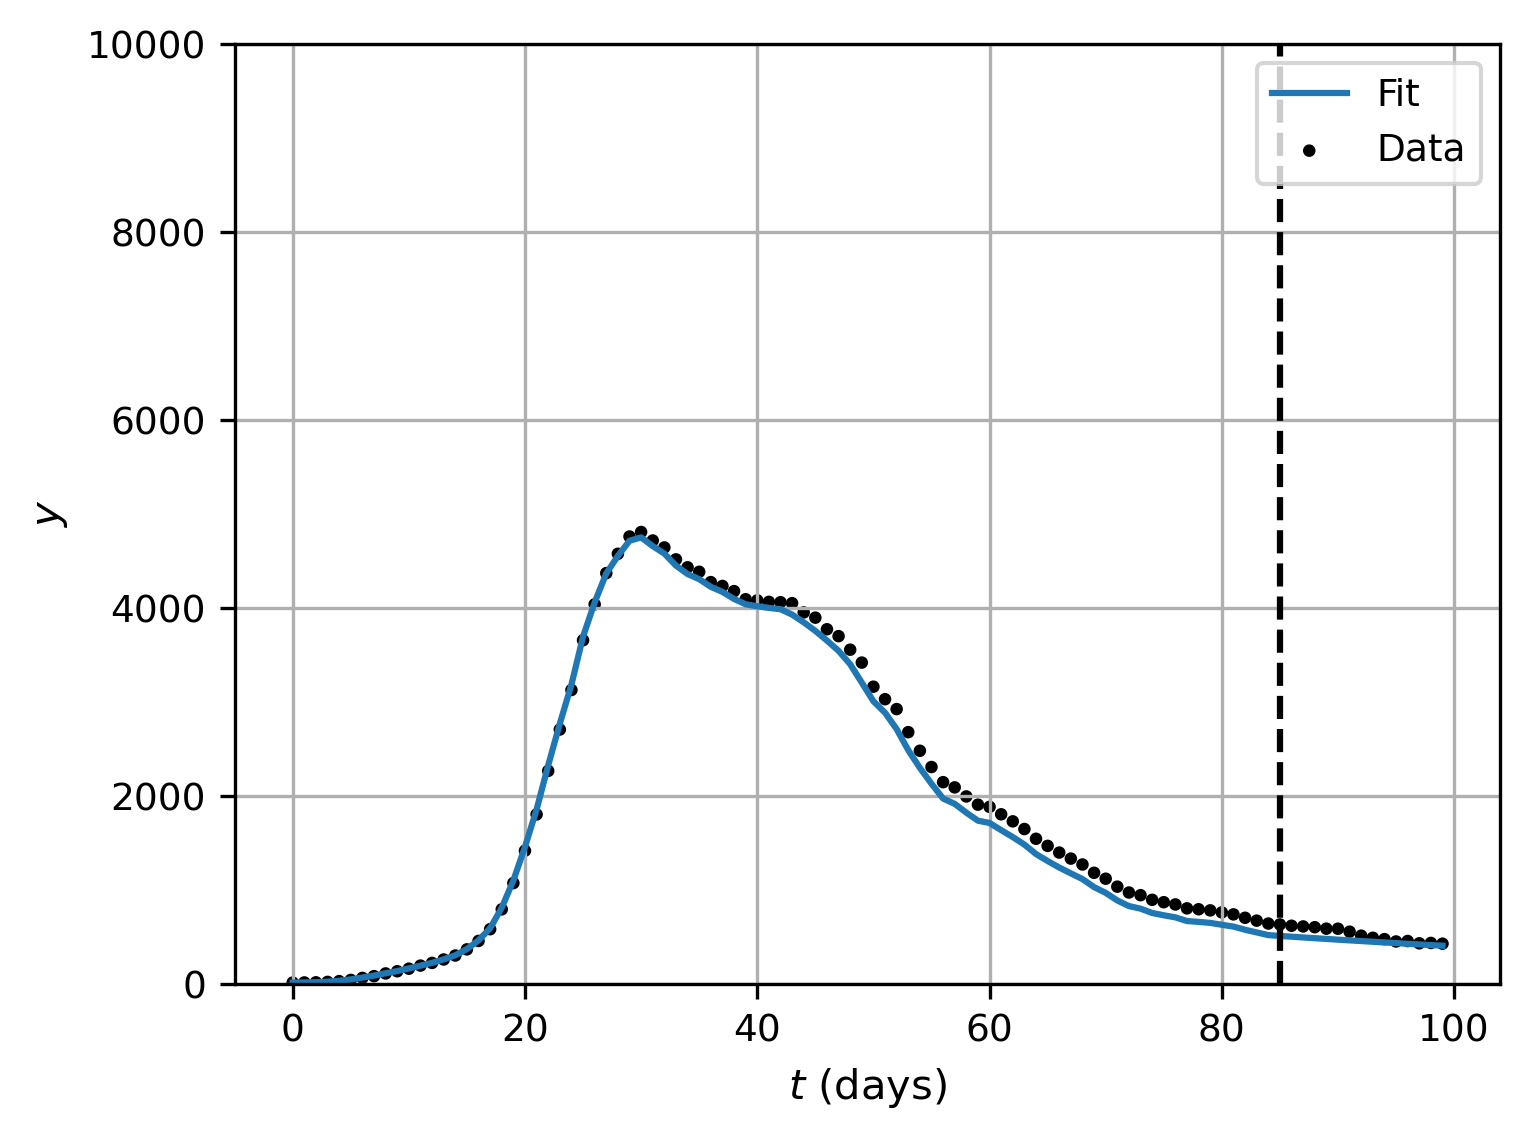

In [4]:
model = eqx.tree_deserialise_leaves("serialised_models/single_solve_cde_14_day_ahead.eqx", like=SingleSolveCDE.SingleSolveCDE(data_size=3, hidden_size=3, width_size=64, depth=3, key=jr.key(0)))
for control_until in [10, 20, 30, 40, 50, 60, 70, 80, 86]:
    plot_predictions(model, raw_ys, control_until=control_until, file_name=f"plots/single_solve_cde_predictions_raw_ys_control_{control_until}")
    plot_predictions(model, averaged_ys, control_until=control_until, file_name=f"plots/single_solve_cde_predictions_averaged_ys_control_{control_until}")


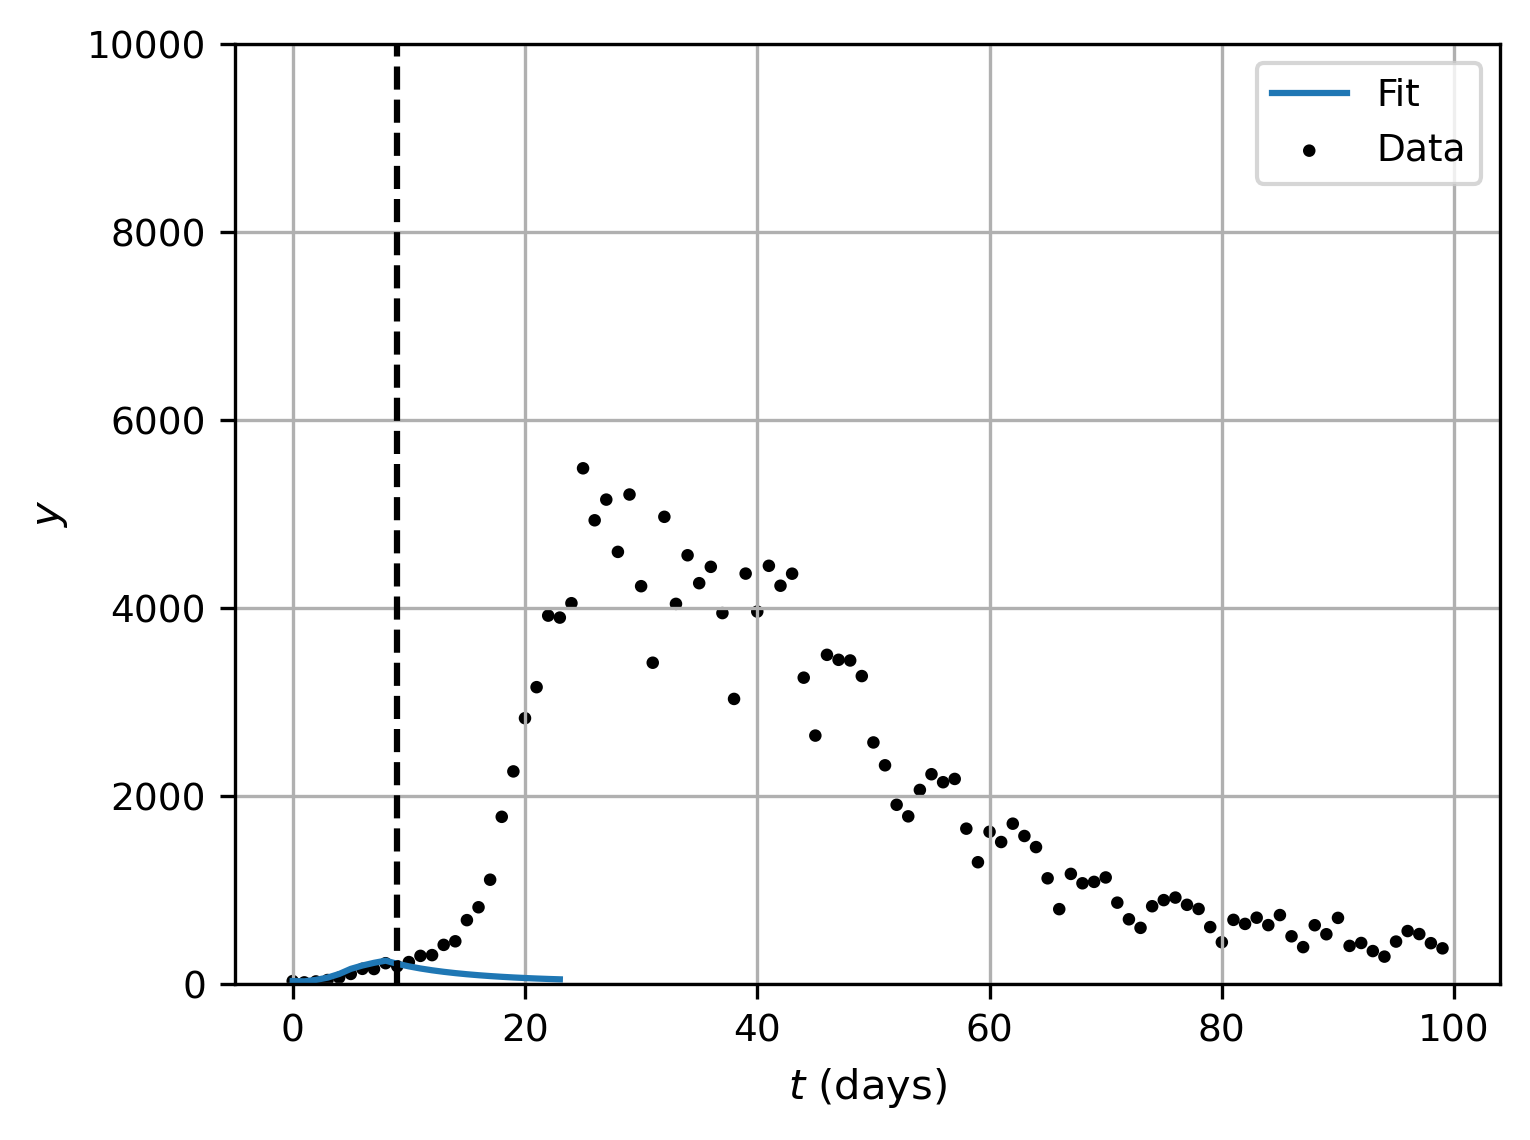

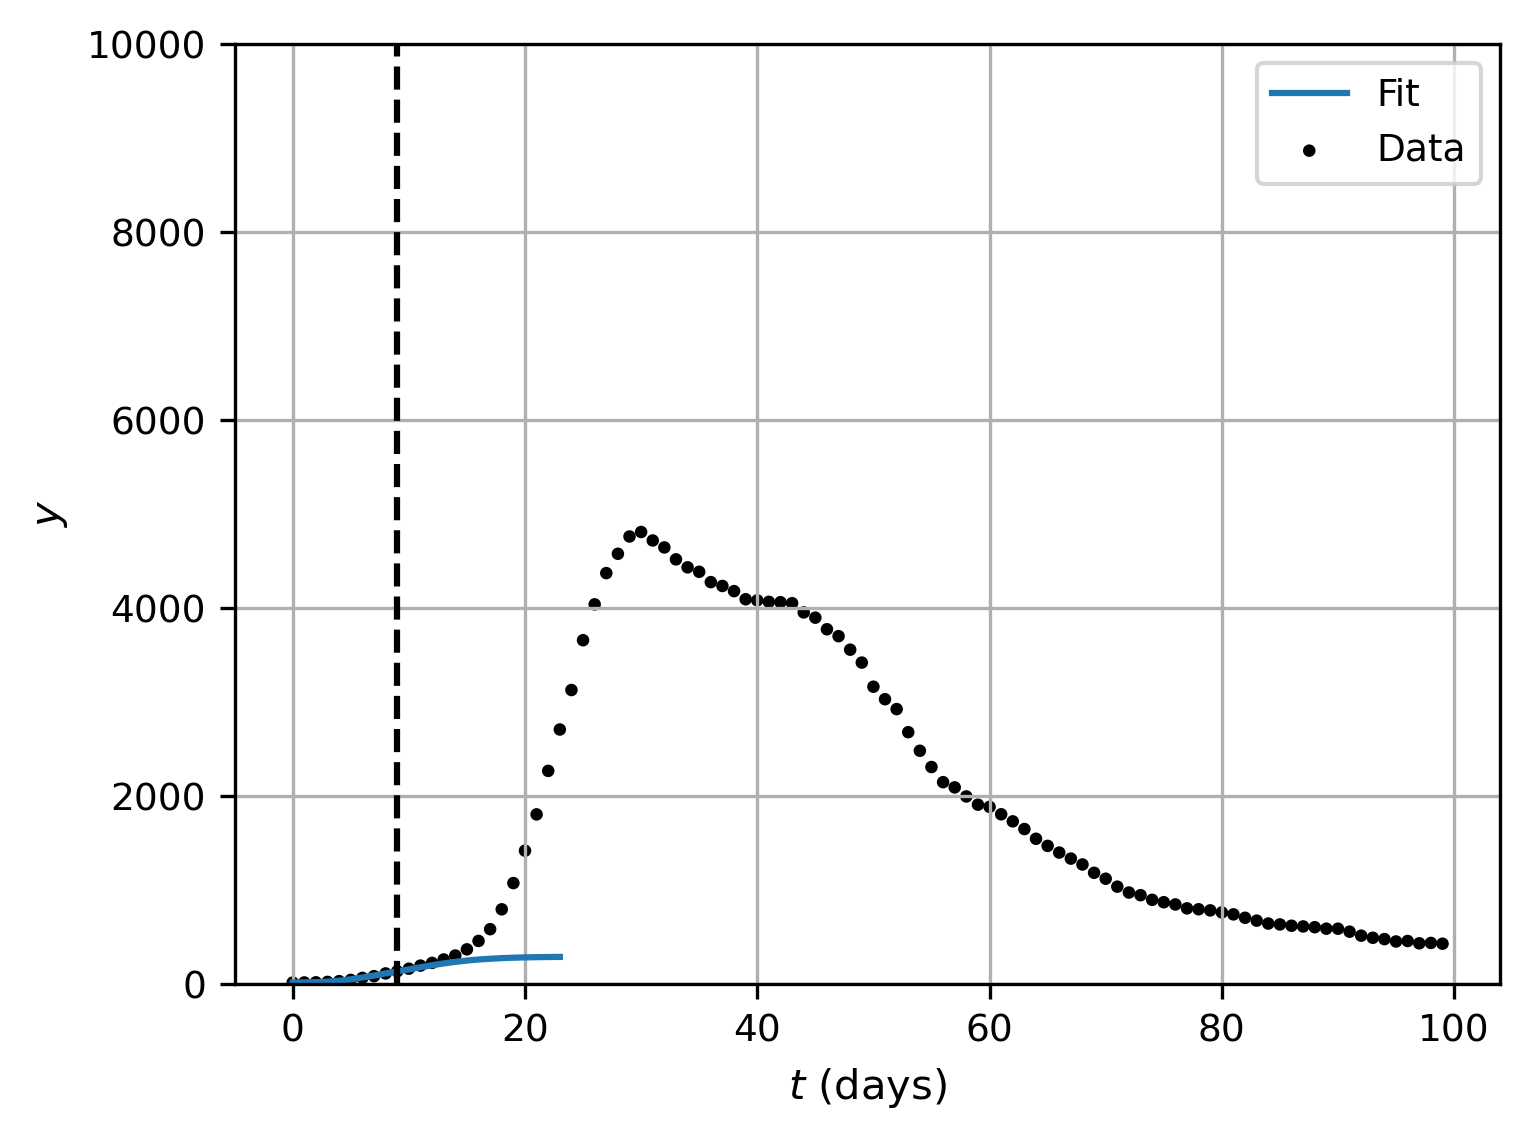

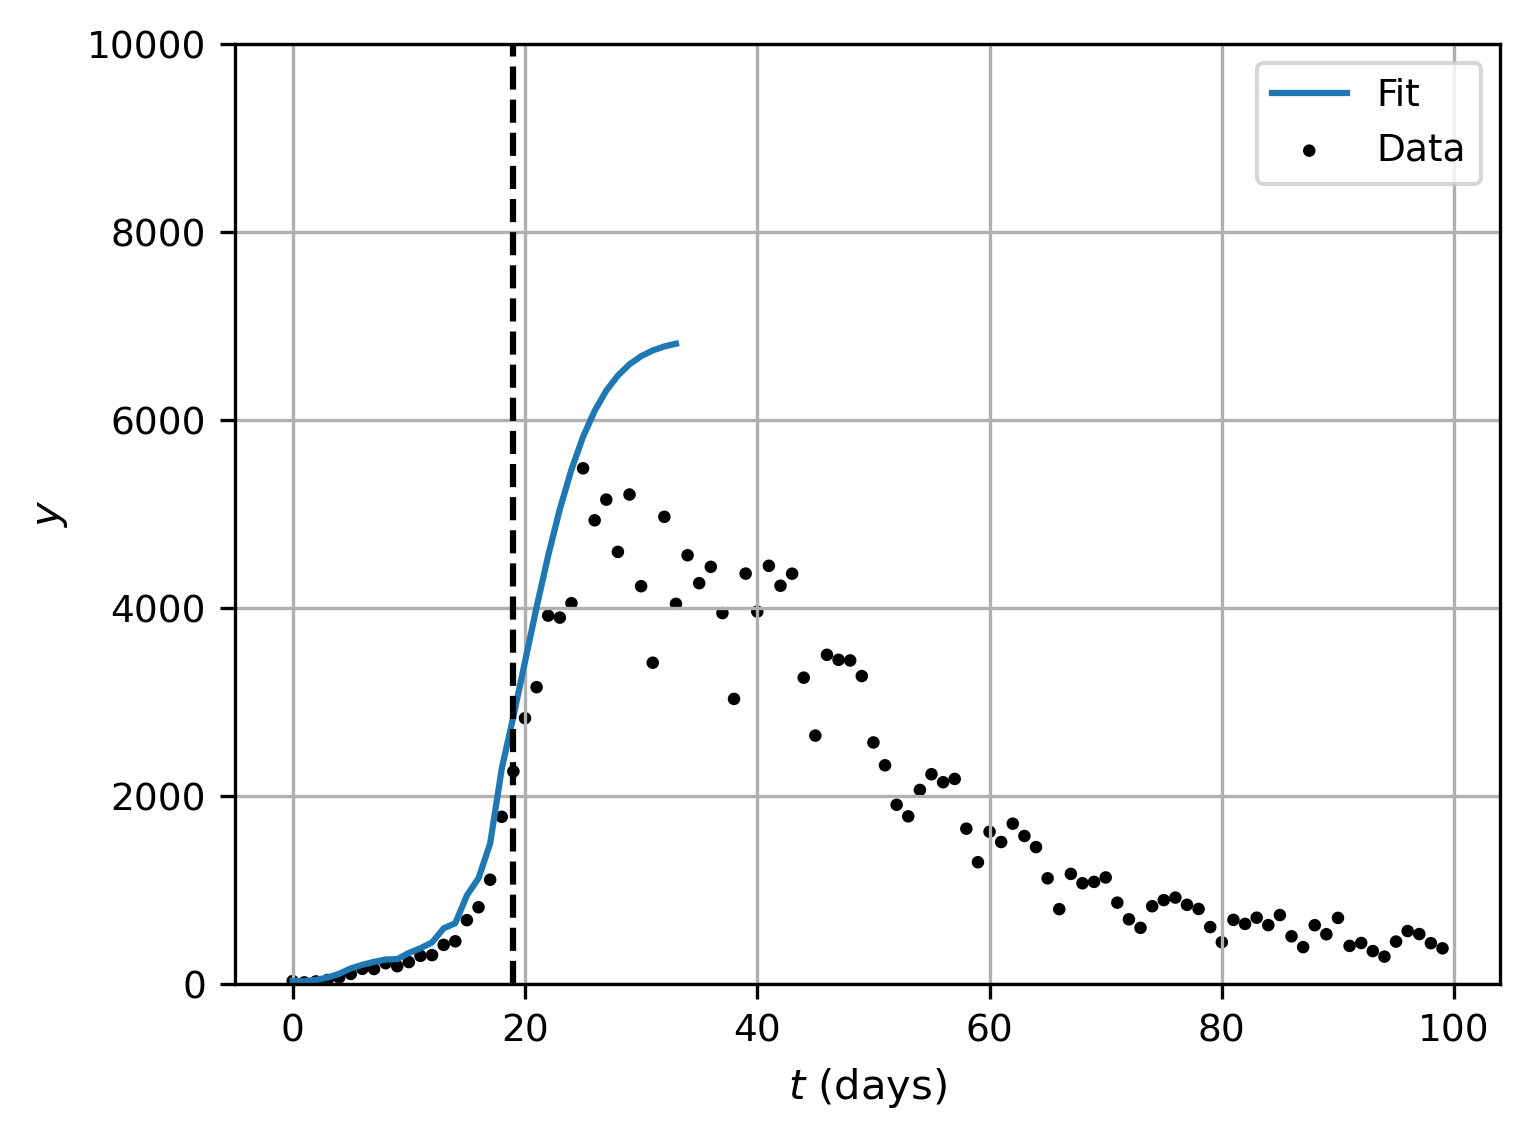

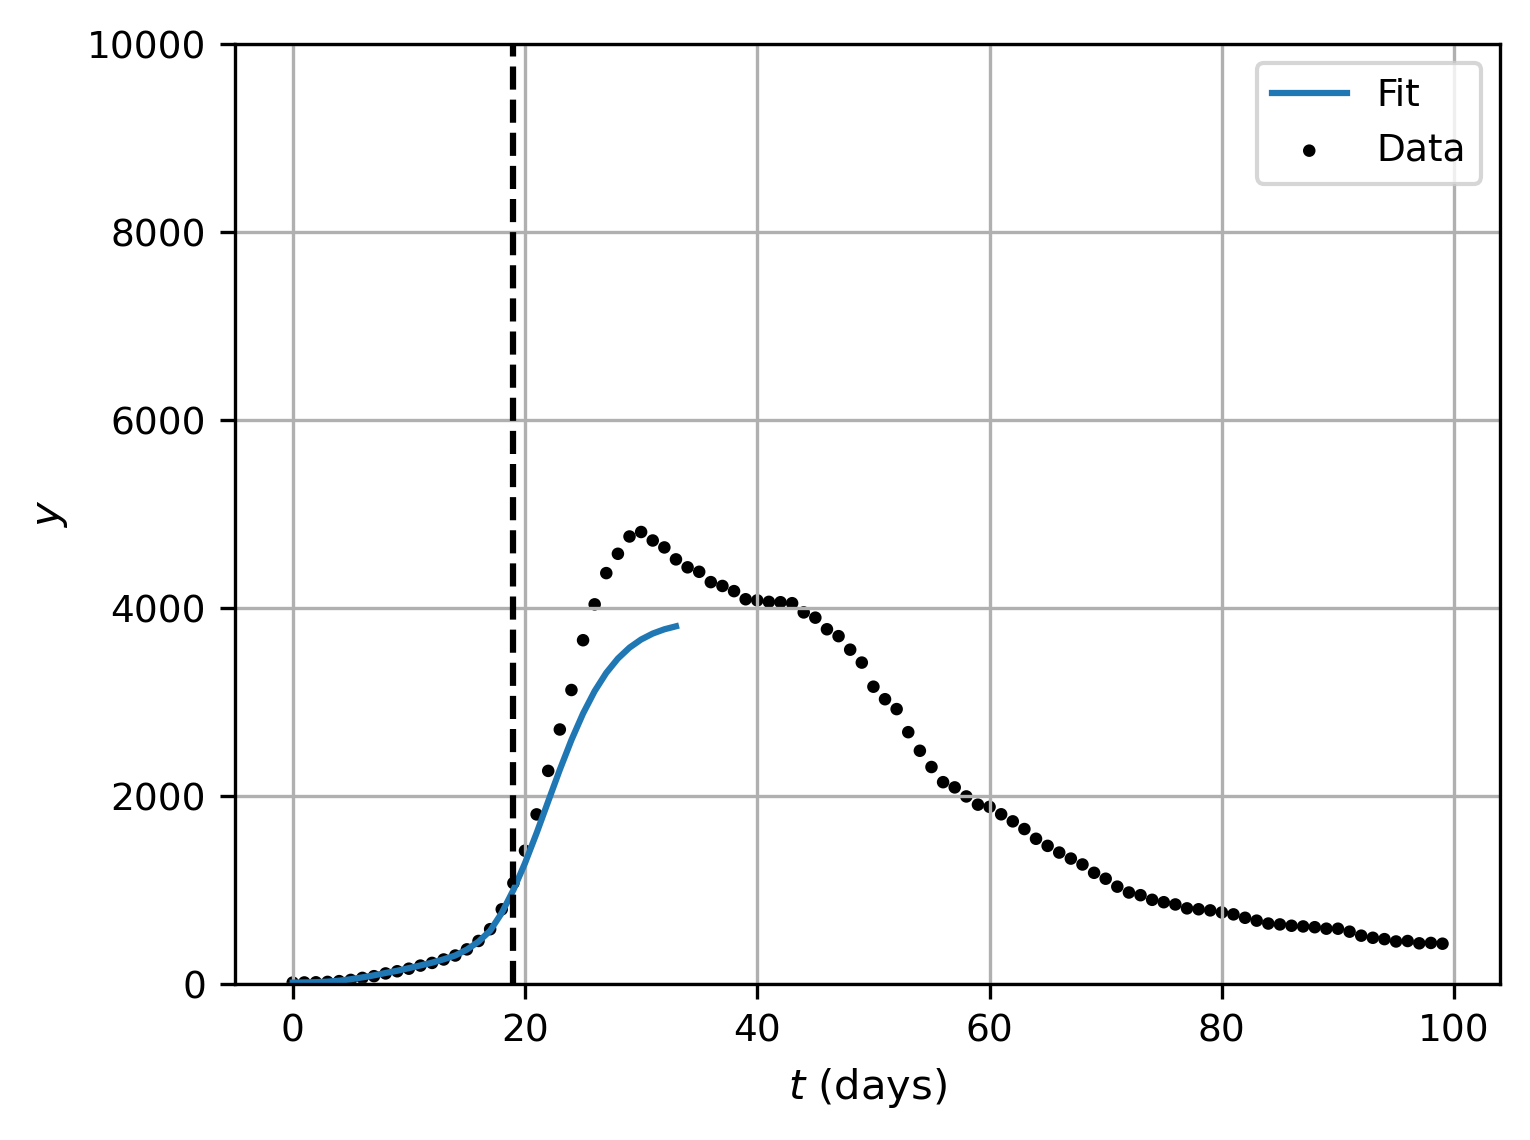

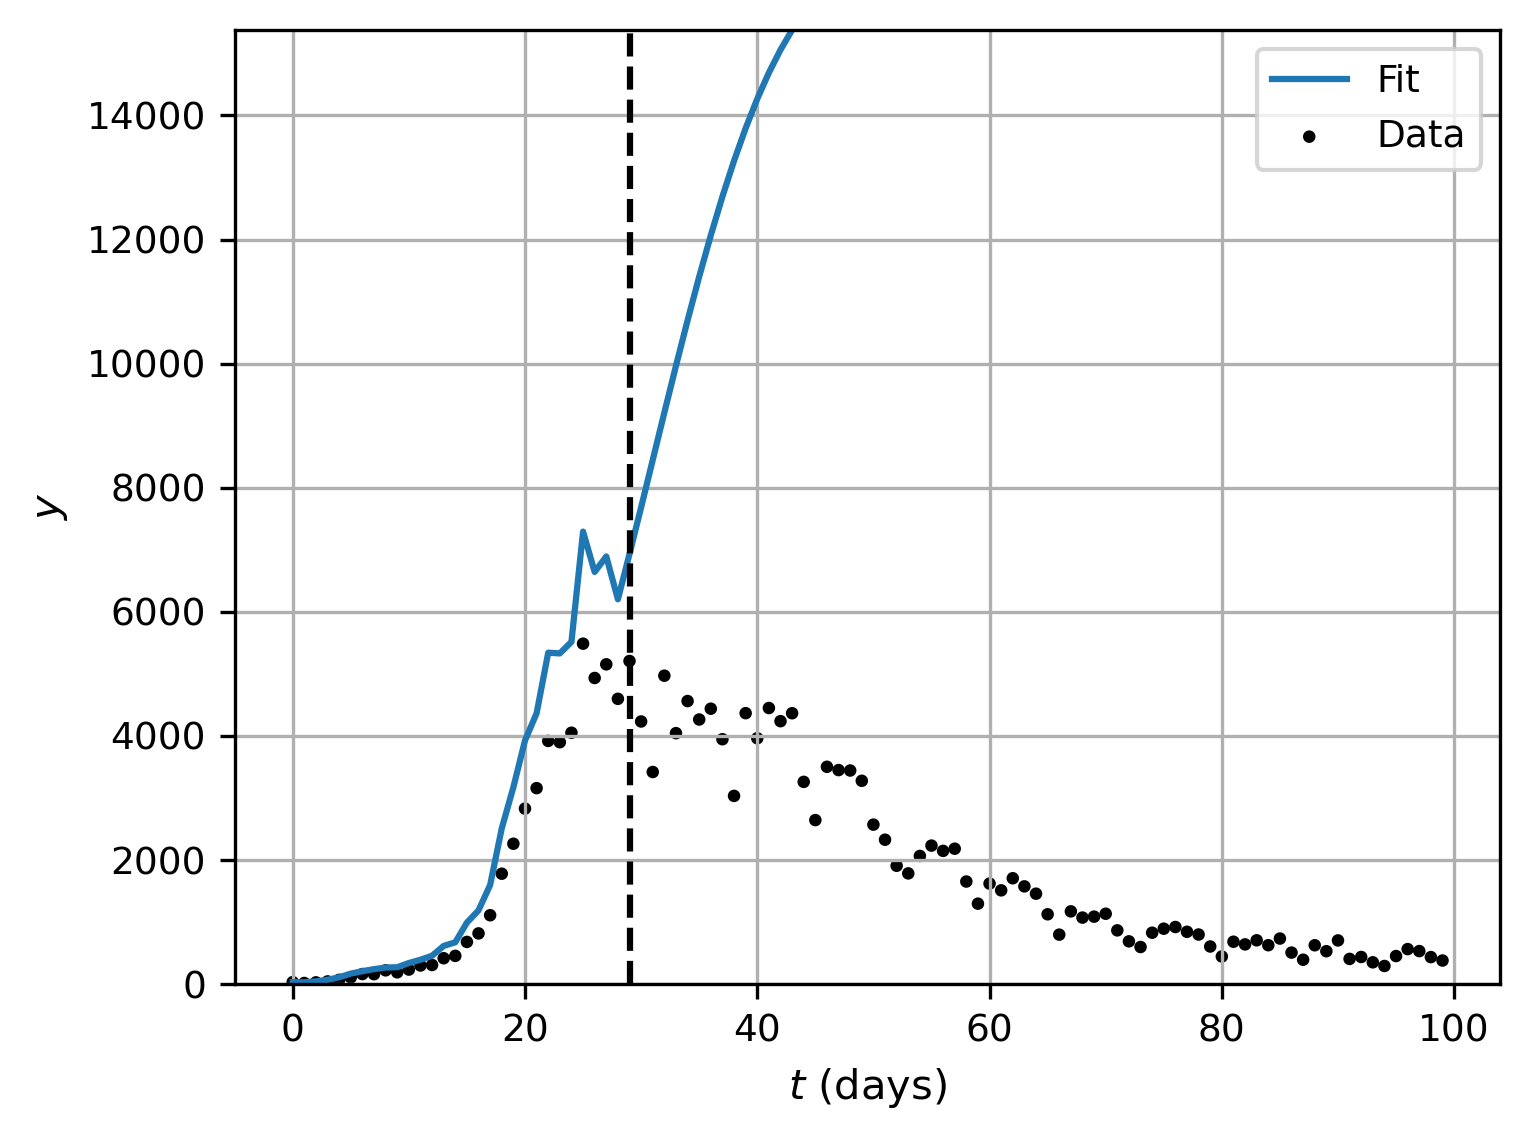

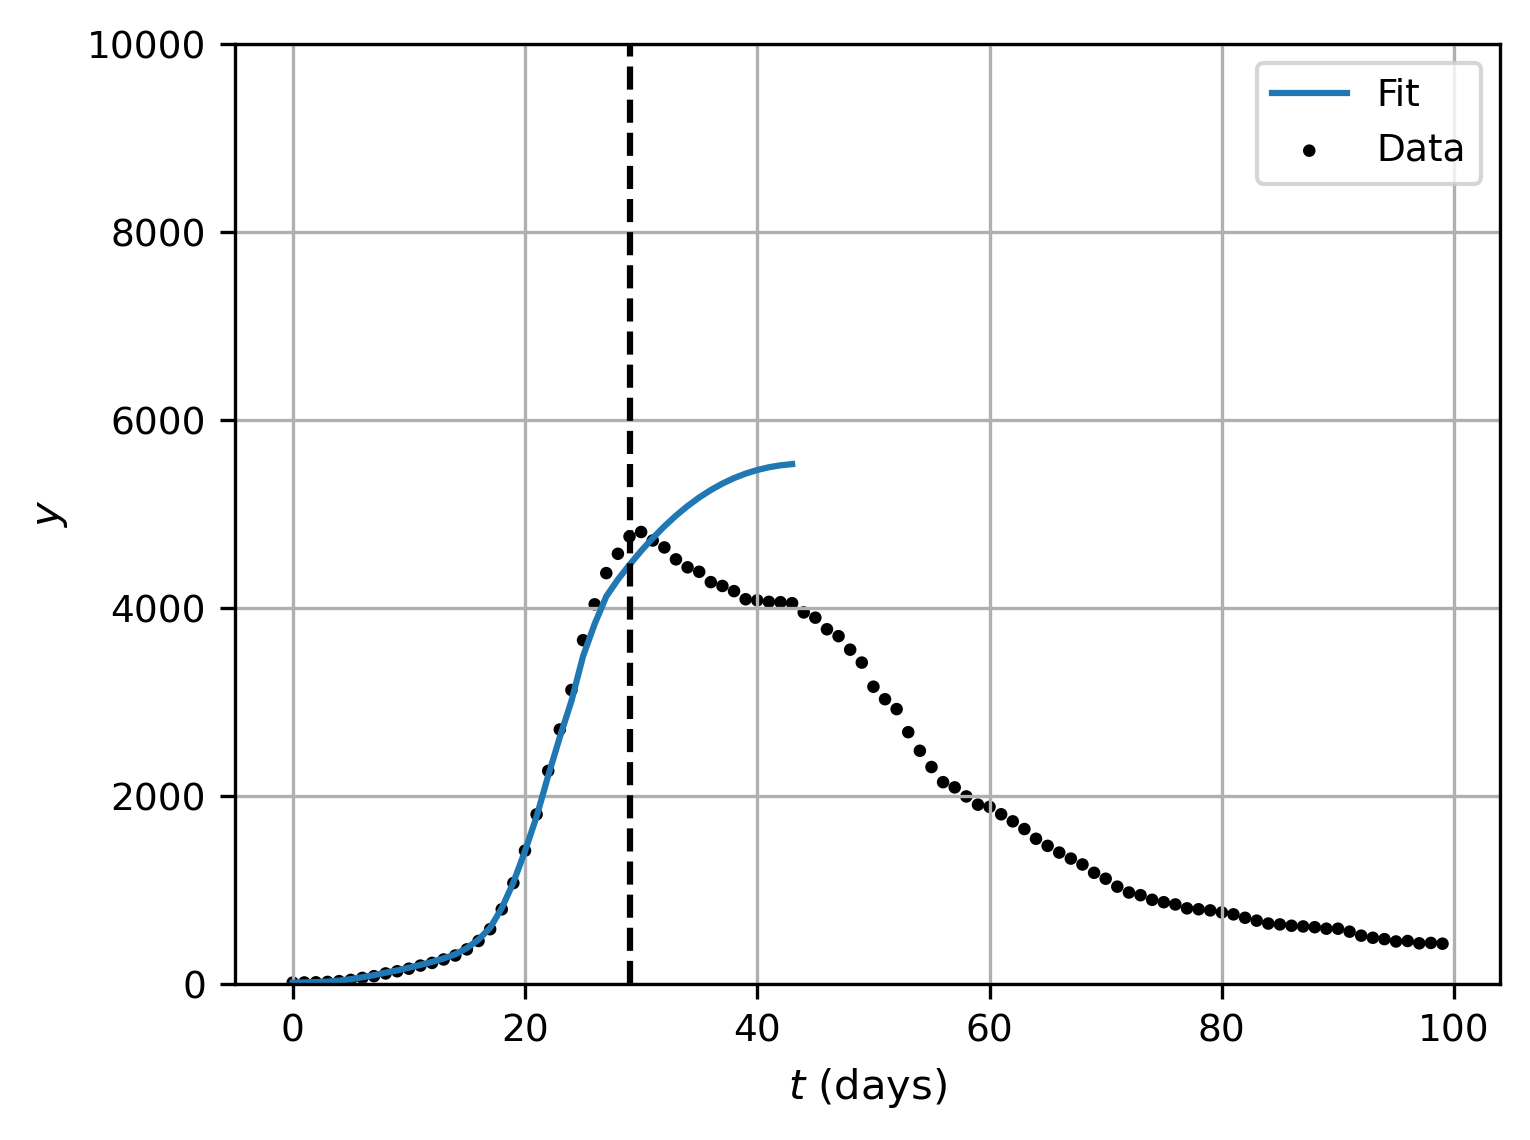

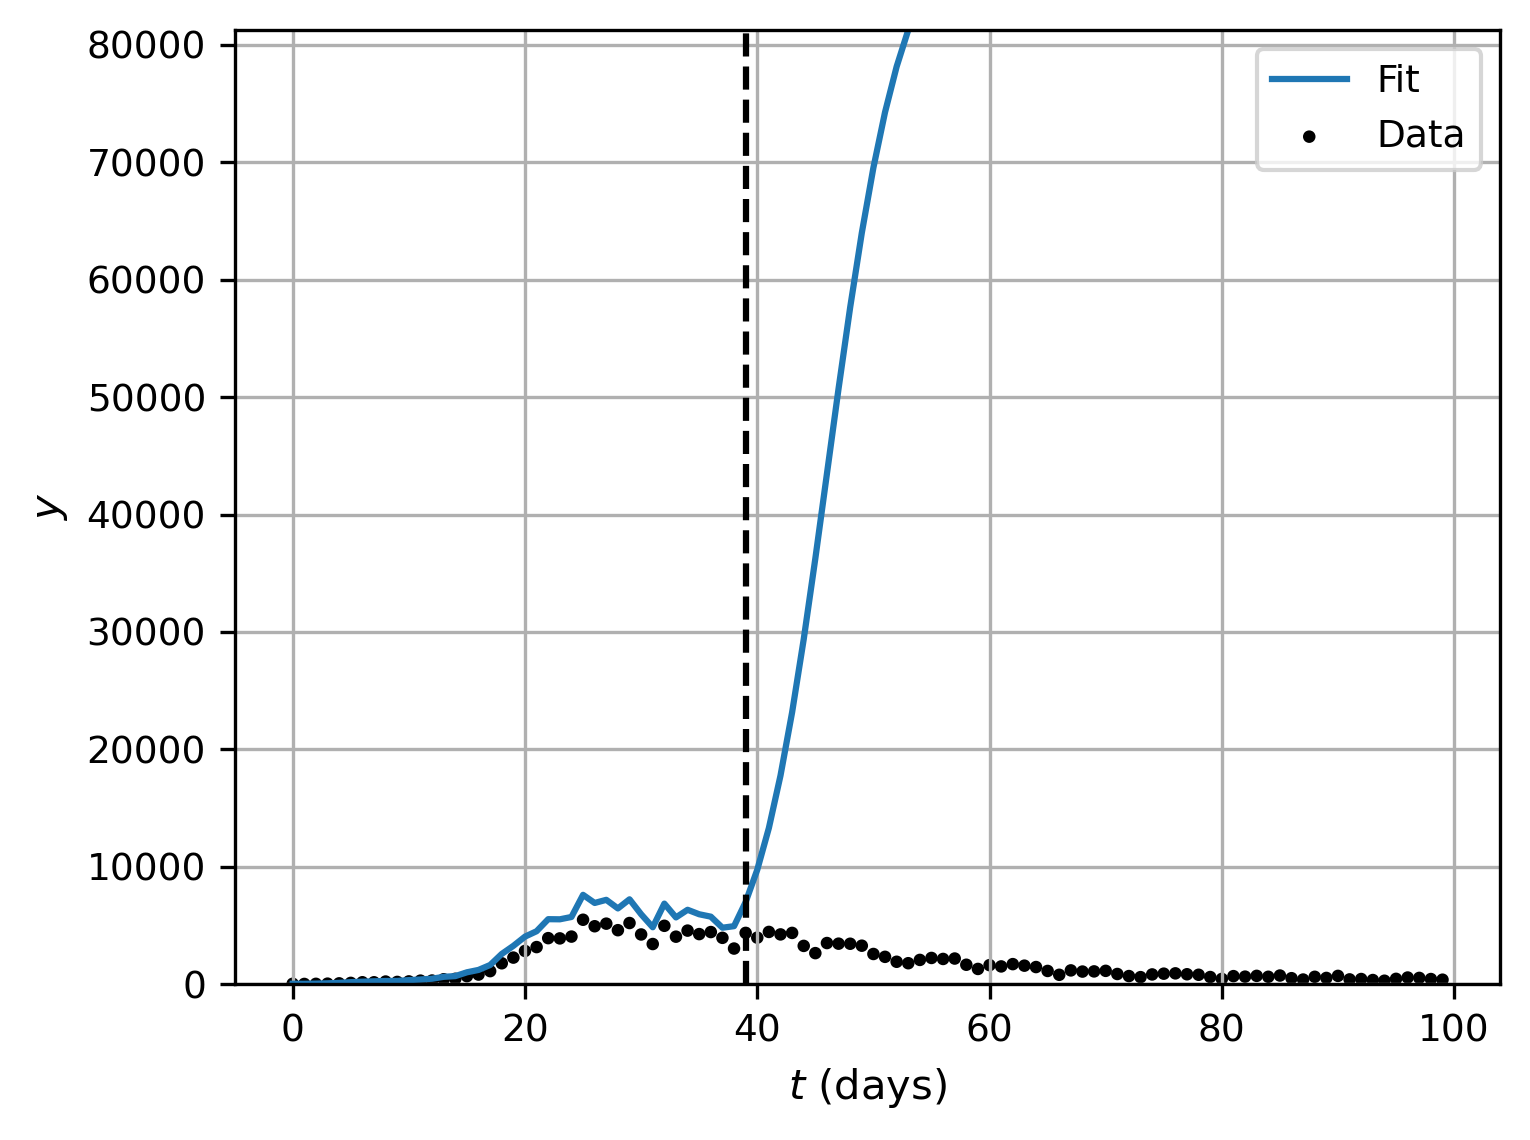

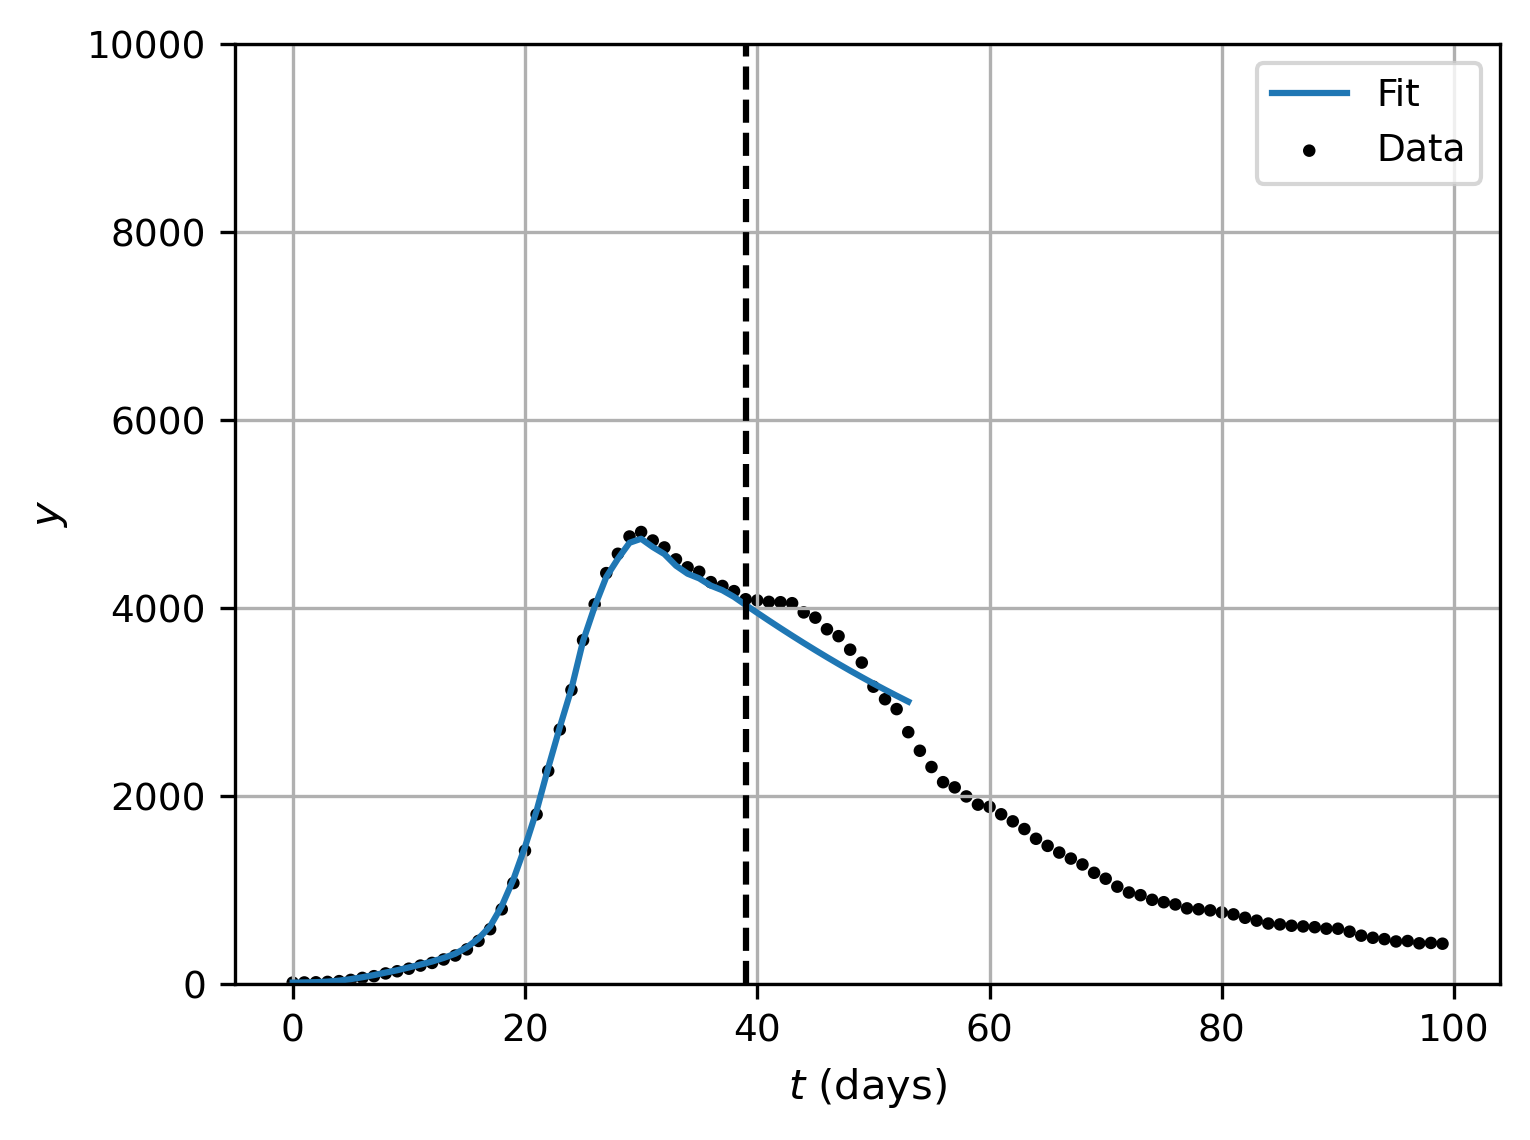

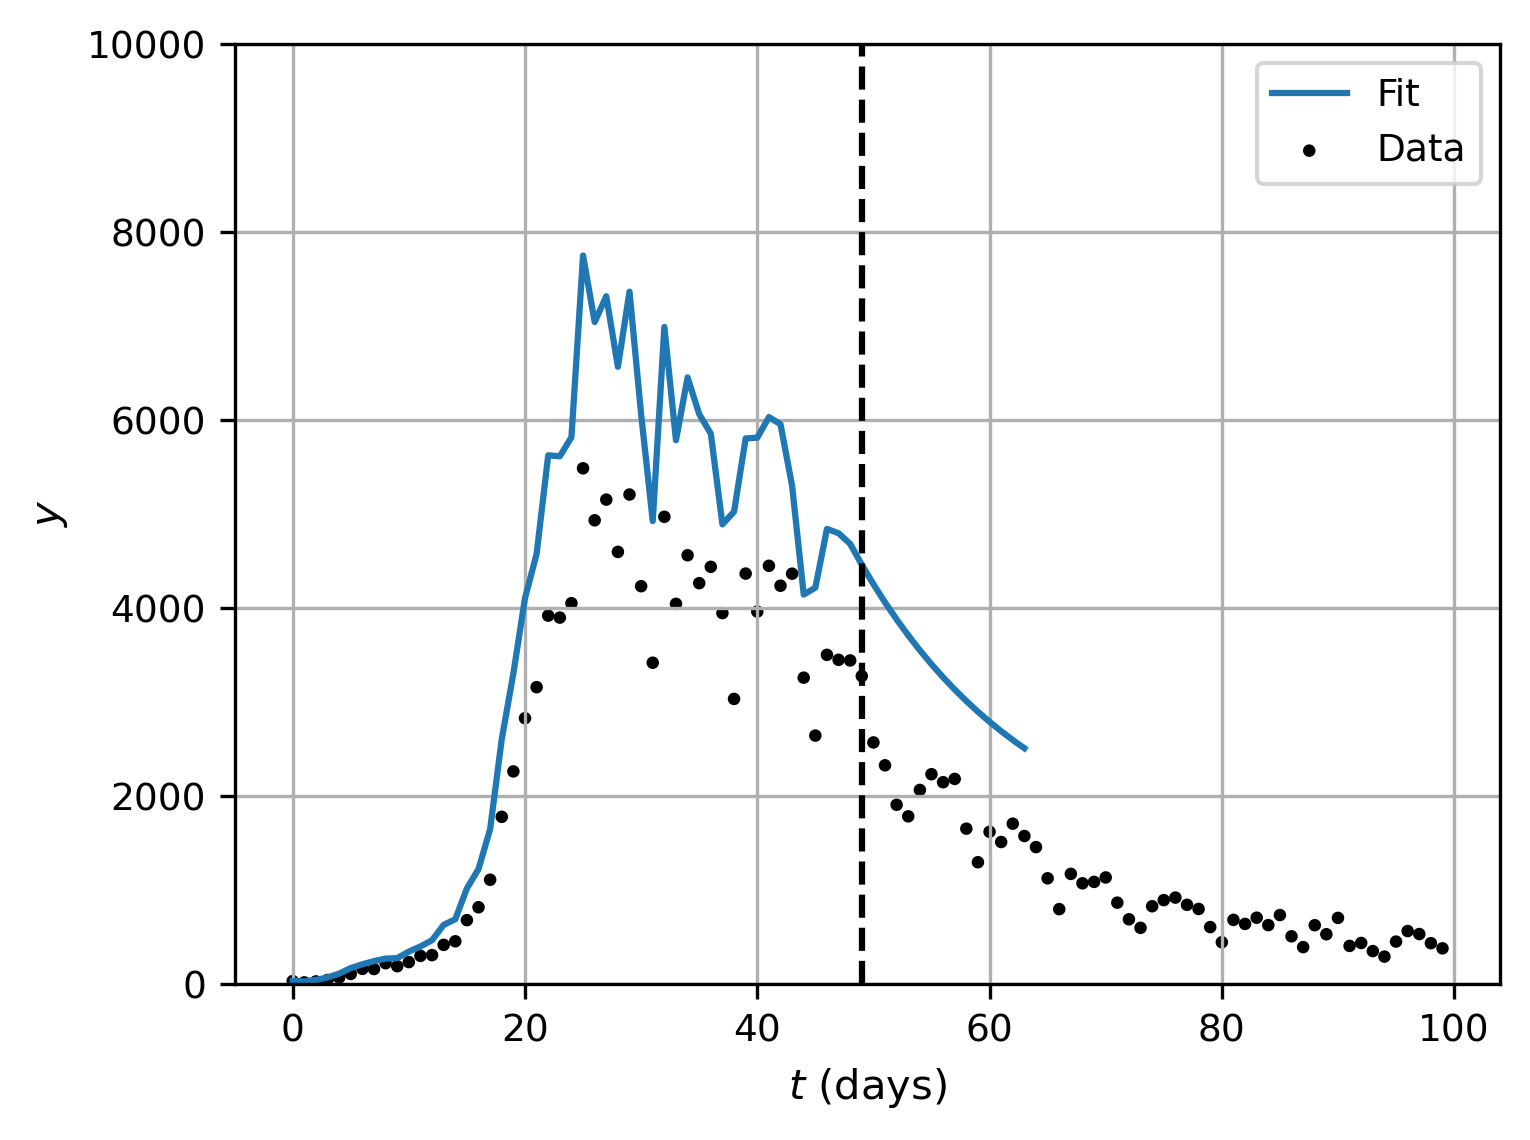

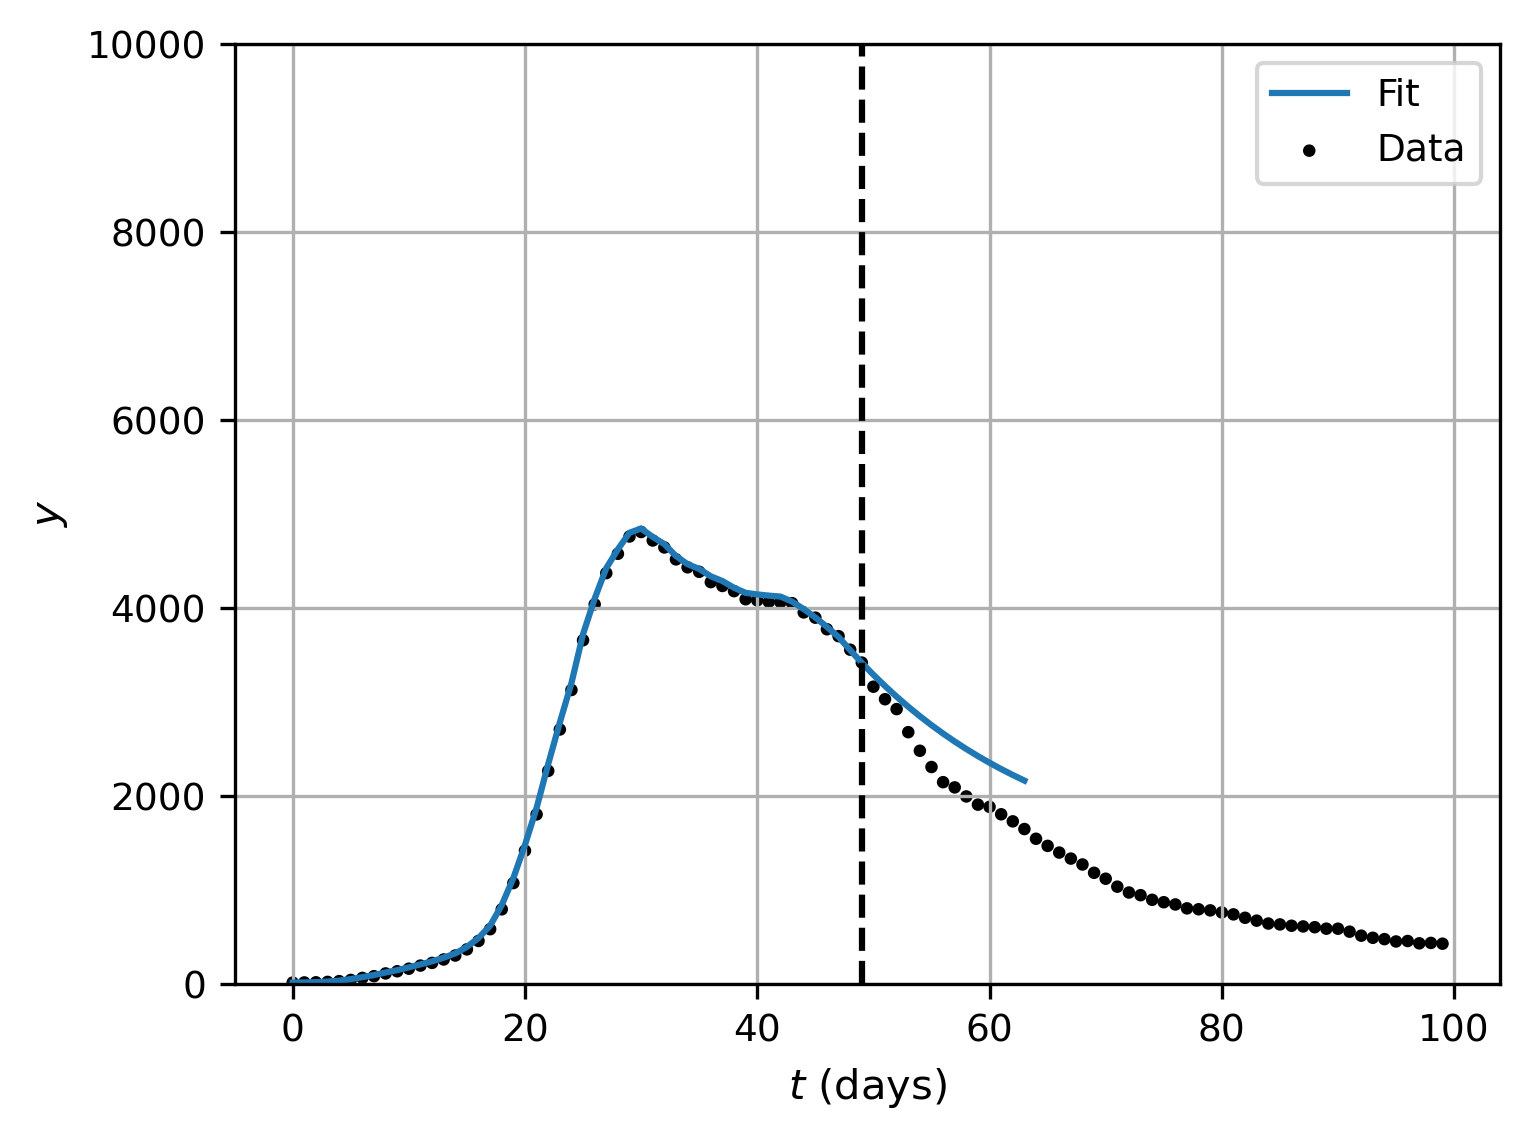

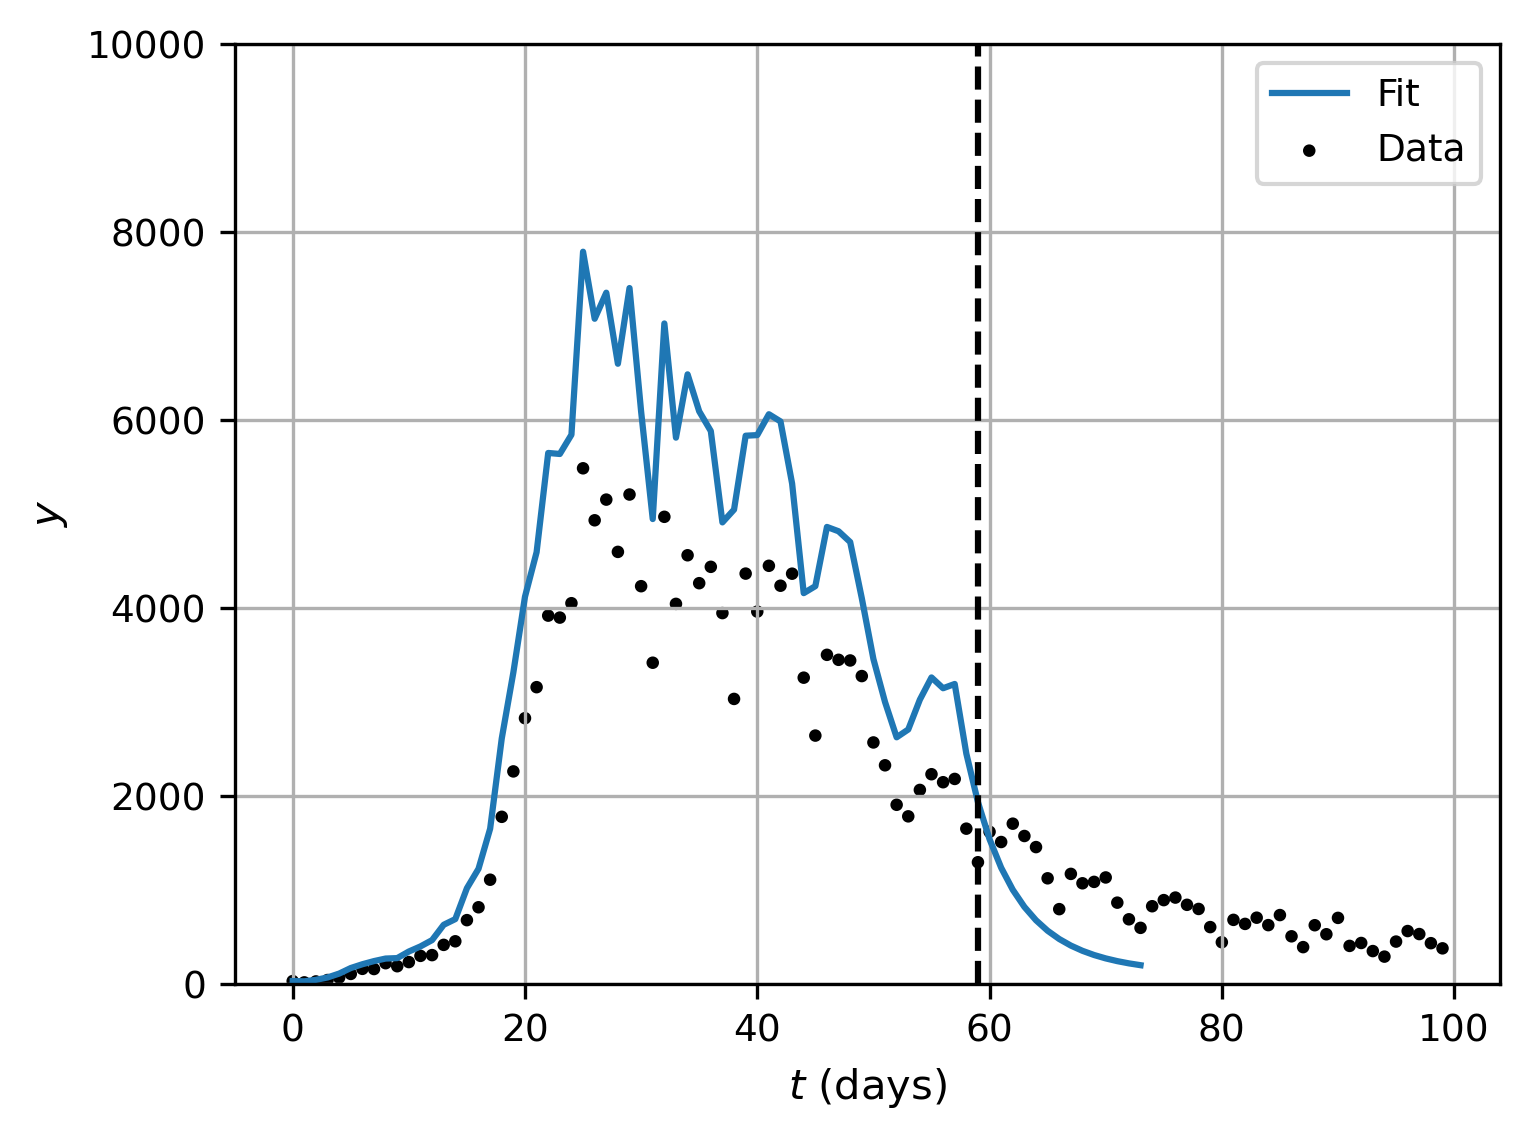

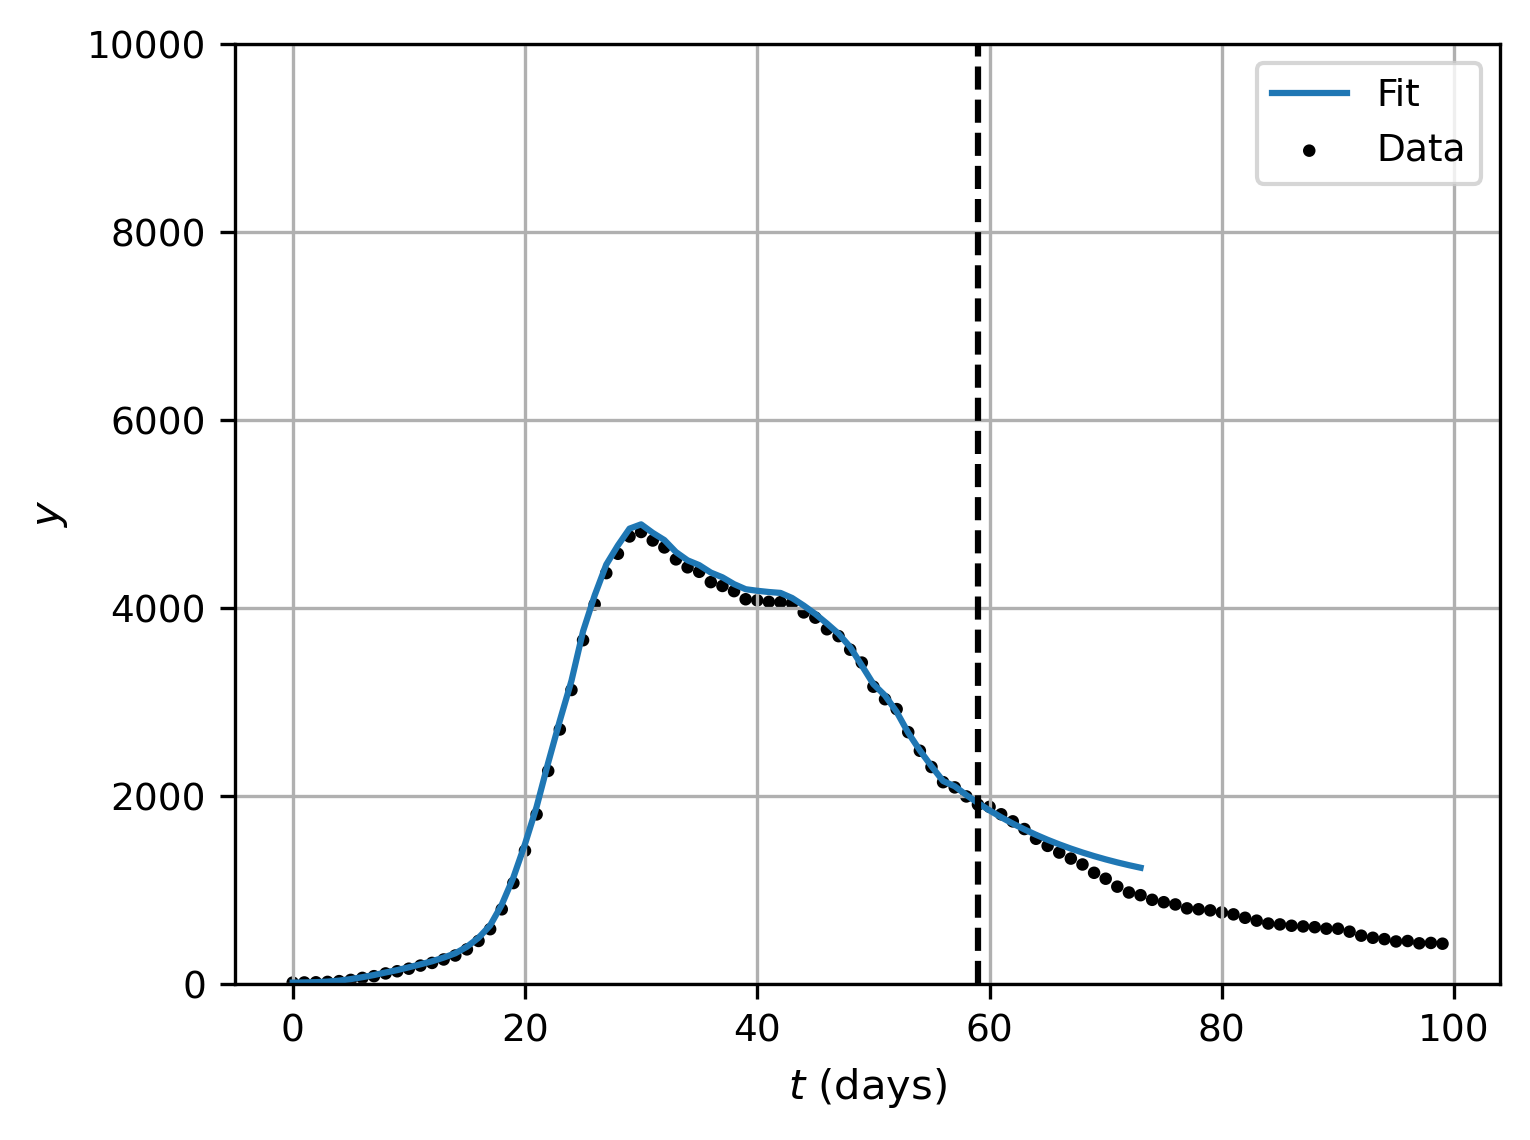

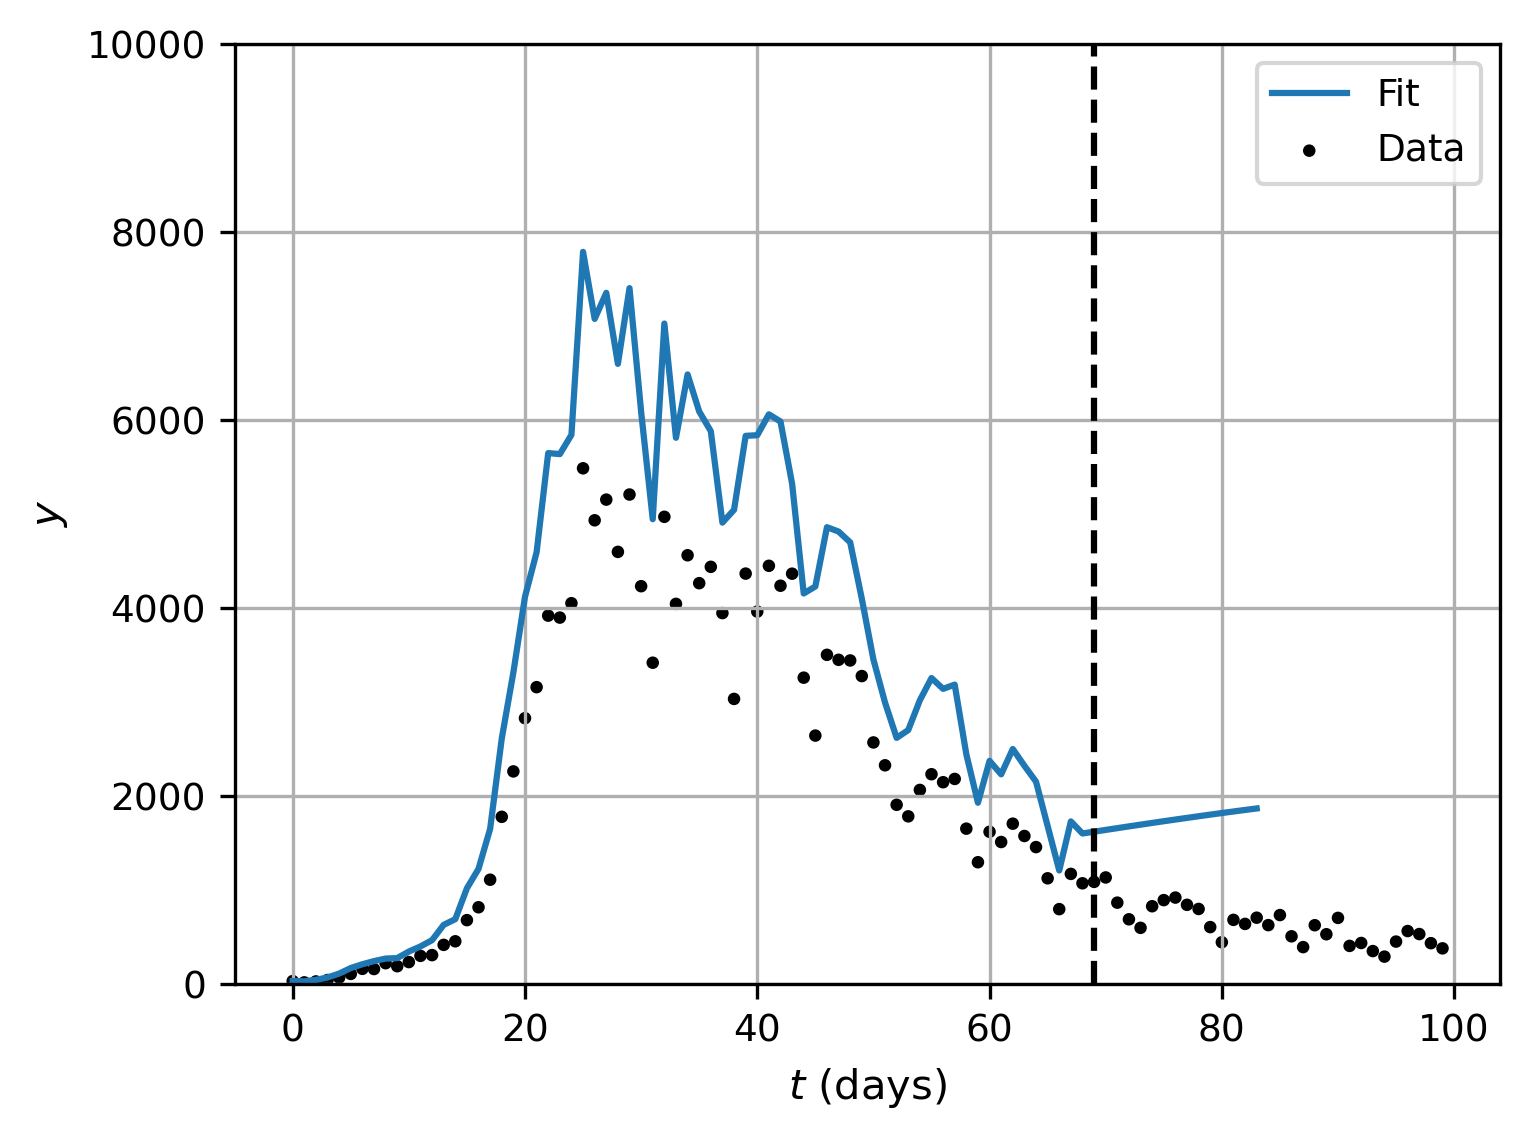

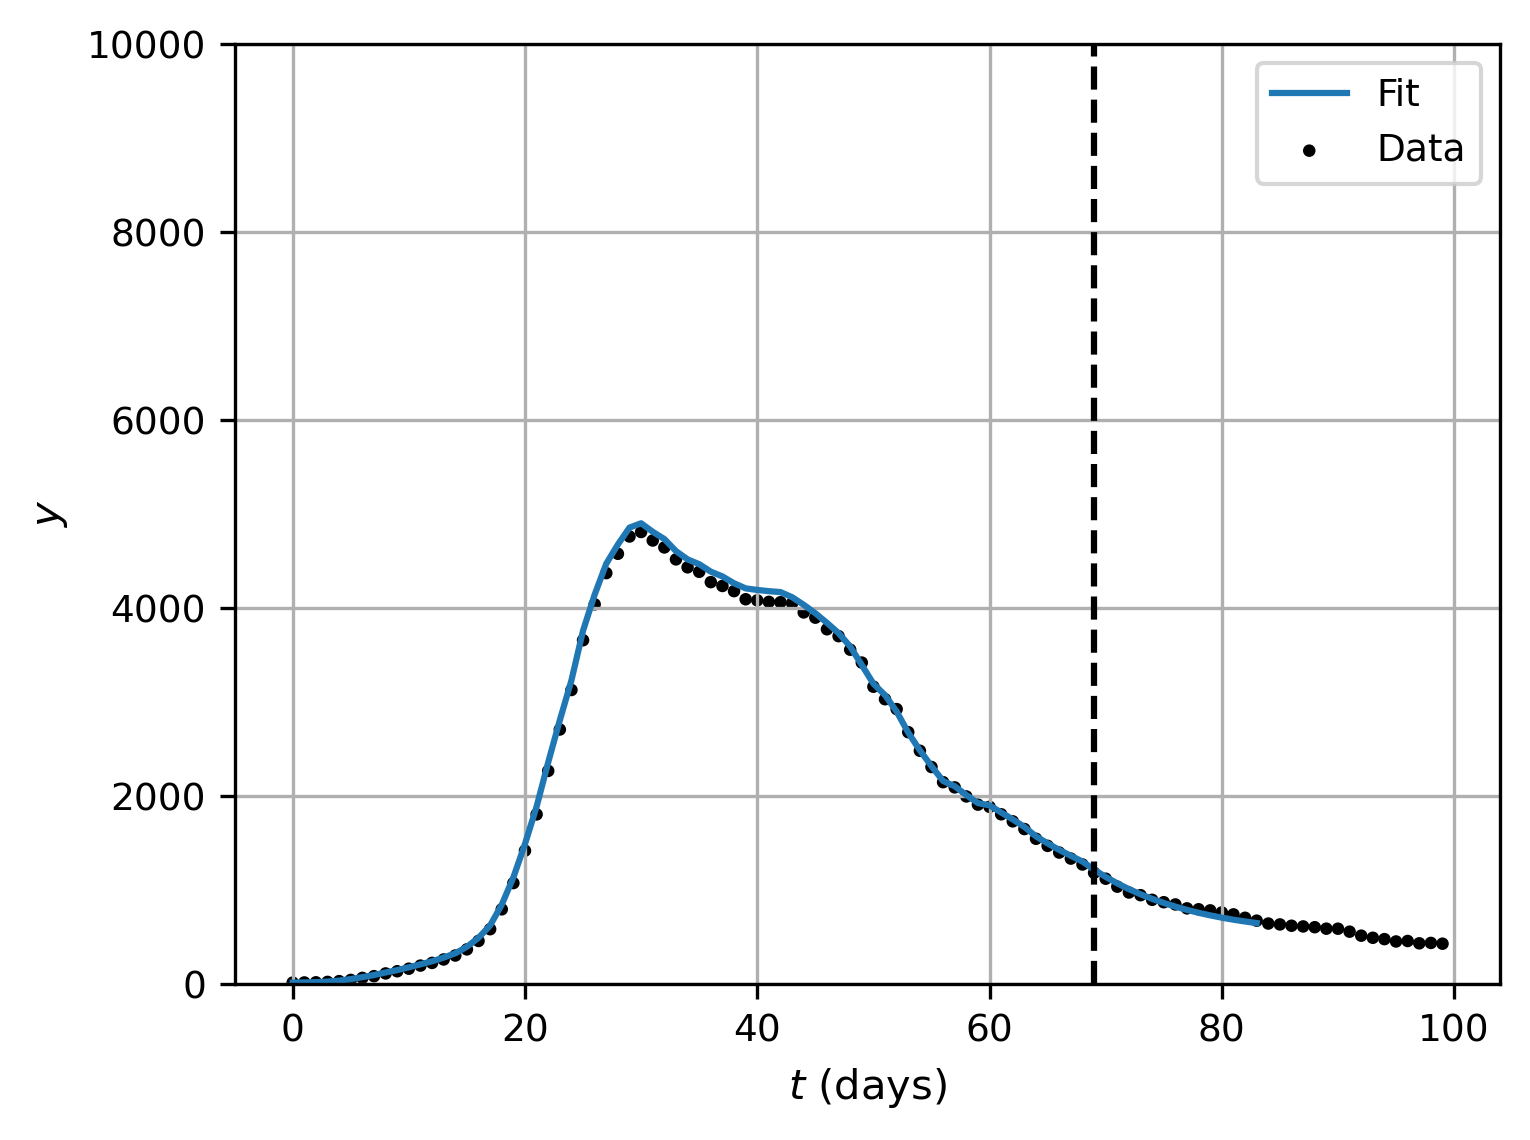

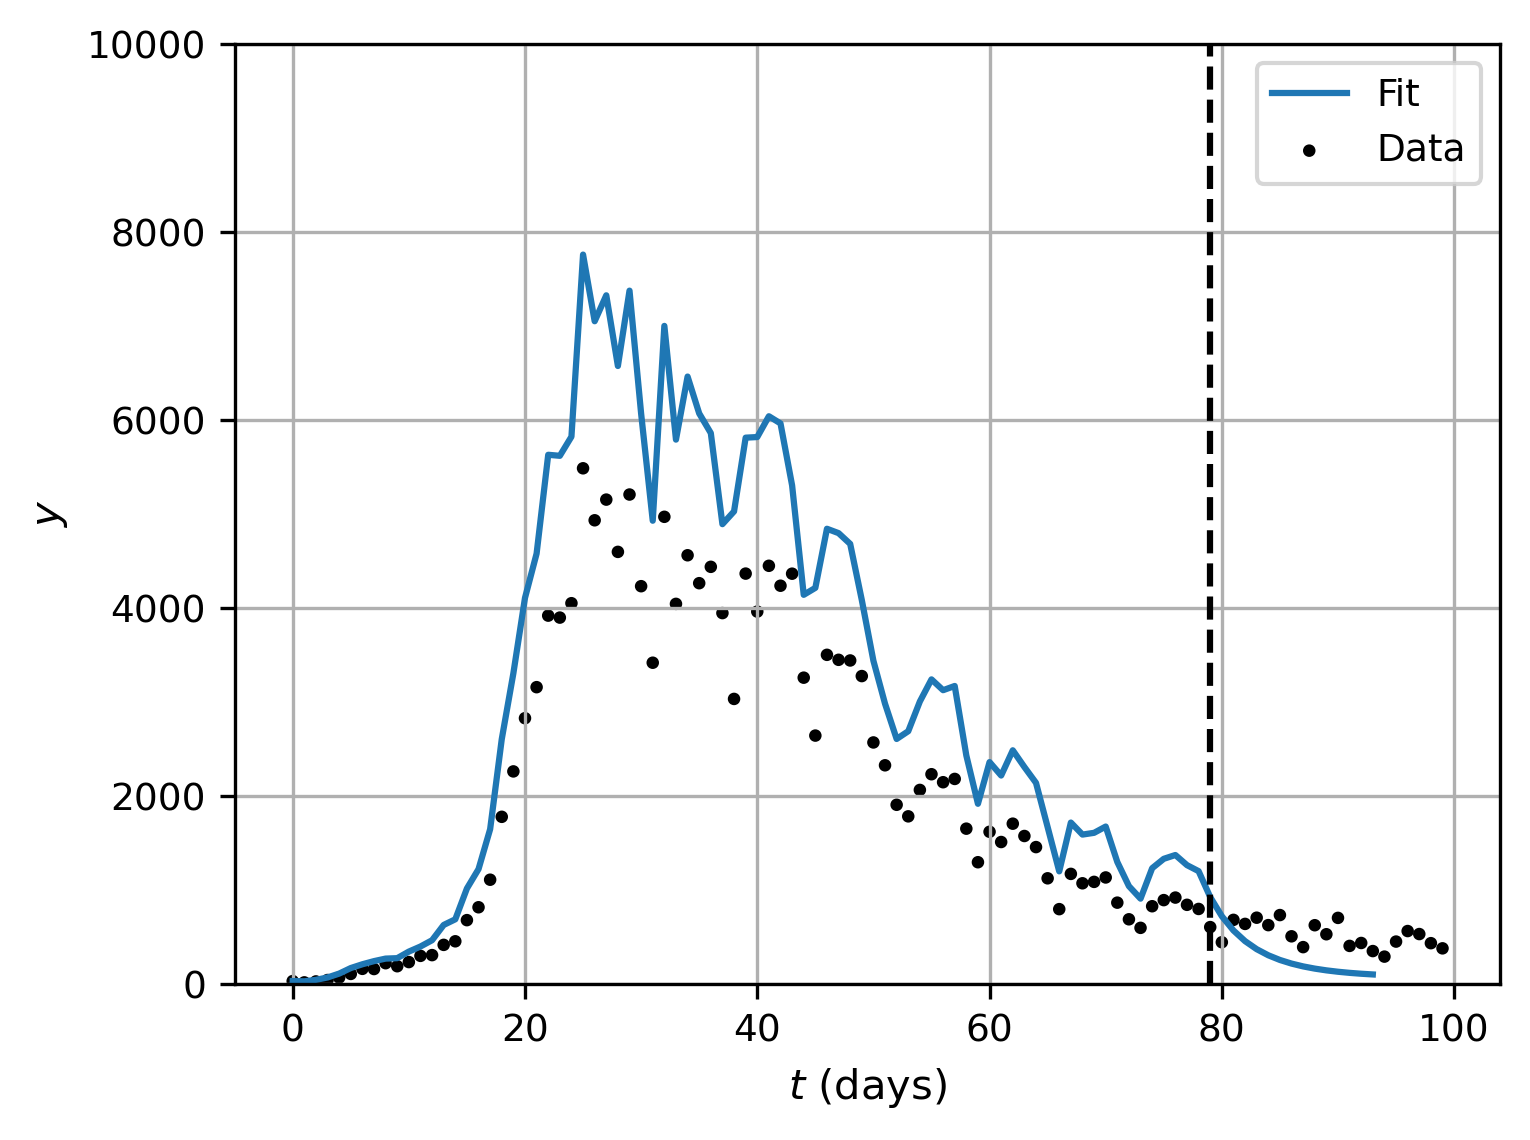

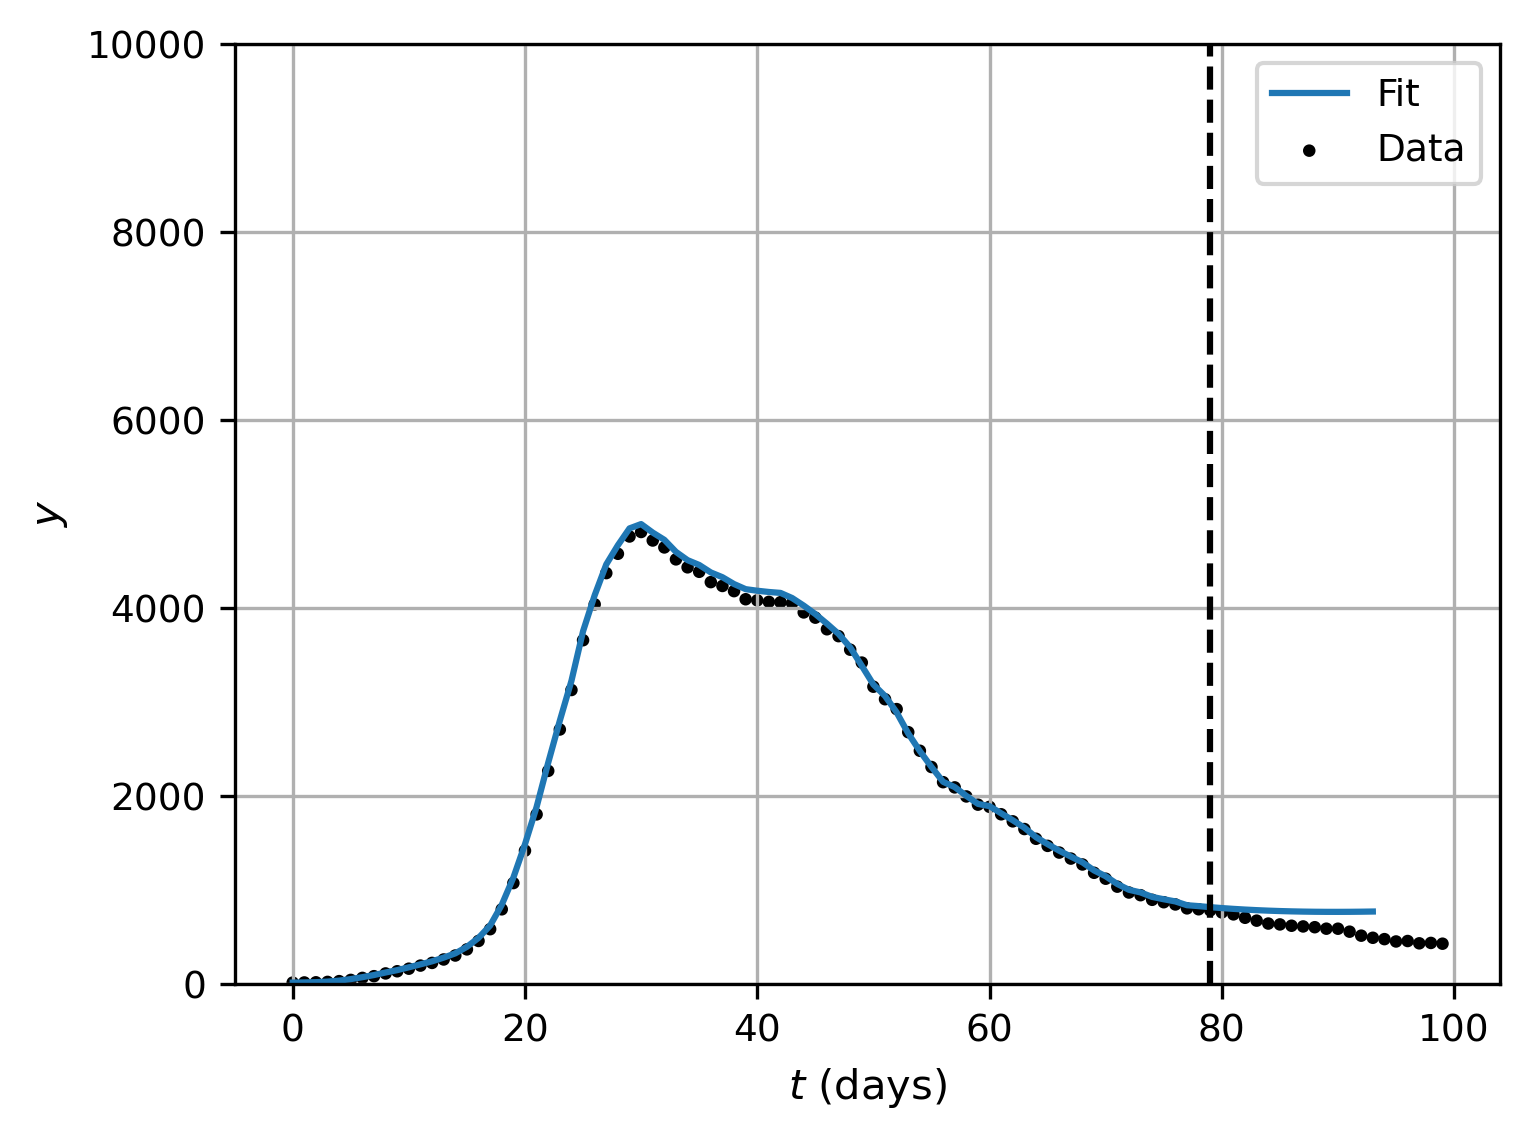

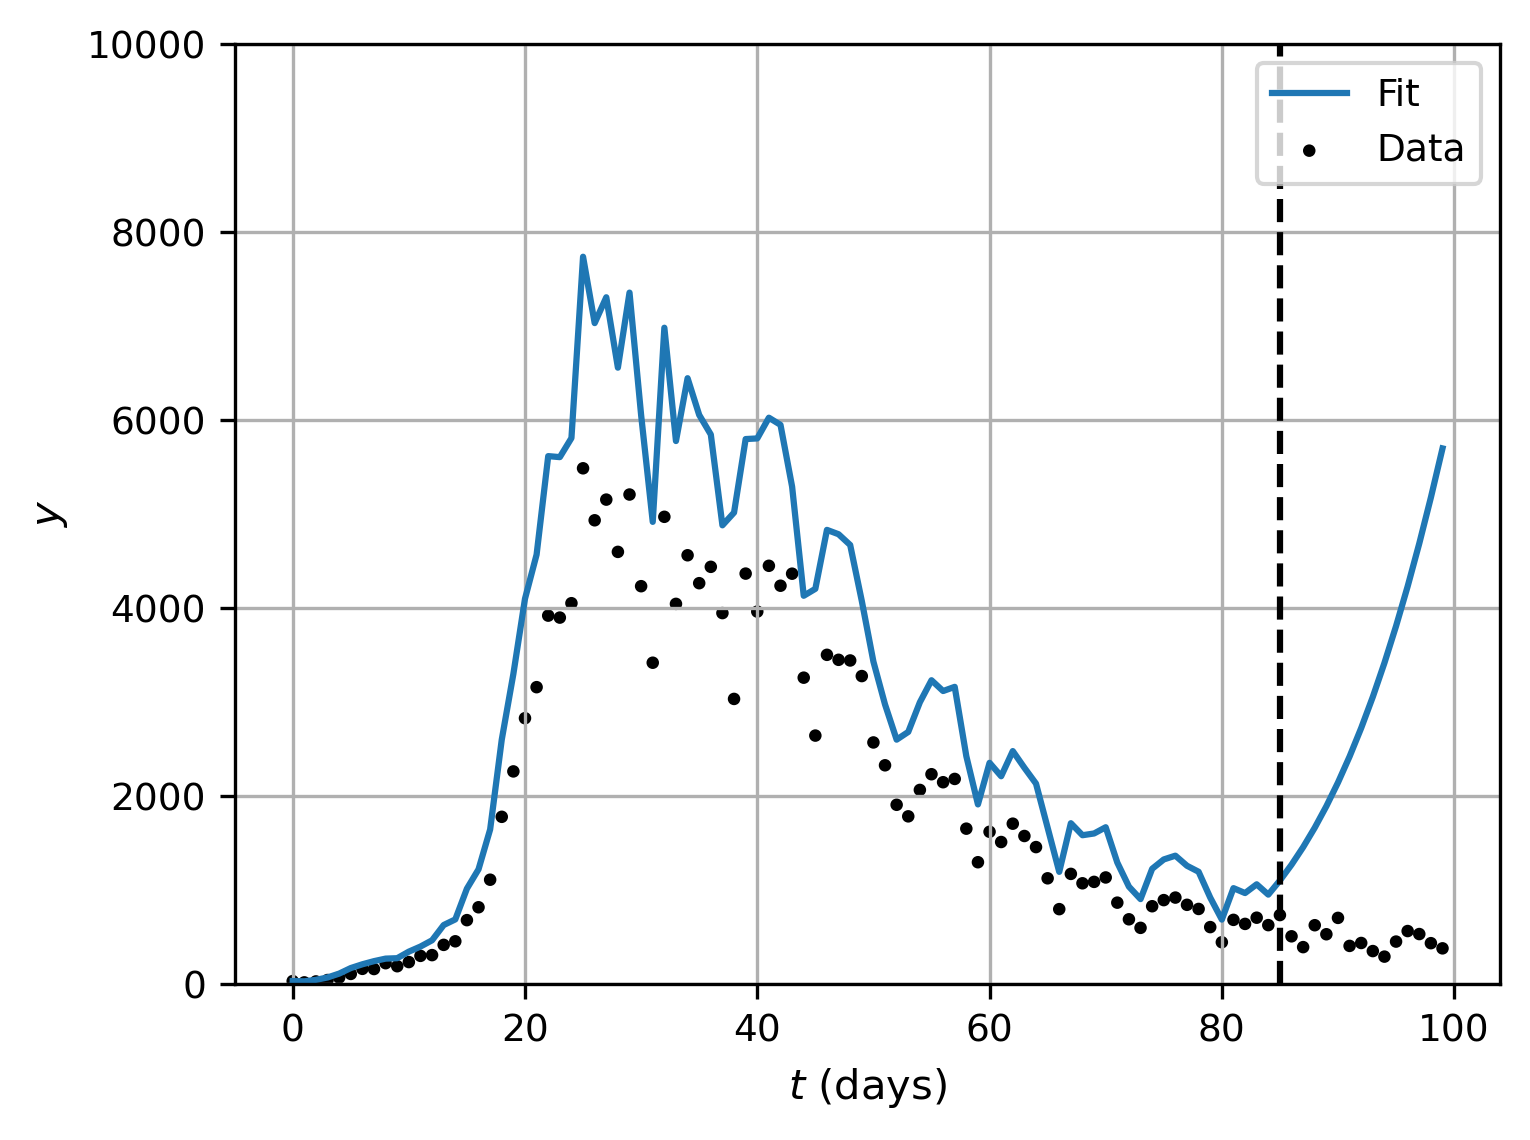

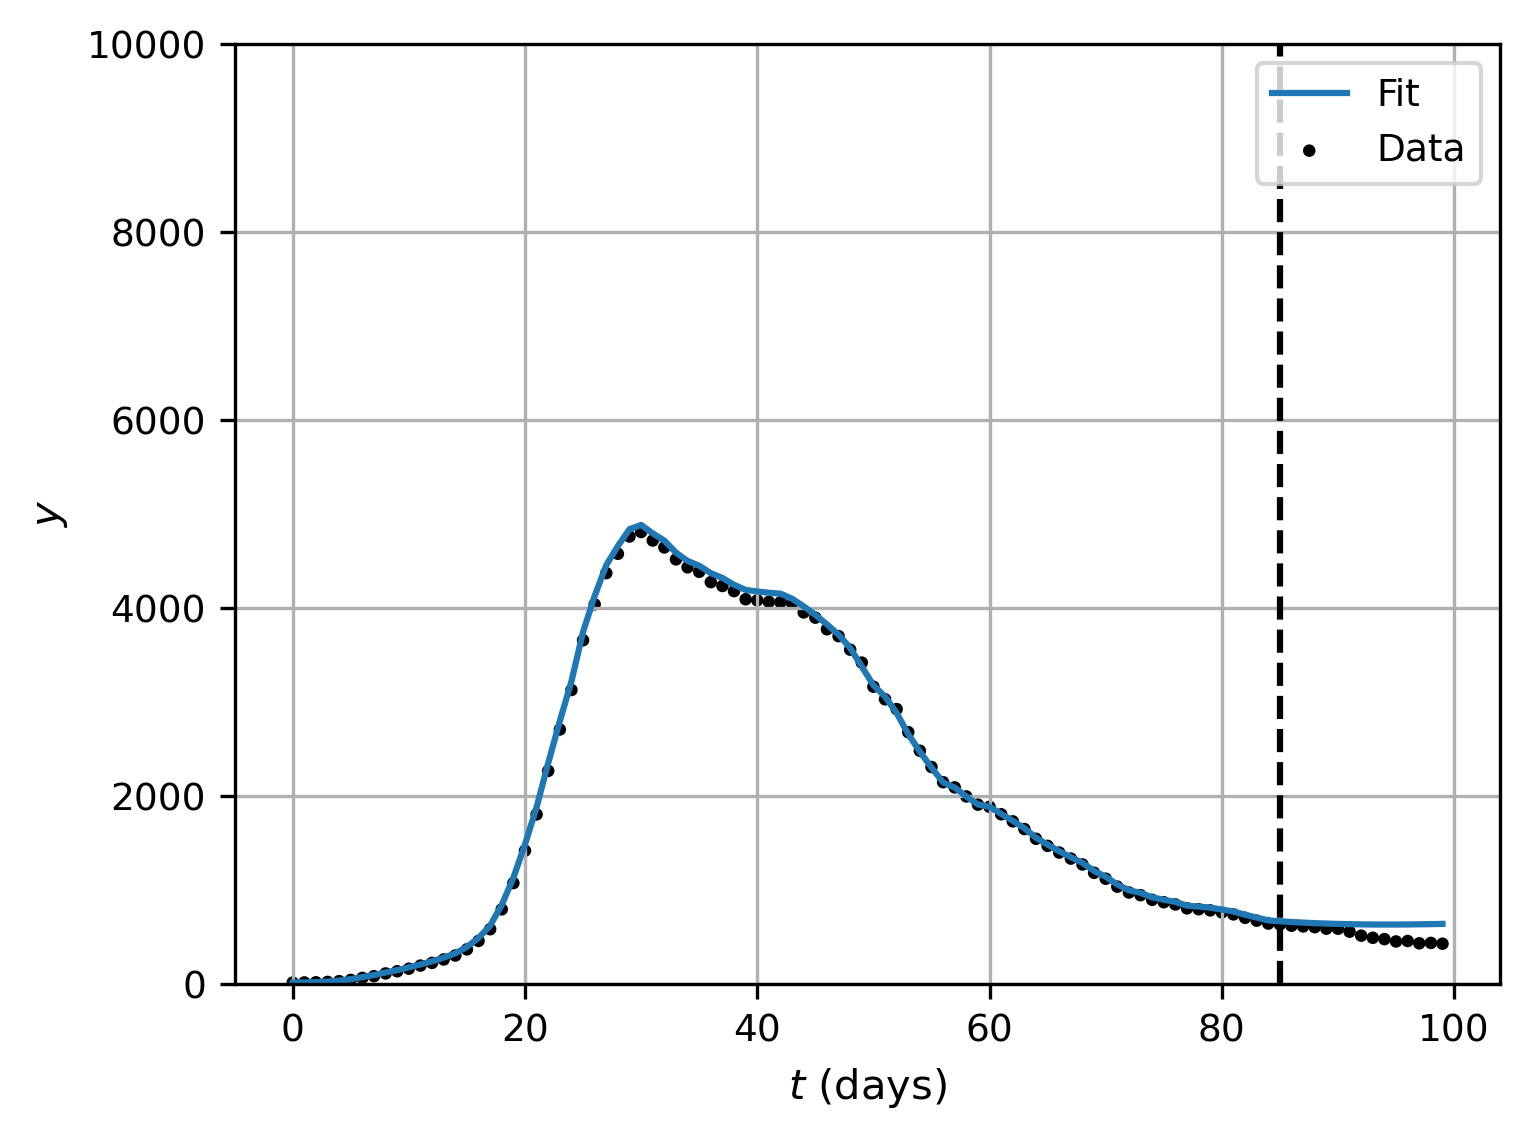

In [4]:
model = eqx.tree_deserialise_leaves("serialised_models/autoregressive_cde_14_day_ahead.eqx", like=AutoregressiveCDE.AutoregressiveCDE(data_size=3, hidden_size=3, width_size=64, depth=3, key=jr.key(0)))
for control_until in [10, 20, 30, 40, 50, 60, 70, 80, 86]:
    plot_predictions(model, raw_ys, control_until=control_until, file_name=f"plots/autoregressive_cde_predictions_raw_ys_control_{control_until}")
    plot_predictions(model, averaged_ys, control_until=control_until, file_name=f"plots/autoregressive_cde_predictions_averaged_ys_control_{control_until}")

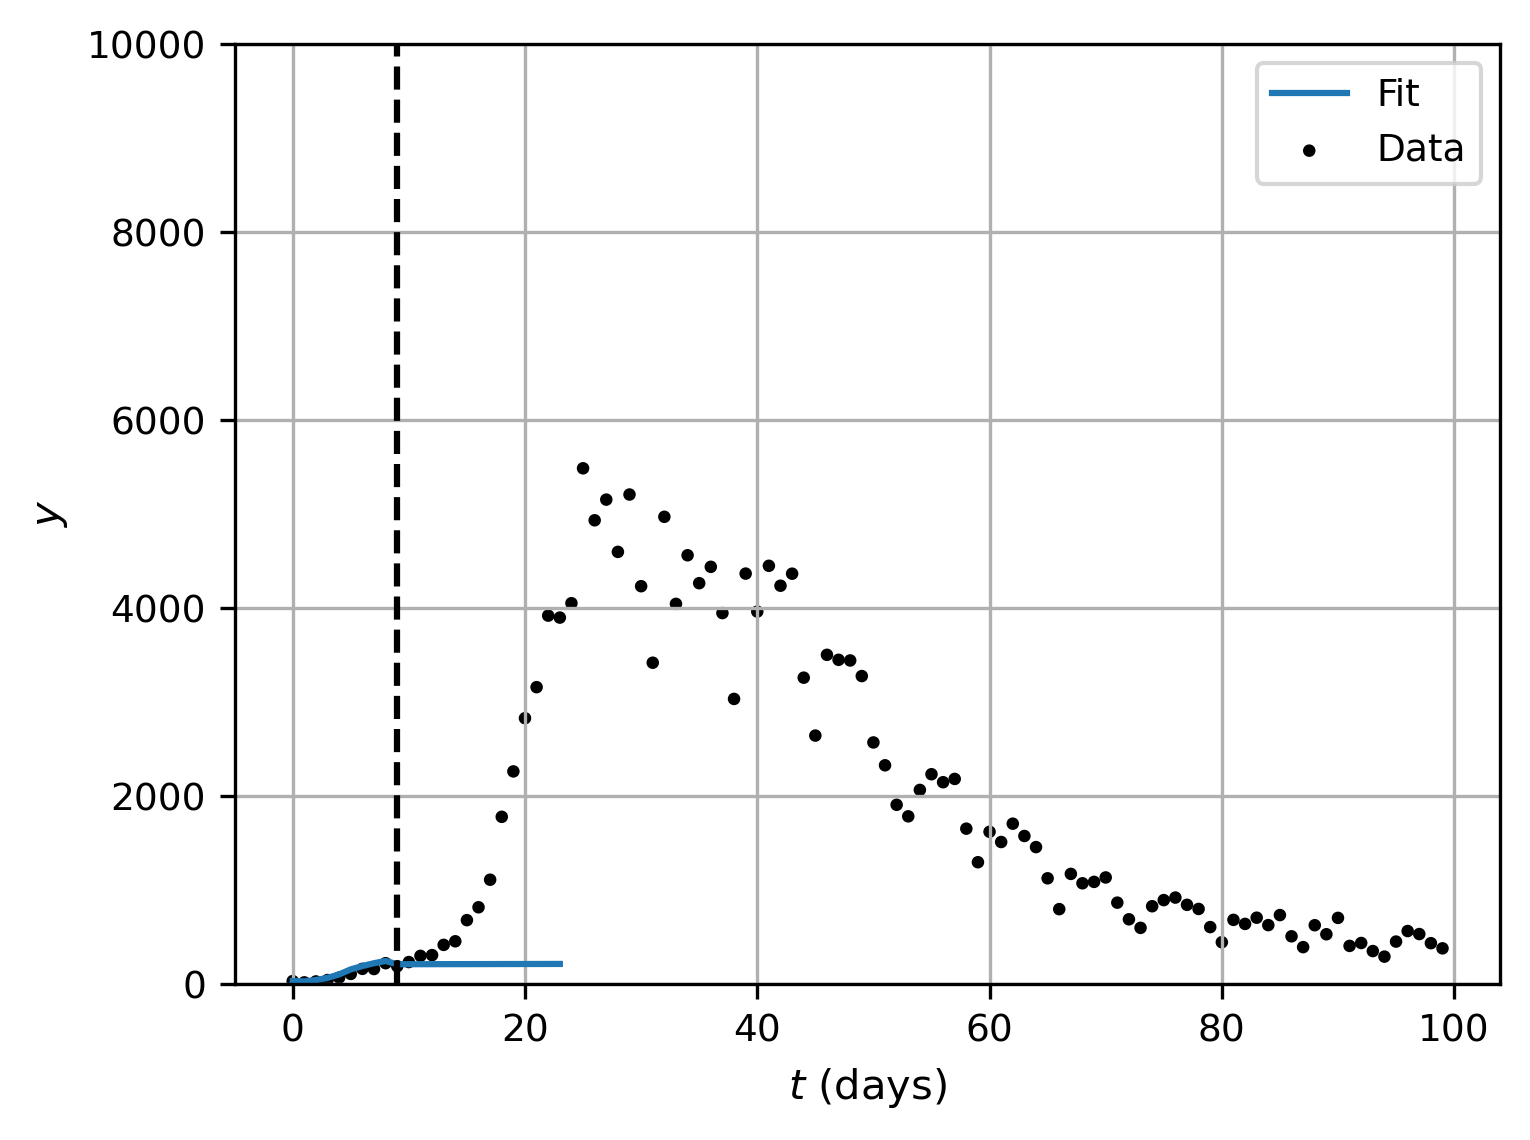

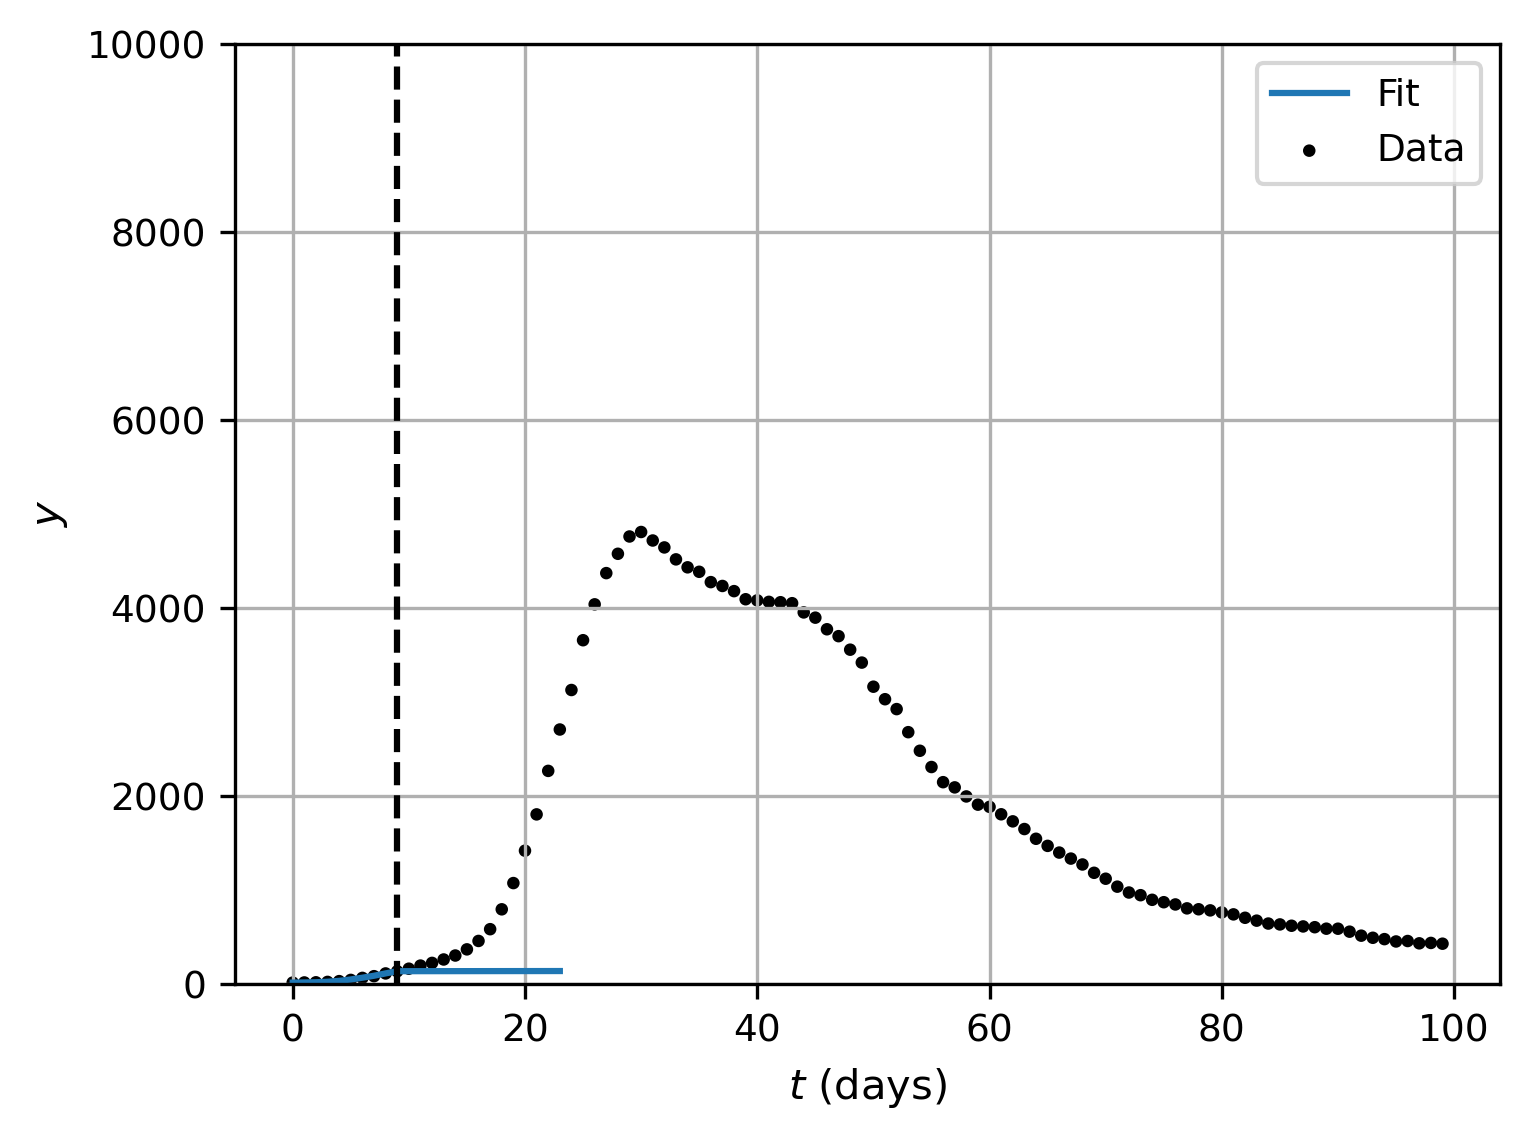

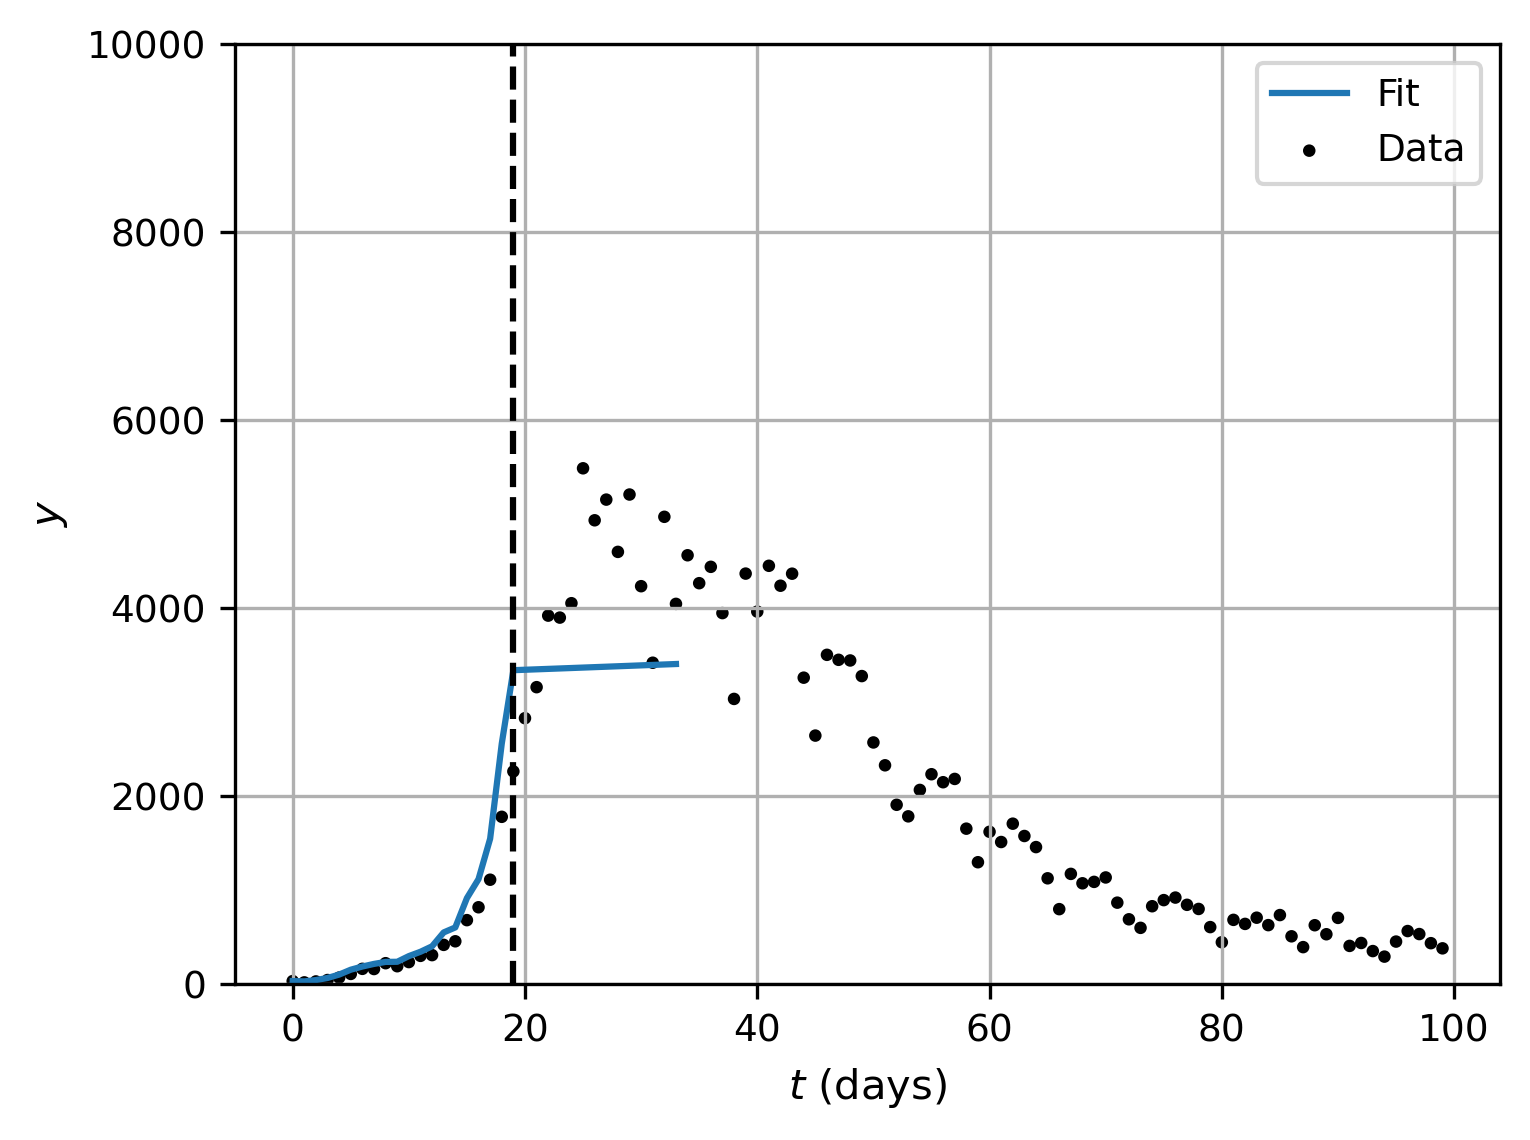

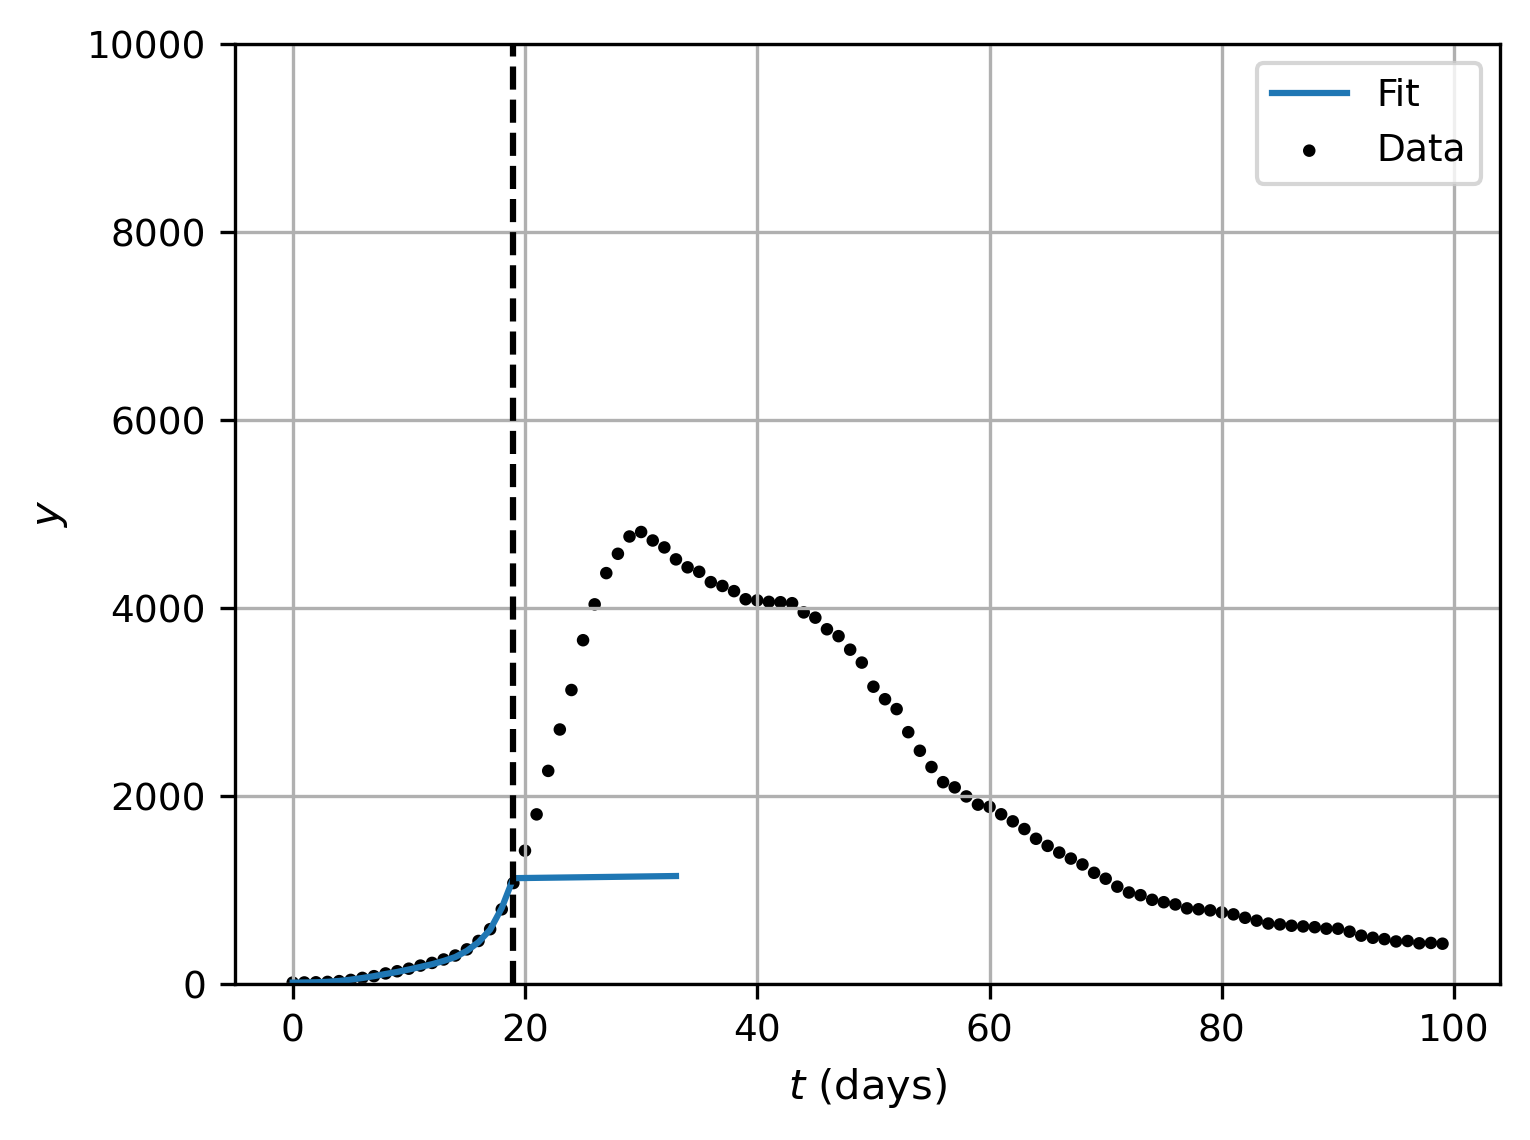

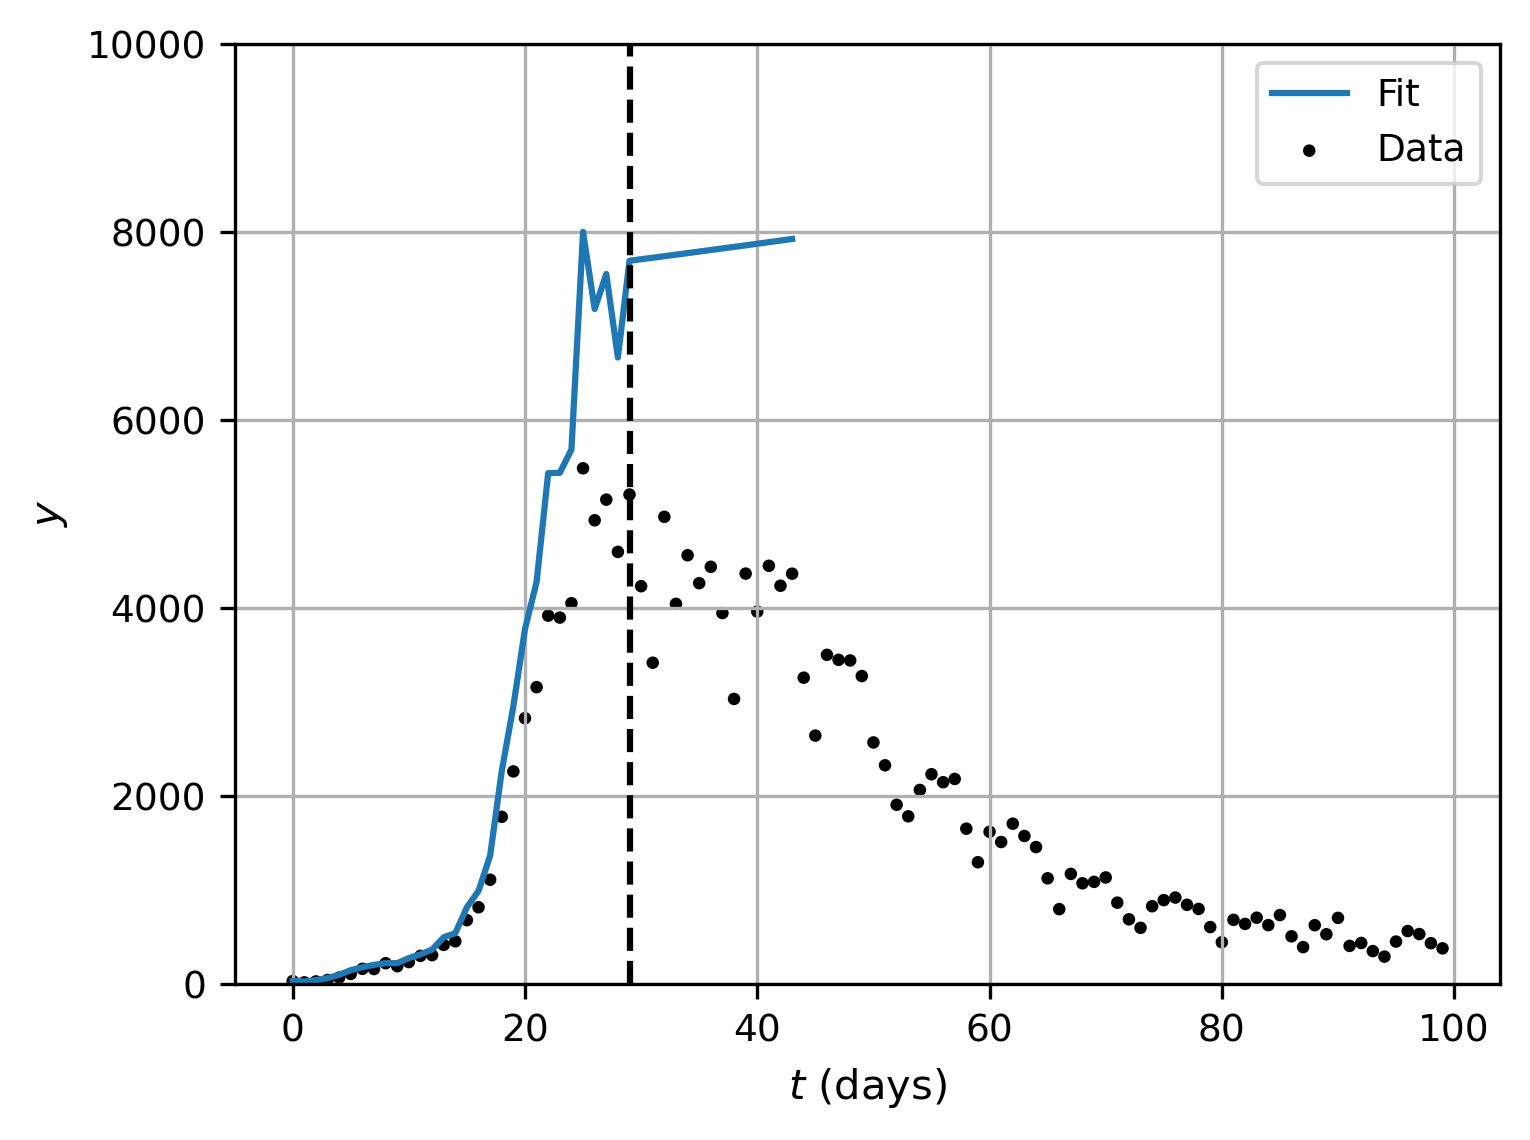

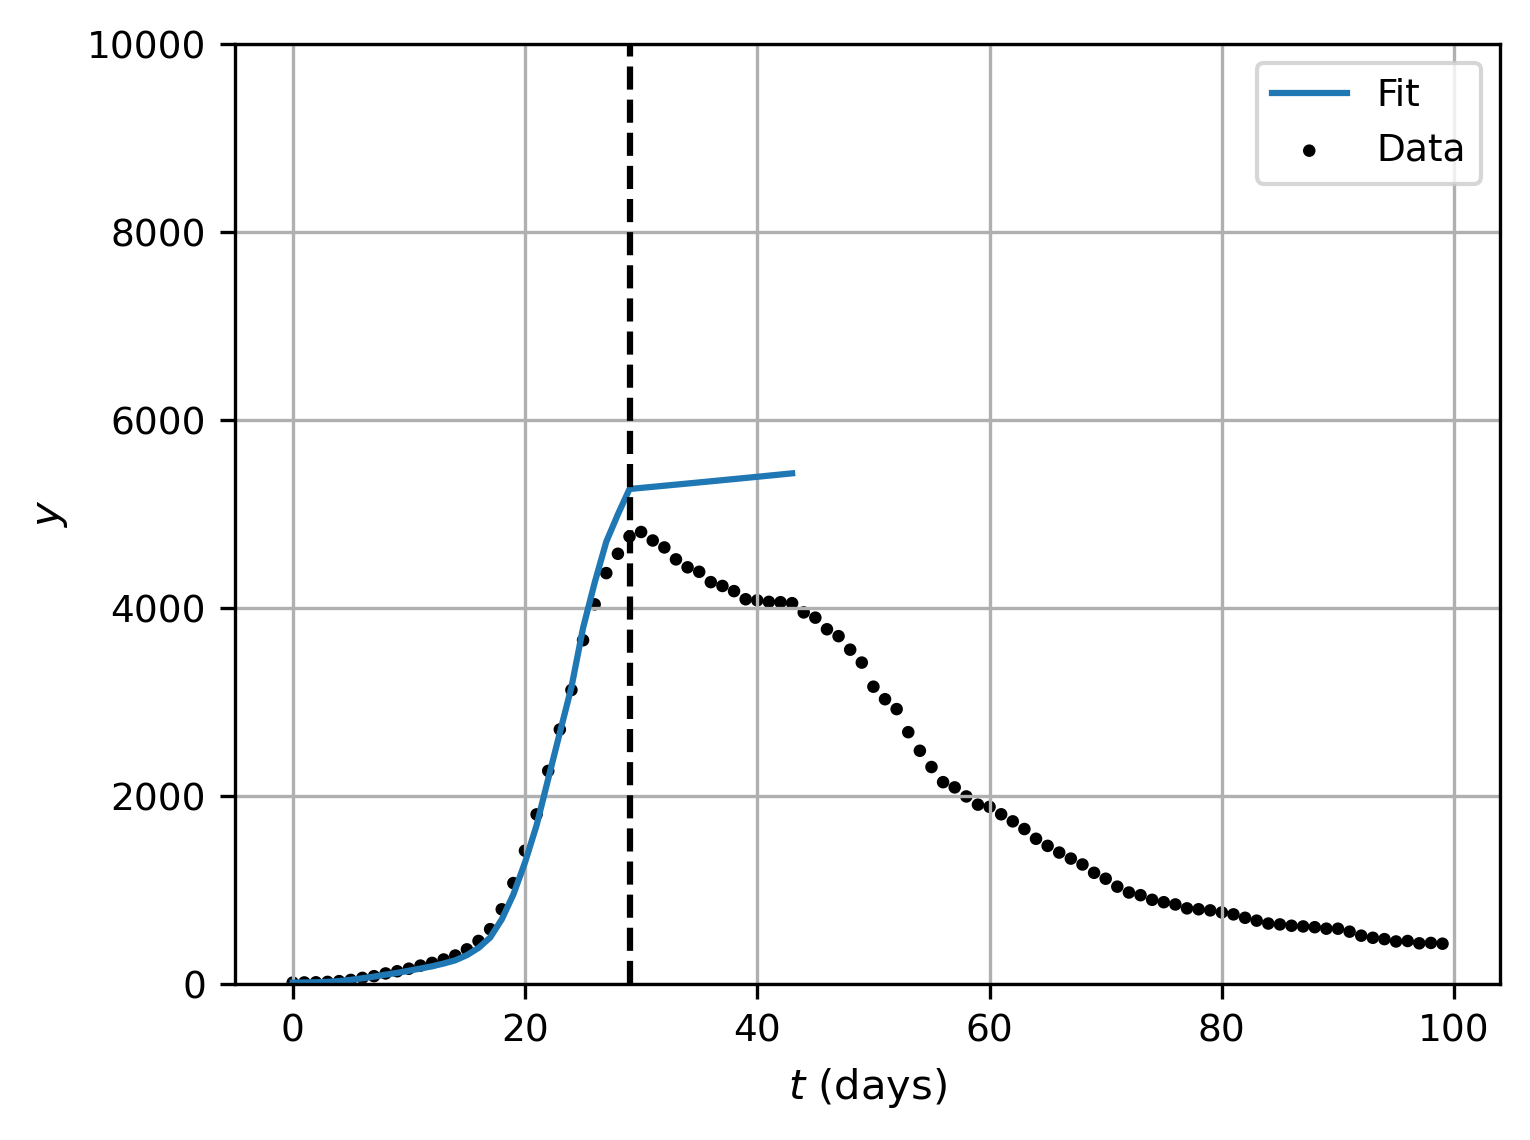

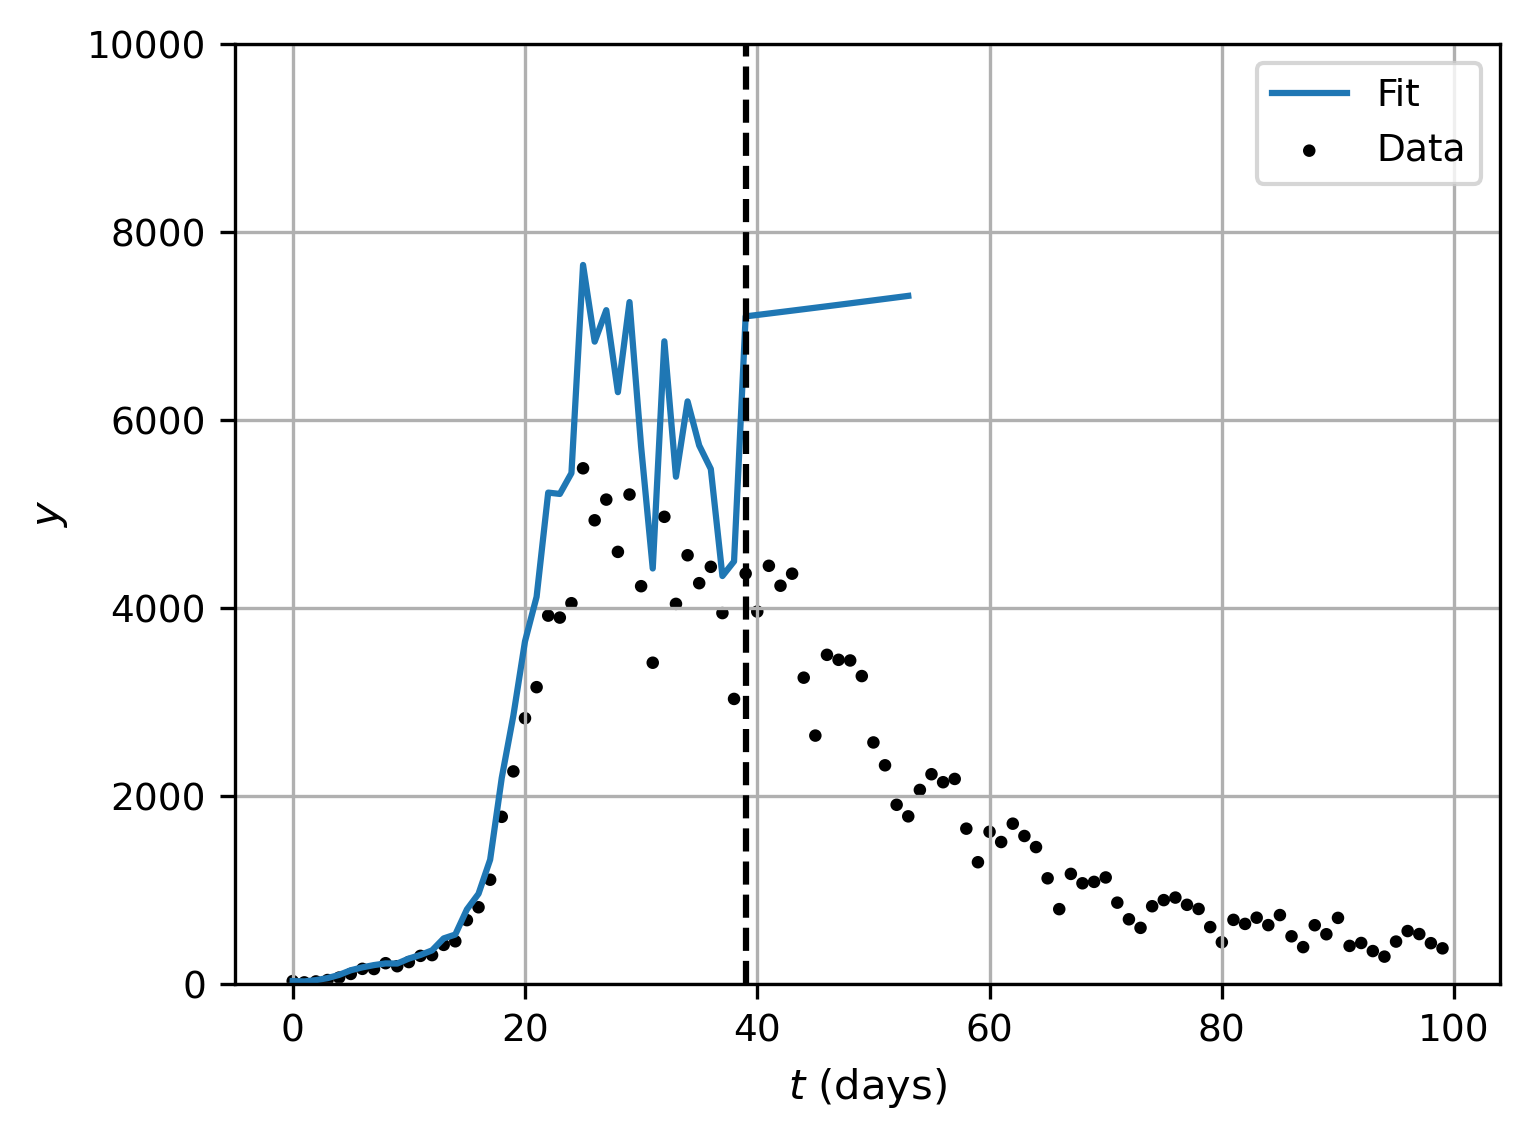

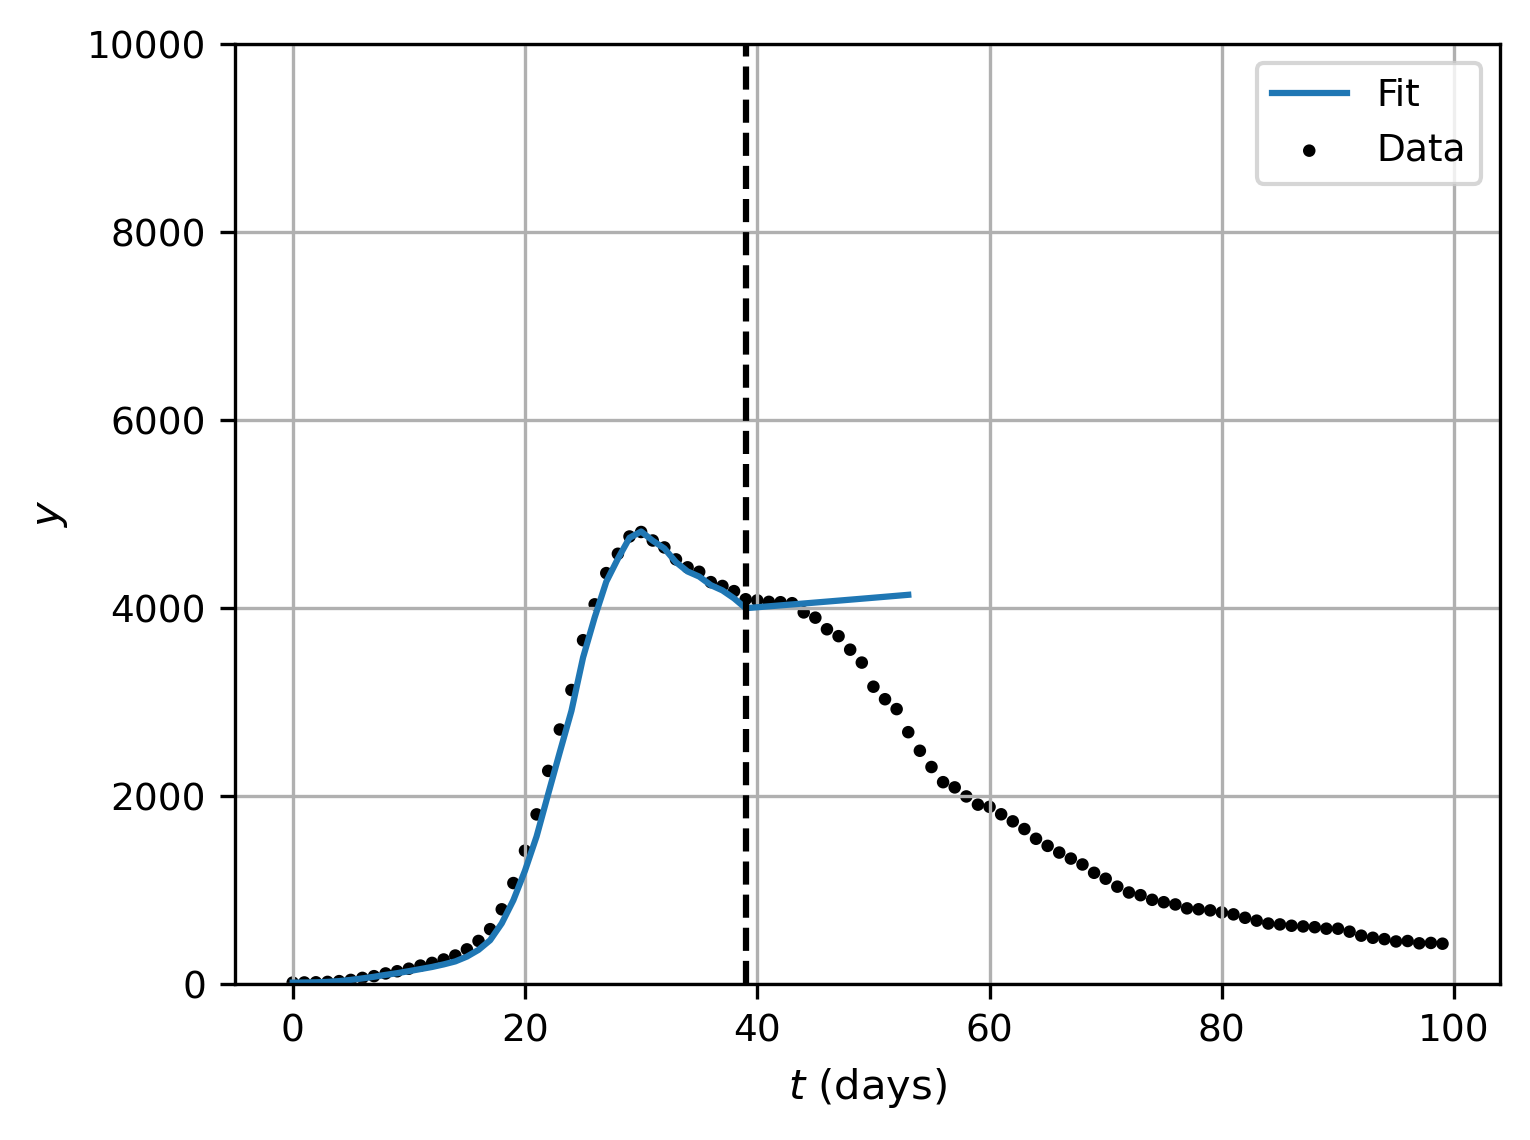

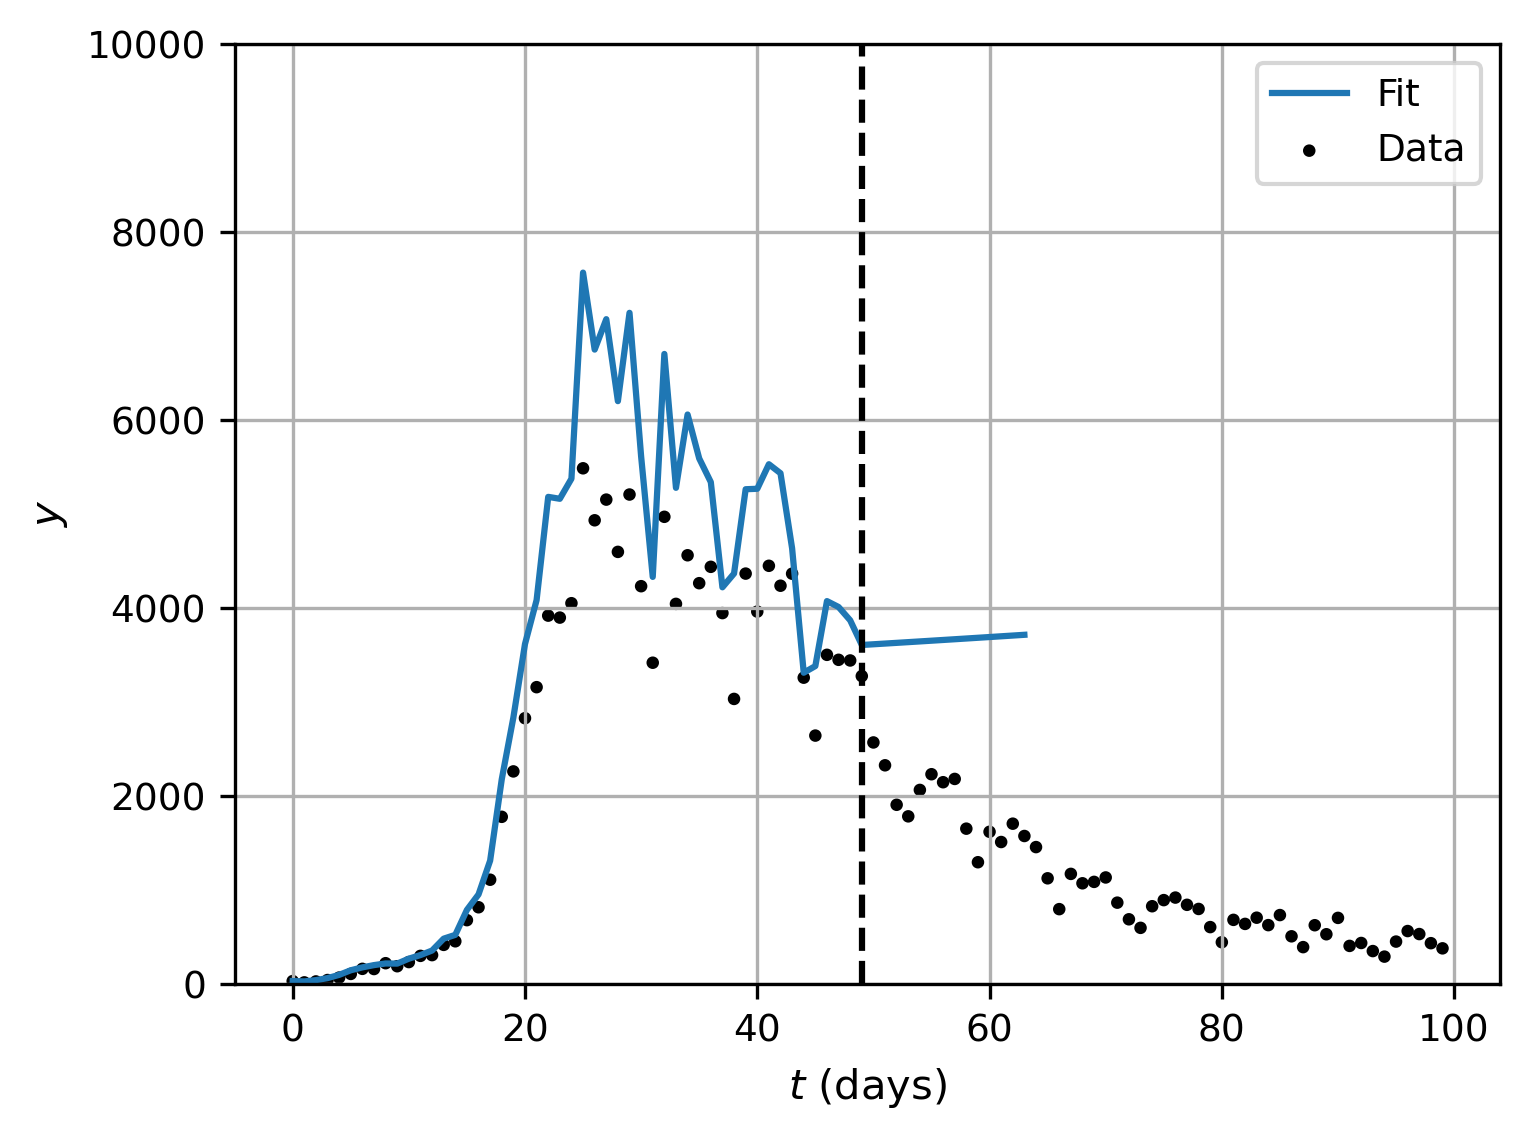

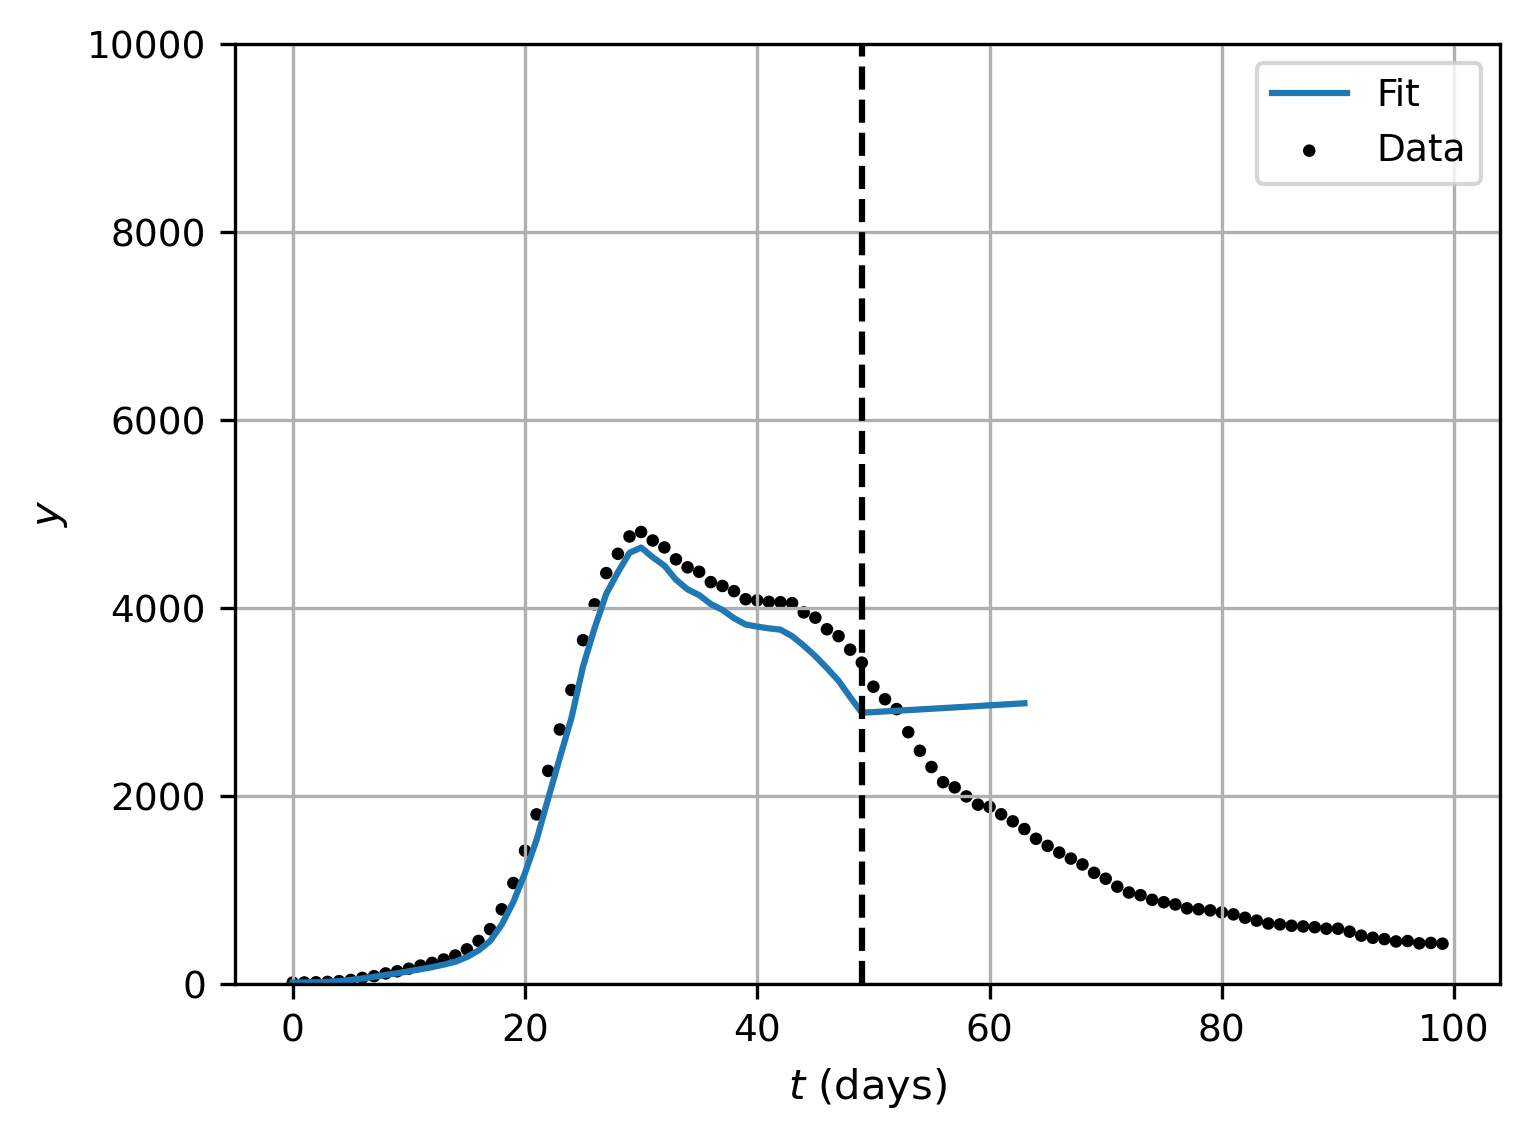

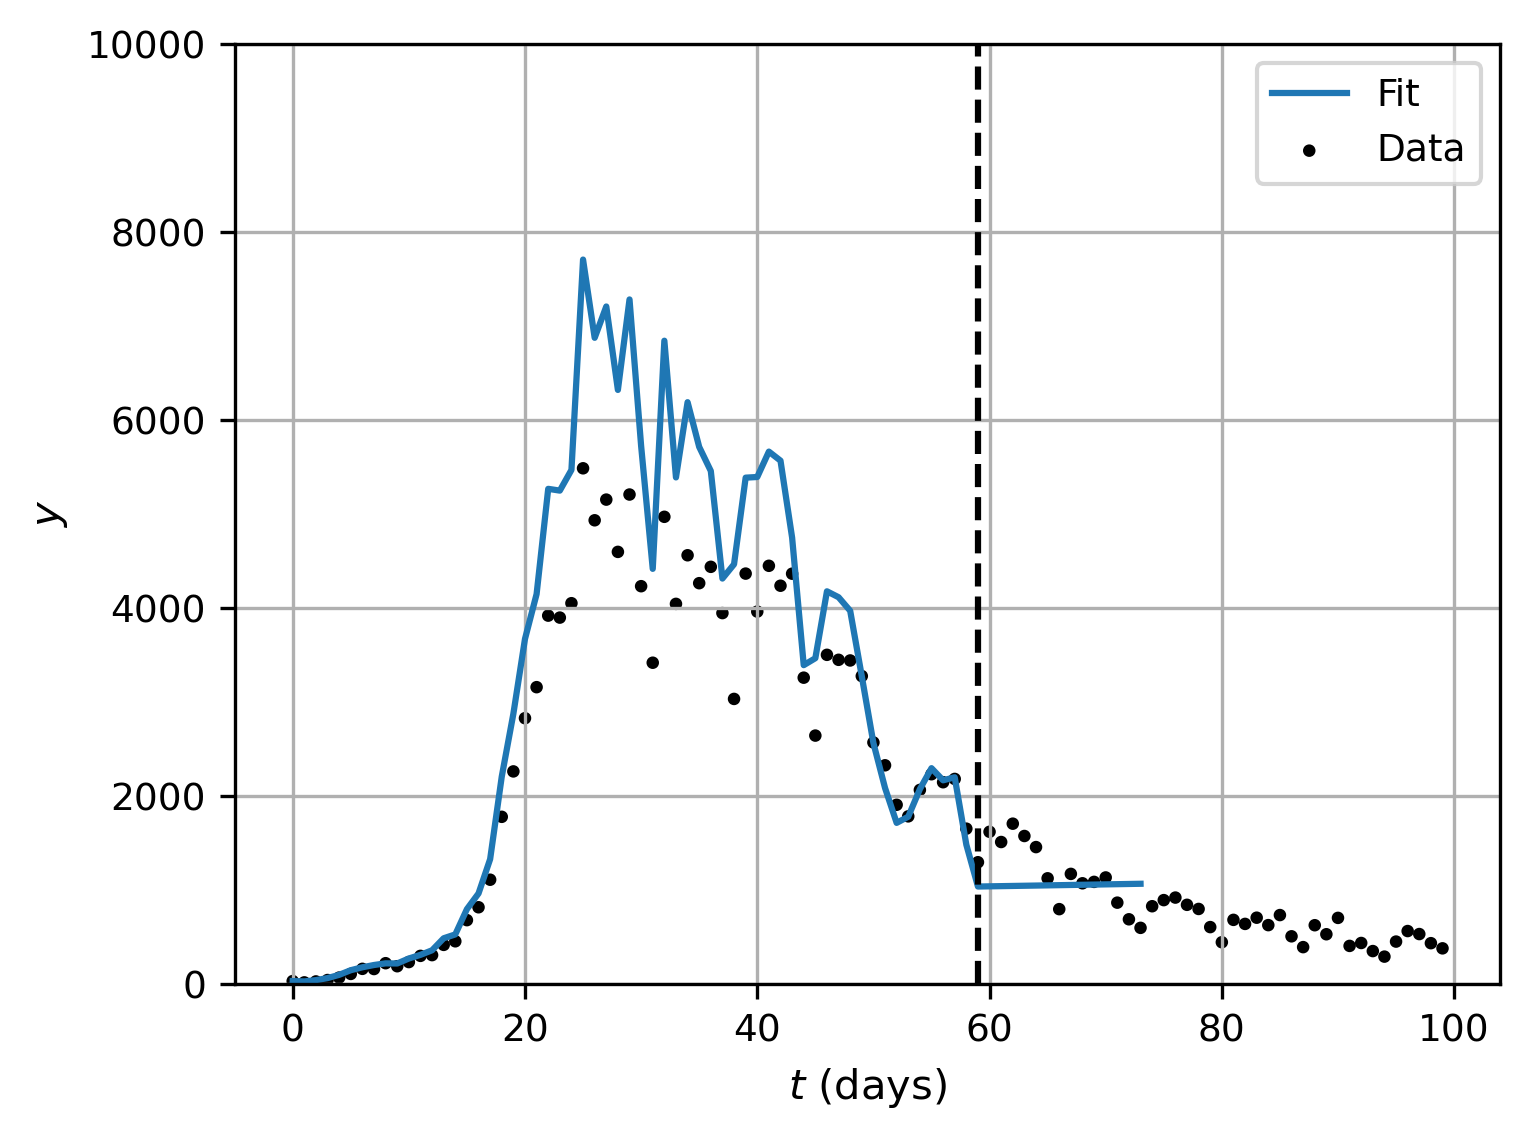

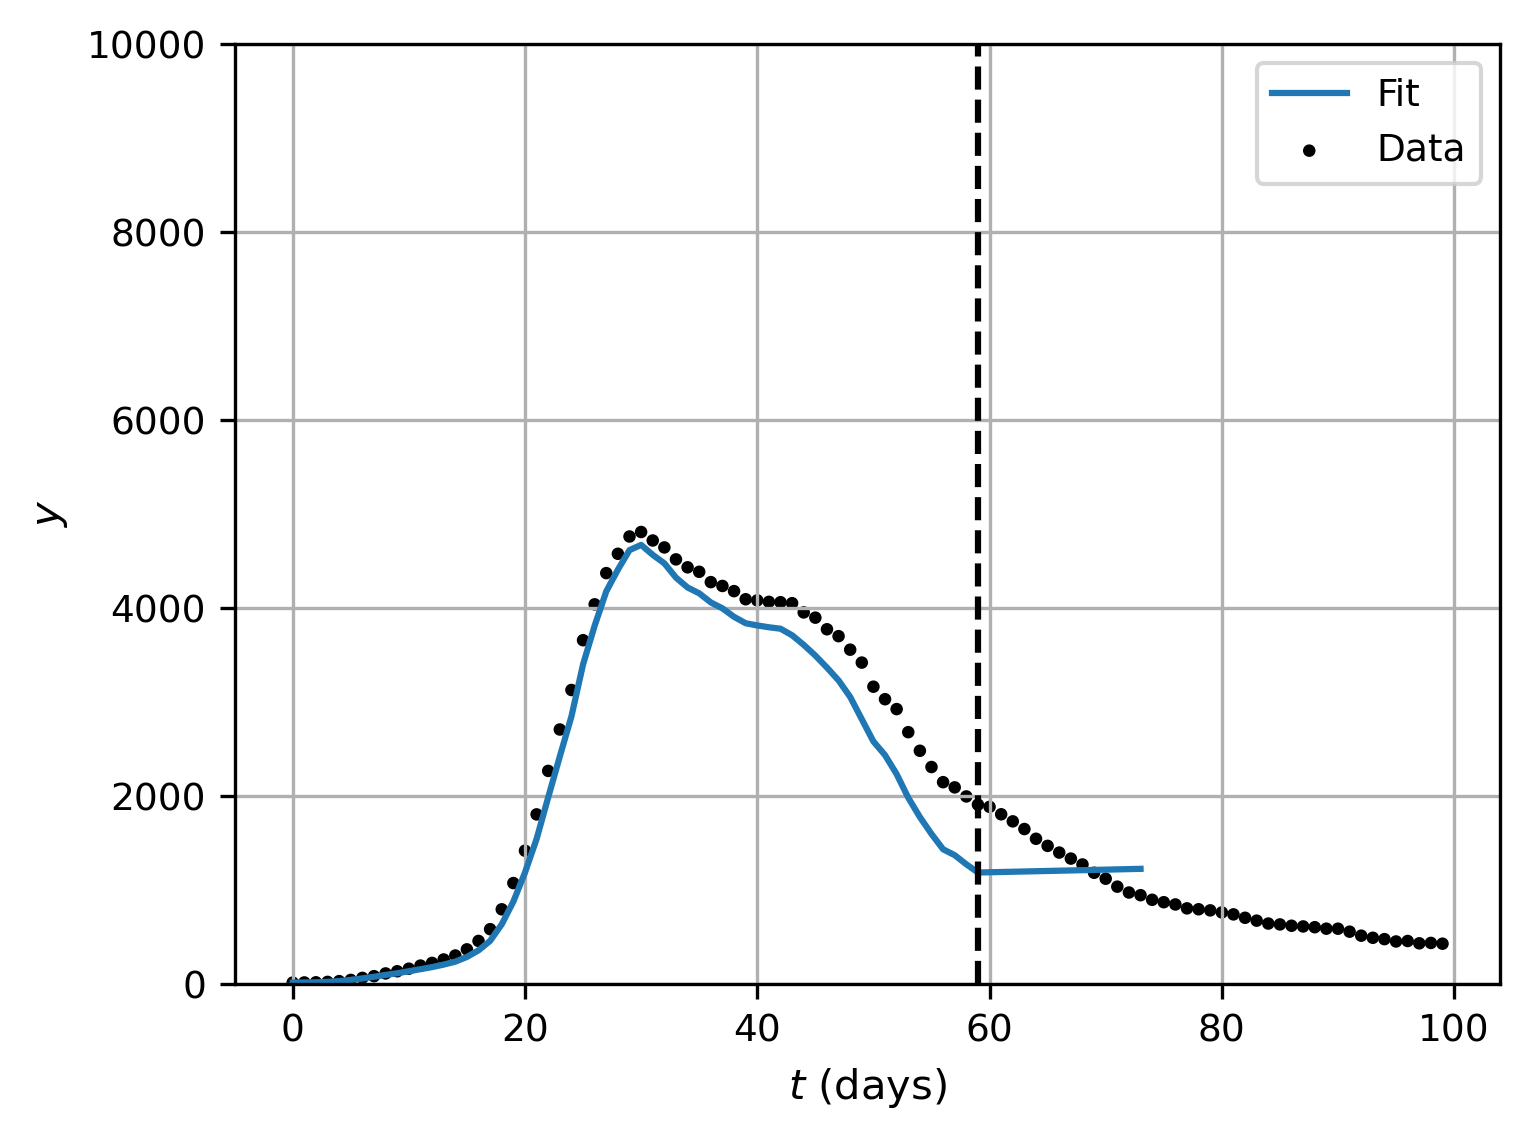

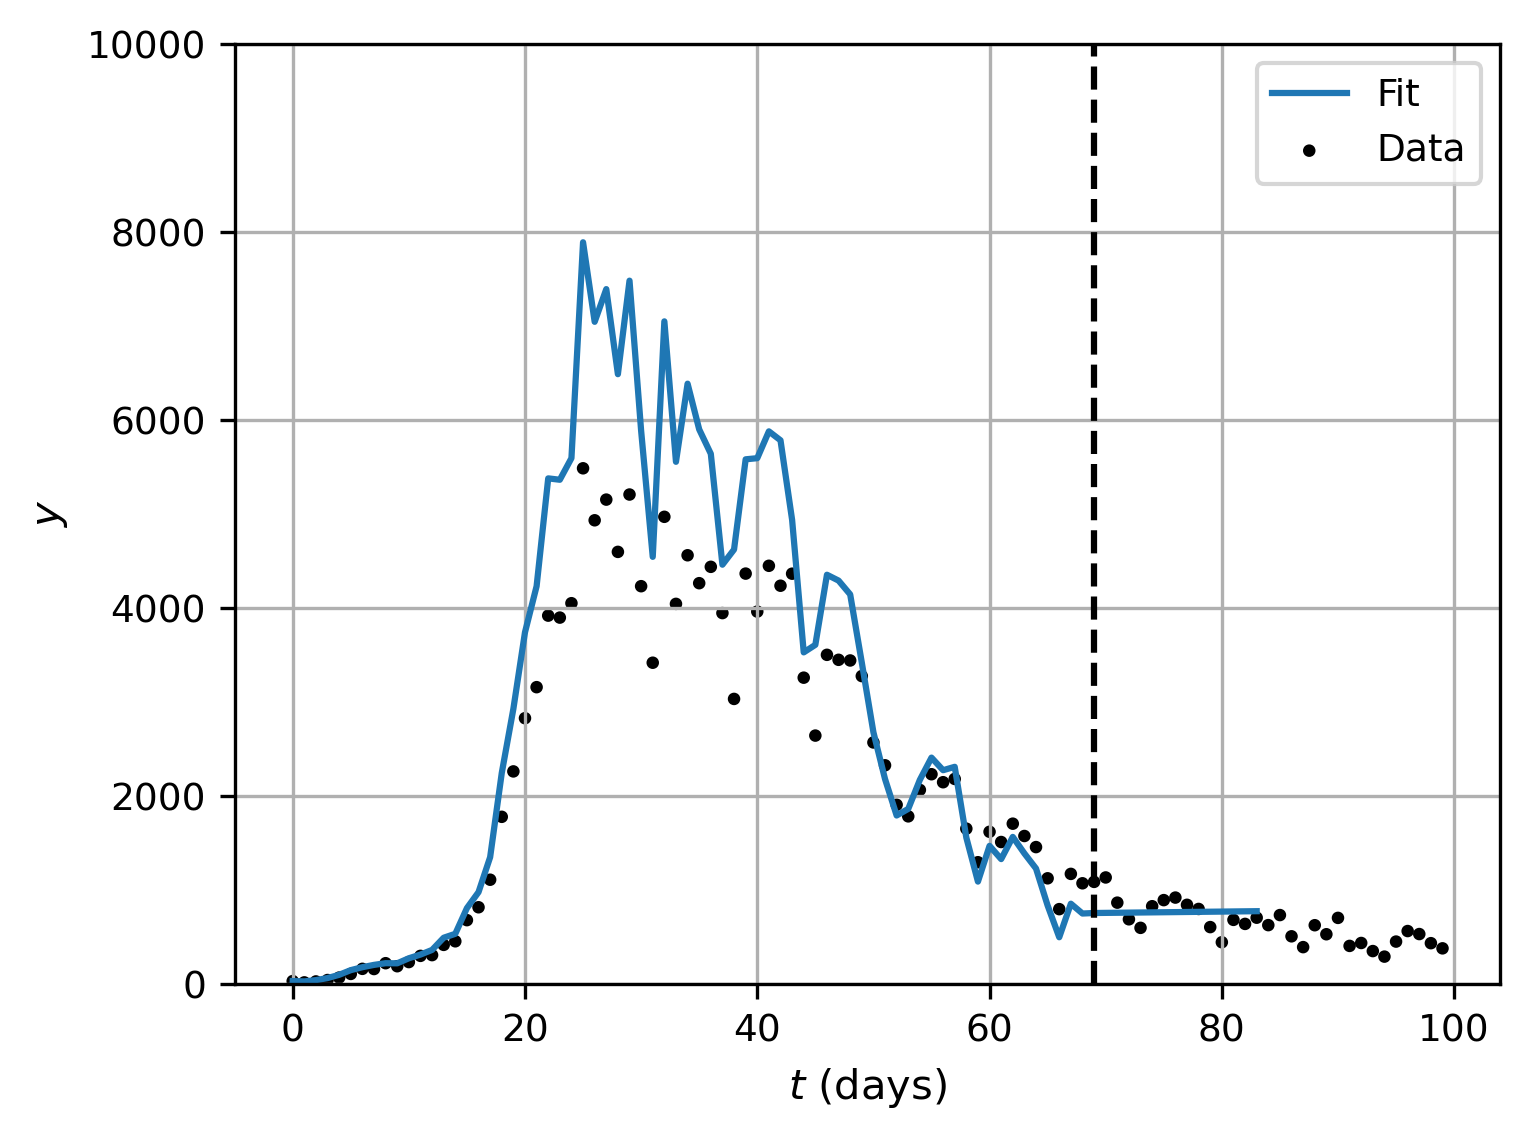

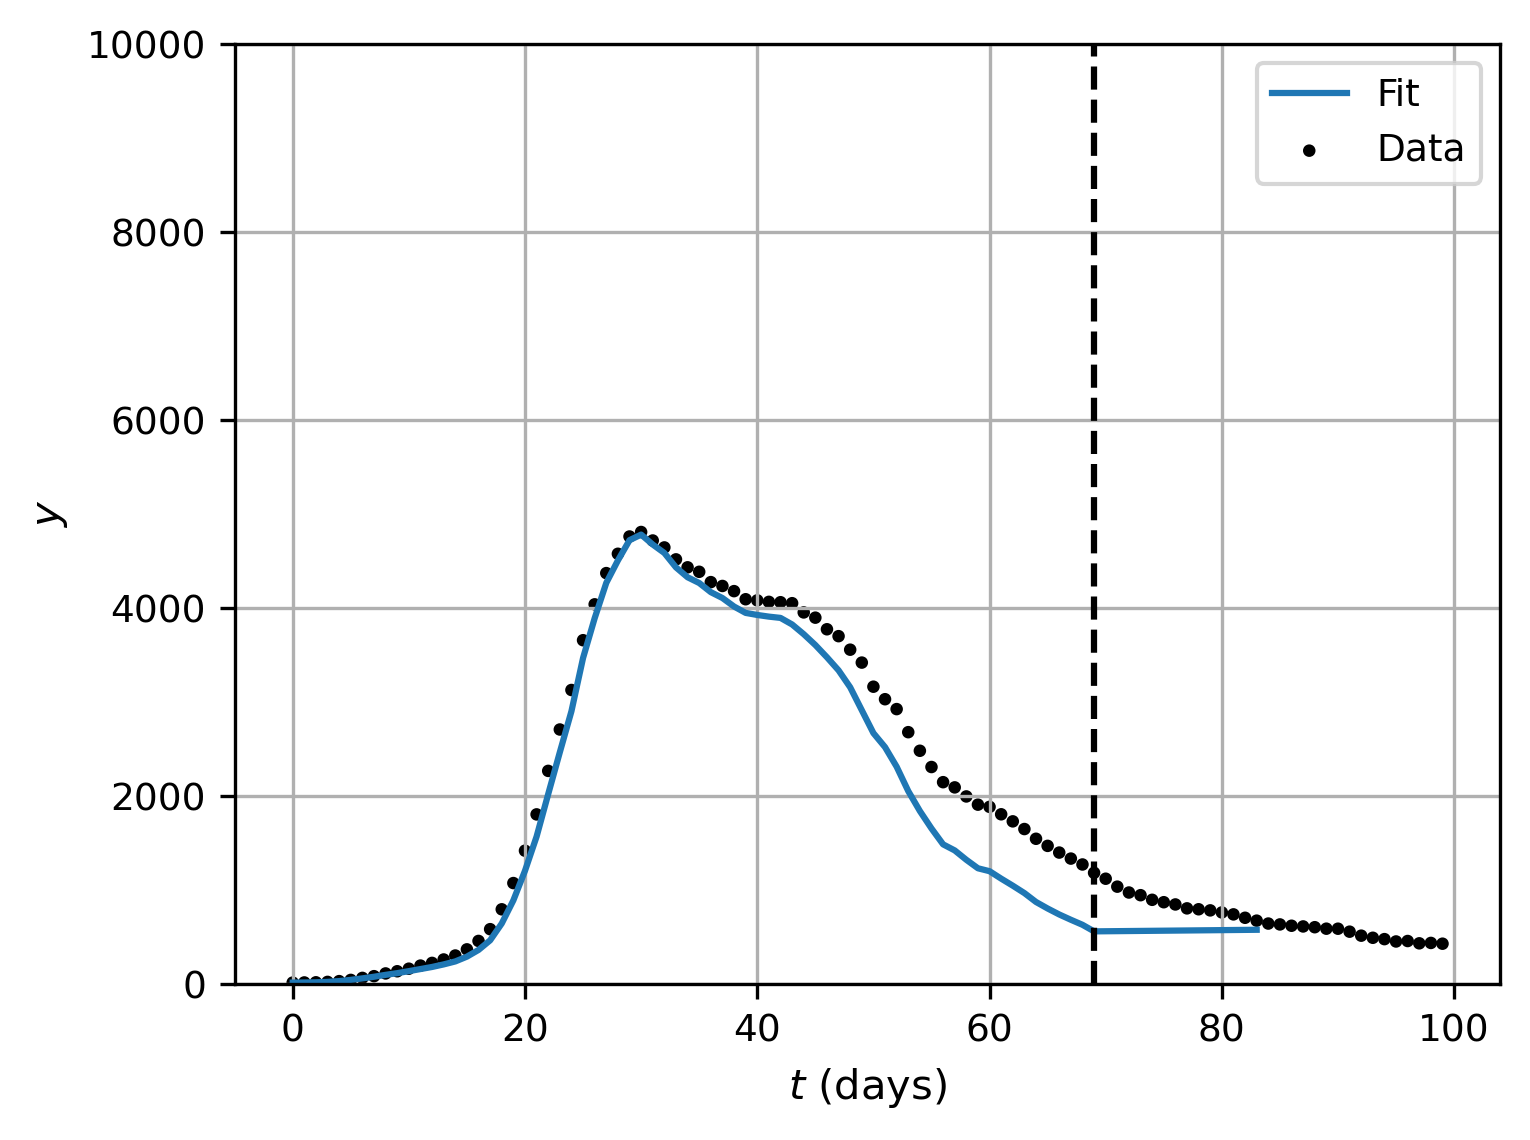

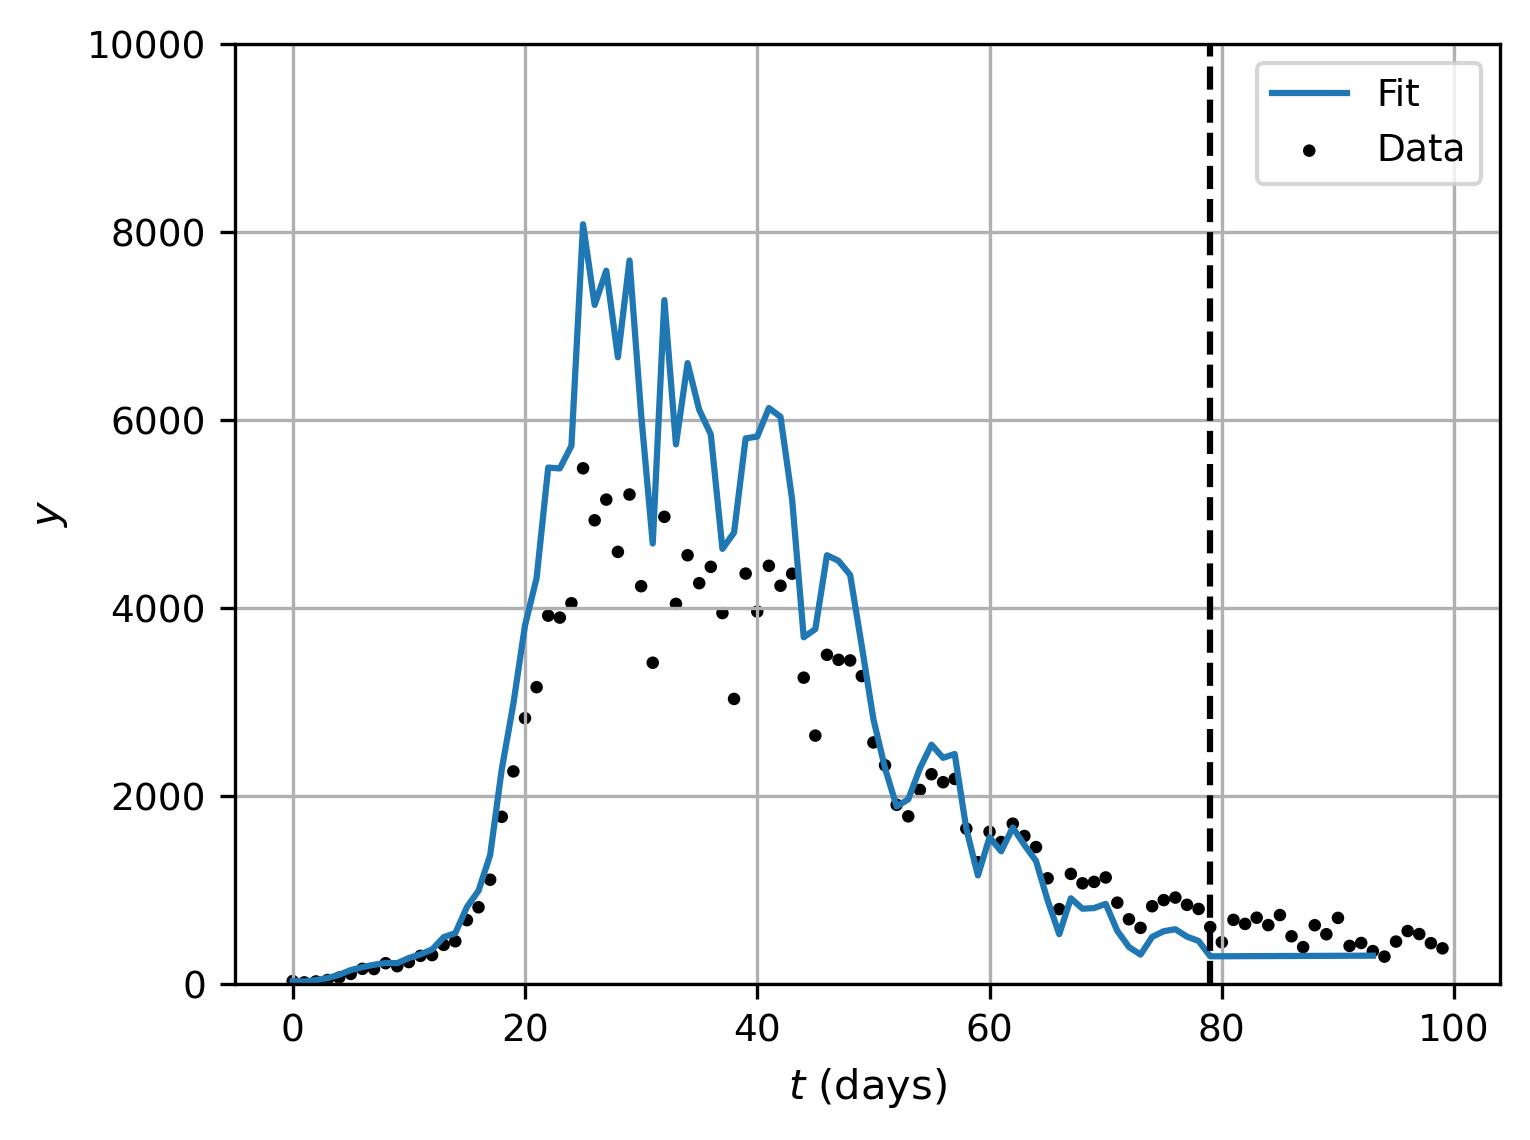

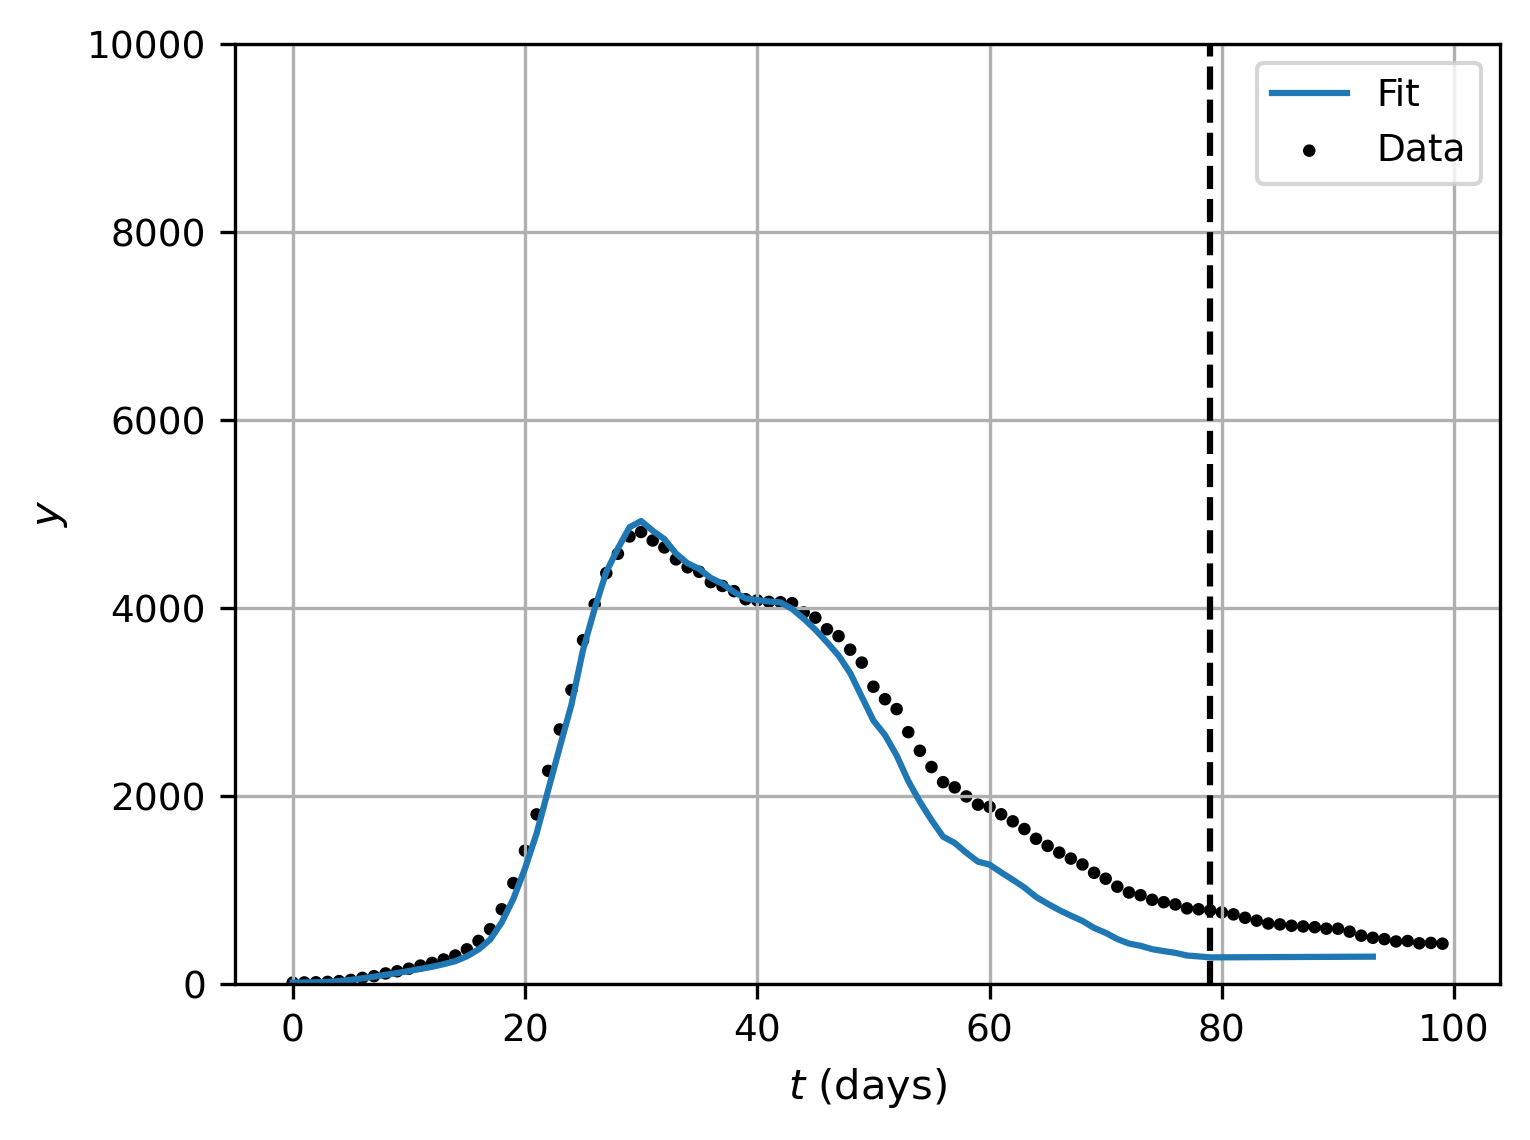

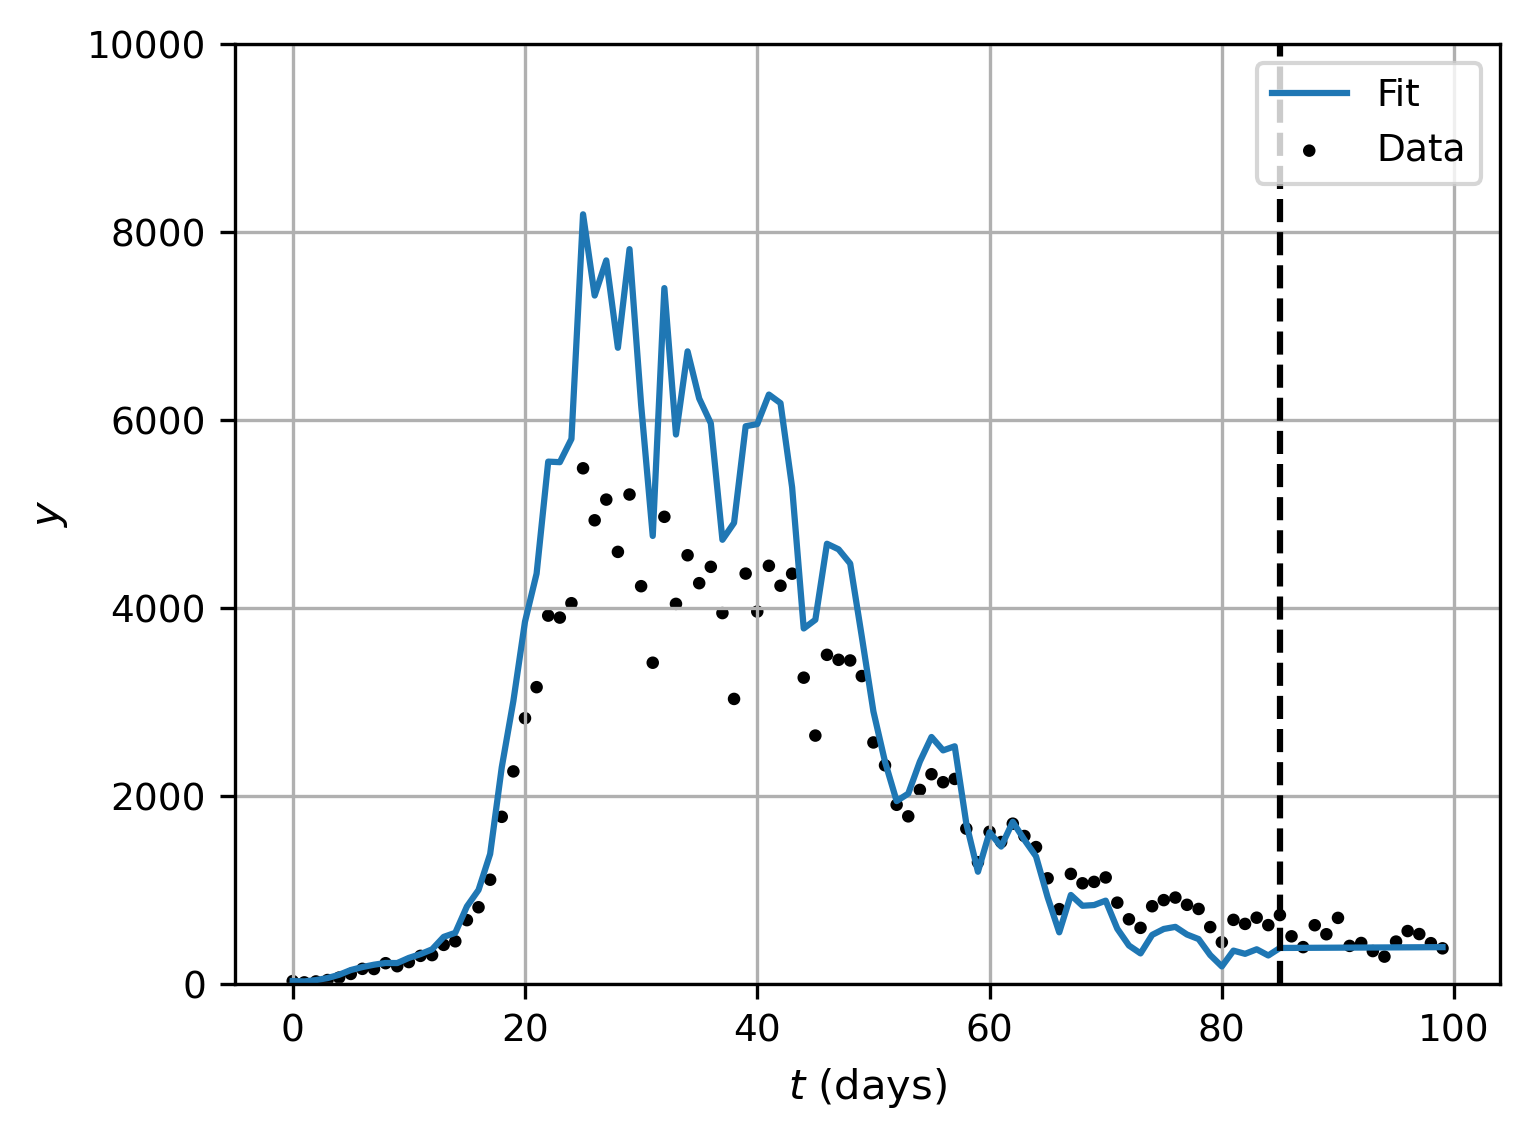

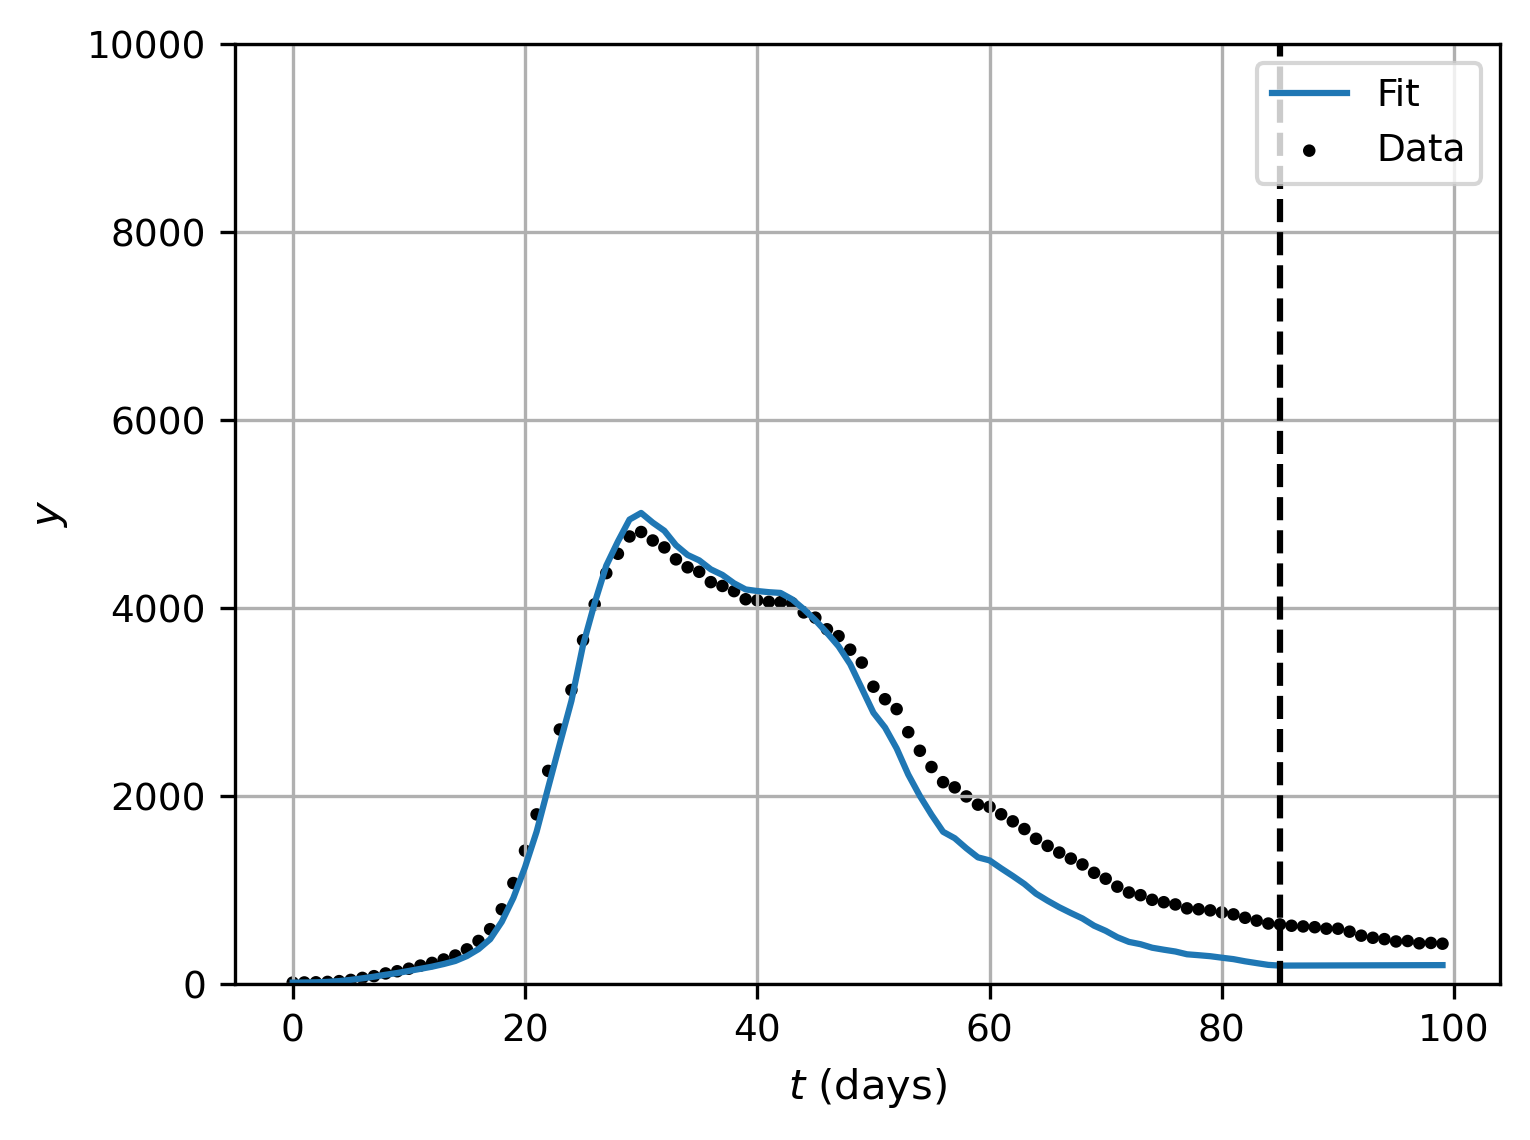

In [5]:
model = eqx.tree_deserialise_leaves("serialised_models/cde_ode_14_day_ahead.eqx", like=CDEODE.CDEODE(data_size=3, hidden_size=3, width_size=64, depth=3, key=jr.key(0)))
for control_until in [10, 20, 30, 40, 50, 60, 70, 80, 86]:
    plot_predictions(model, raw_ys, control_until=control_until, file_name=f"plots/cde_ode_predictions_raw_ys_control_{control_until}")
    plot_predictions(model, averaged_ys, control_until=control_until, file_name=f"plots/cde_ode_predictions_averaged_ys_control_{control_until}")

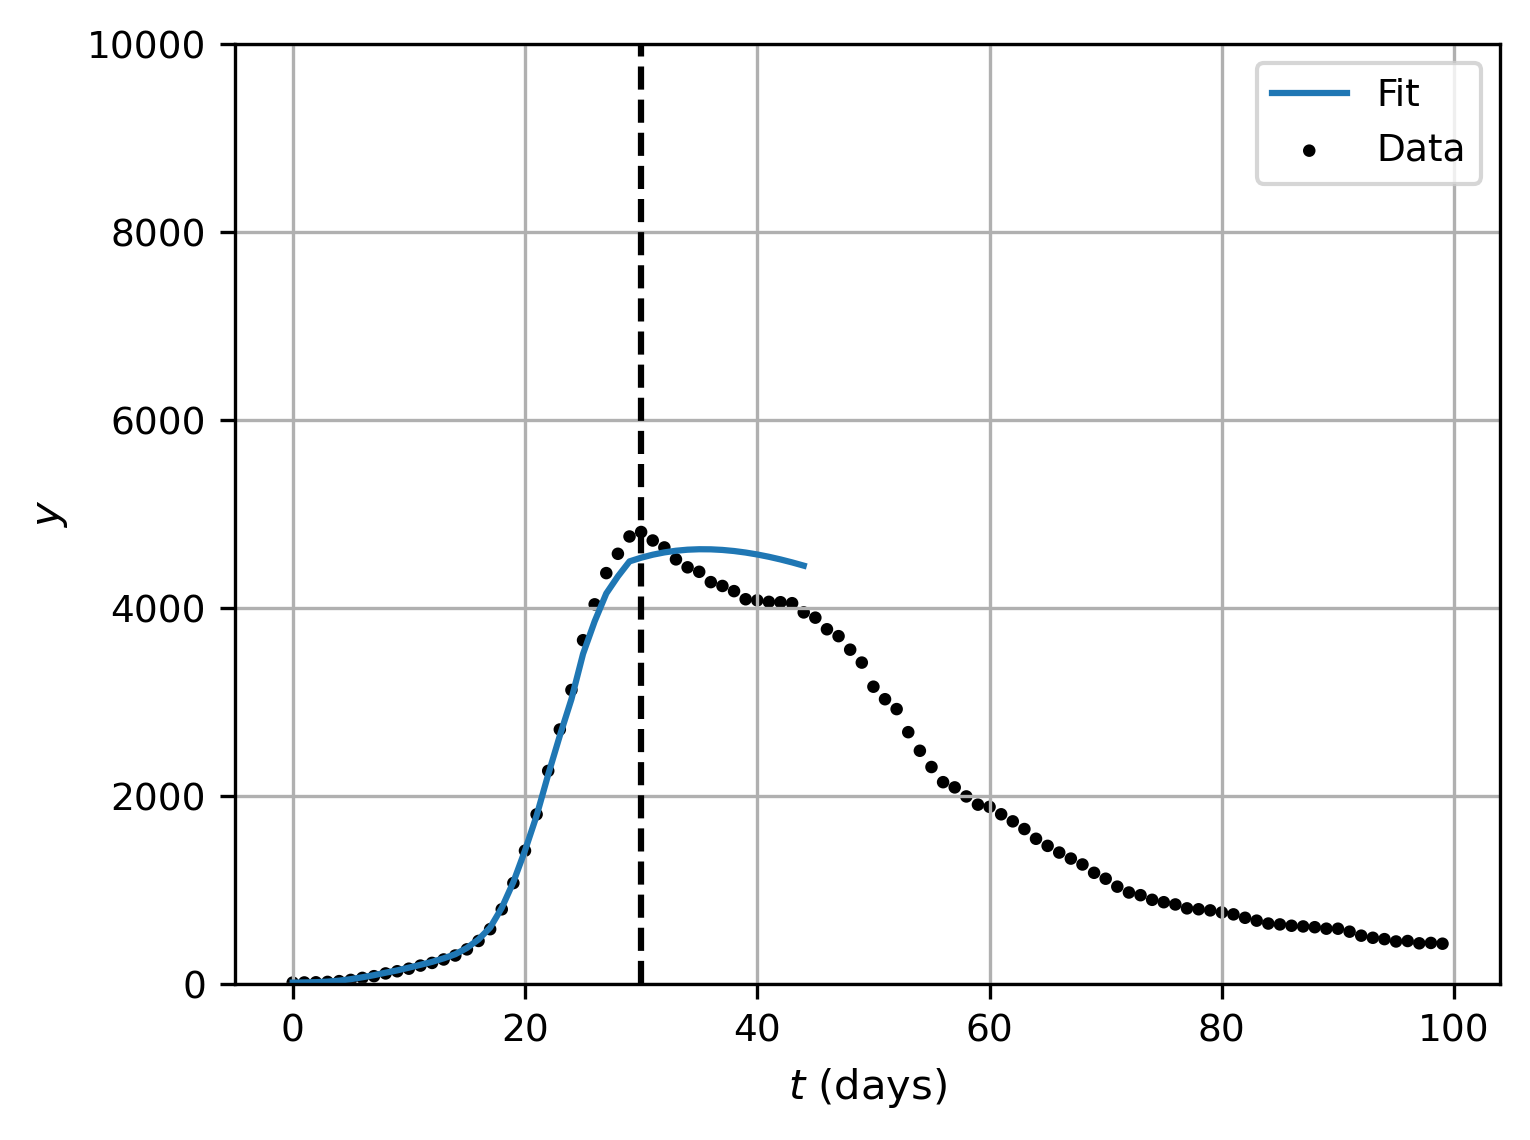

In [22]:
model = eqx.tree_deserialise_leaves("serialised_models/autoregressive_cde_14_day_ahead.eqx", like=AutoregressiveCDE.AutoregressiveCDE(data_size=3, hidden_size=3, width_size=64, depth=3, key=jr.key(0)))

plot_predictions(model, averaged_ys, control_until=31, file_name=f"plots/autoregressive_cde_predictions_averaged_ys_control_{control_until}")

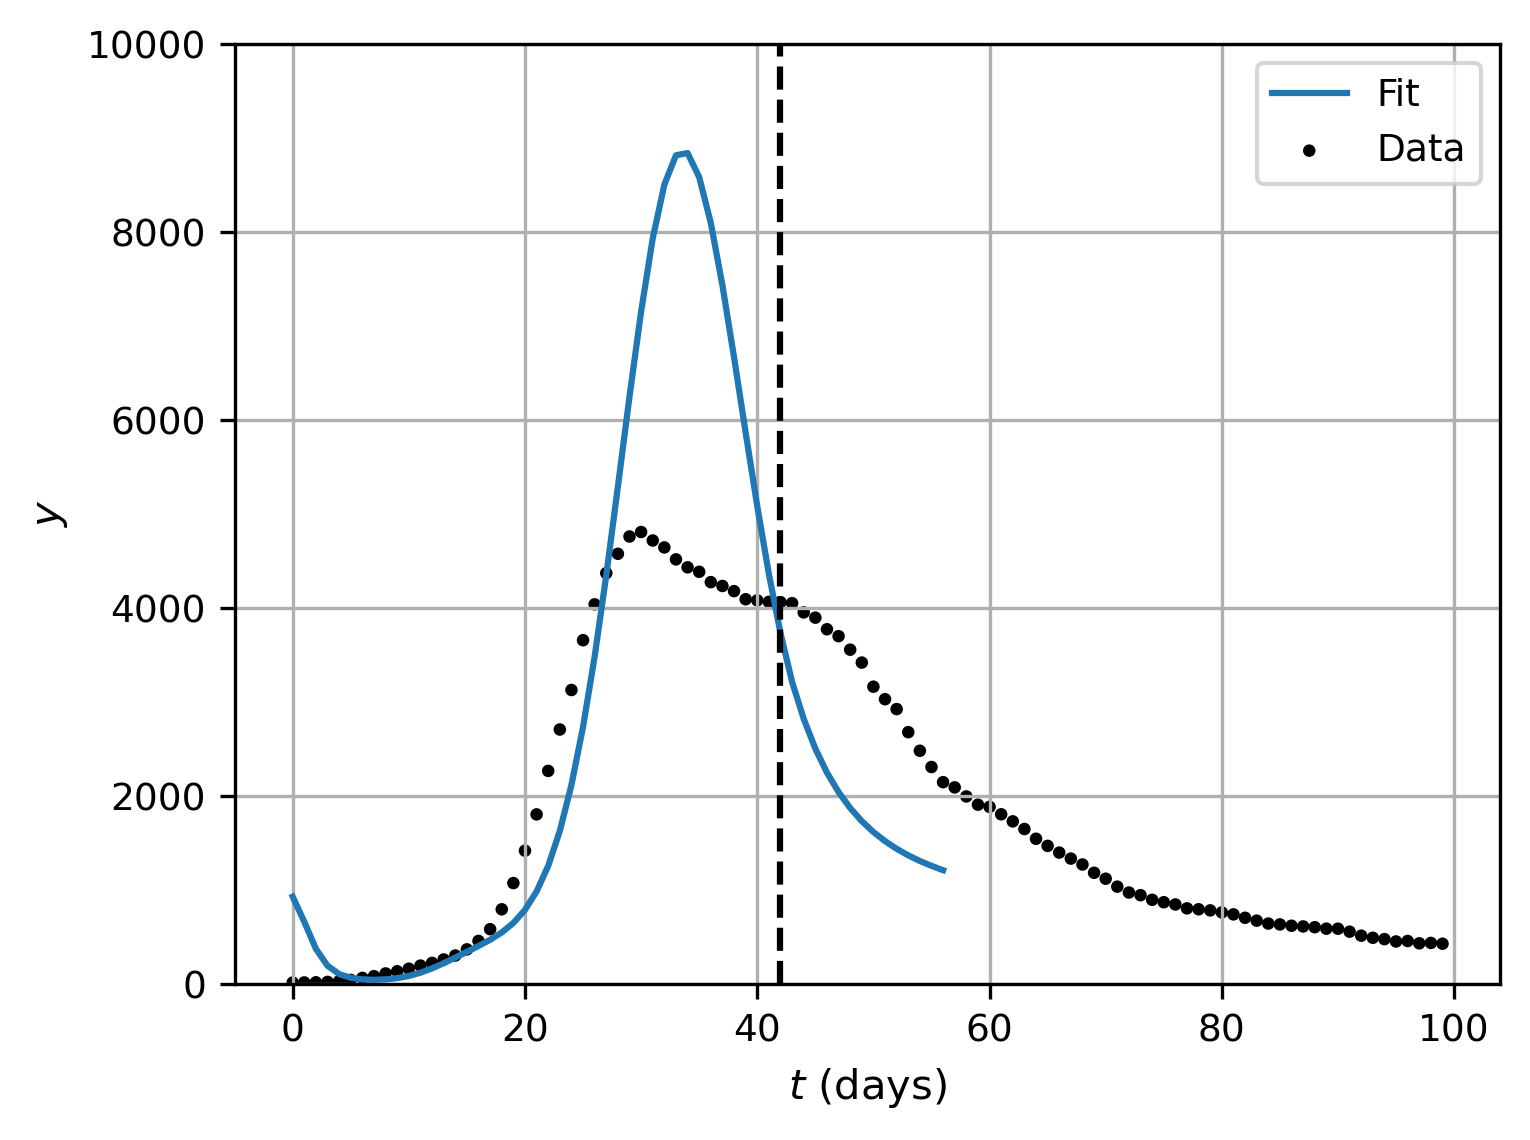

In [26]:
model = eqx.tree_deserialise_leaves("serialised_models/rnn_14_day_ahead.eqx", like=RNN.RNNForecaster(input_size=2, hidden_size=64, output_size=2, key=jr.key(0)))

plot_predictions(model, averaged_ys, control_until=43, file_name=f"plots/autoregressive_cde_predictions_averaged_ys_control_{control_until}")

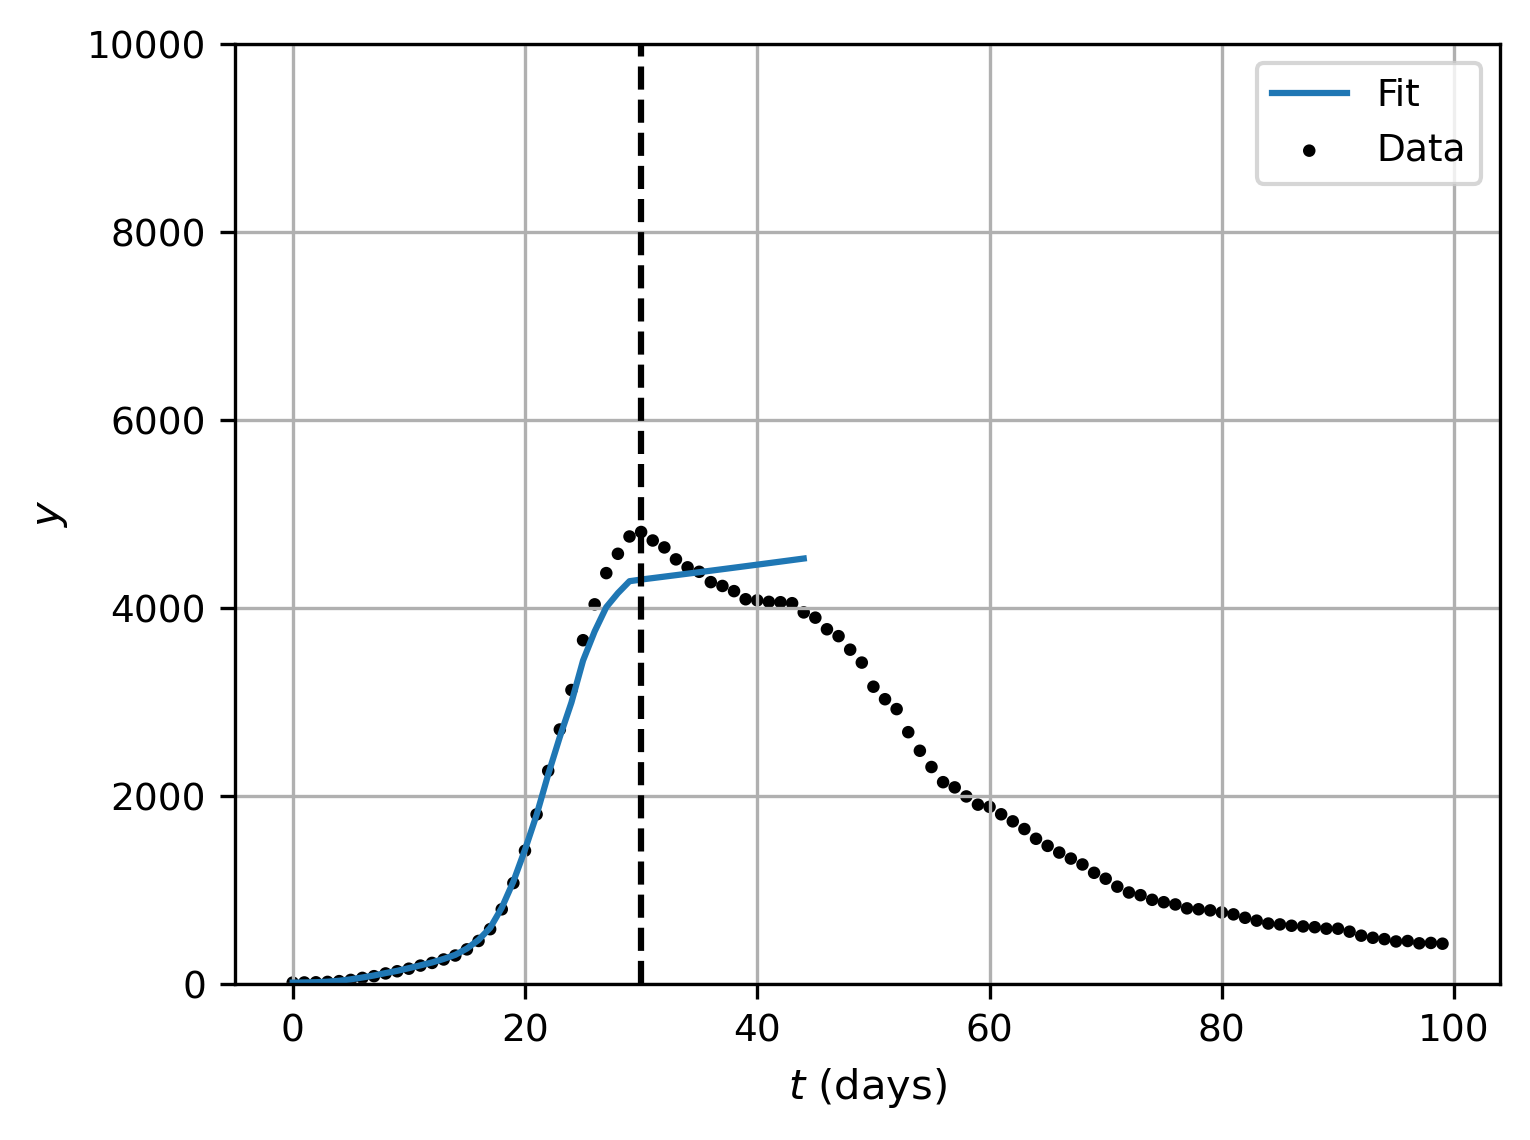

In [23]:
model = eqx.tree_deserialise_leaves("serialised_models/single_solve_cde_14_day_ahead.eqx", like=SingleSolveCDE.SingleSolveCDE(data_size=3, hidden_size=3, width_size=64, depth=3, key=jr.key(0)))

plot_predictions(model, averaged_ys, control_until=31, file_name=f"plots/autoregressive_cde_predictions_averaged_ys_control_{control_until}")